In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('train.csv')

In [3]:
# tentang dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'bookingID'],
      dtype='object')

In [4]:
df.head(3)

hotel  is_canceled  lead_time  \
0                   Crystal Cove, Barbados Barbados            0          8   
1               Greensboro Courtyard Greensboro, NC            1        524   
2  The Westin Peachtree Plaza, Atlanta Atlanta, GA             1        175   

   arrival_date_year arrival_date_month  arrival_date_week_number  \
0               2019            January                         2   
1               2018           December                        51   
2               2019                May                        20   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                         10                        0                     4   
1                         15                        0                     2   
2                         19                        1                     2   

   adults  ...  agent  company days_in_waiting_list customer_type    adr  \
0       2  ...  314.0      NaN                    0     Transient   38.4   
1       2  ...    1.0      NaN                    0     Transient   62.8   
2       2  ...   12.0      NaN                    0     Transient  110.0   

  required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                           0                          0           Check-Out   
1                           0                          0            Canceled   
2                           0                          0            Canceled   

   reservation_status_date bookingID  
0               2019-01-14         1  
1               2017-10-21         2  
2               2018-11-25         3  

[3 rows x 33 columns]

Disini target variabelnya adalah **reservation_status** apakah orang2 jadi booking (checkout), cancel, atau no show. Jenis machine learningnya adalah klasifikasi

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

Sudah cukup clean sih, tapi ayo coba lihat satu per satu

# **Perform Data Standard Cleaning**
## 1. Missing Values

In [6]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


Yang terdapat missing value-nya adalah:
1. children
2. country
3. agent
4. company

In [7]:
# persen untuk setiap baris yang datanya ilang
persen = df.isnull().sum()/df.shape[0] * 100

# create a DataFrame to show case the result
persen = pd.DataFrame({"columns": persen.keys(), "%": persen})
persen.reset_index(drop=True, inplace=True)
persen

columns          %
0                            hotel   0.000000
1                      is_canceled   0.000000
2                        lead_time   0.000000
3                arrival_date_year   0.000000
4               arrival_date_month   0.000000
5         arrival_date_week_number   0.000000
6        arrival_date_day_of_month   0.000000
7          stays_in_weekend_nights   0.000000
8             stays_in_week_nights   0.000000
9                           adults   0.000000
10                        children   0.003602
11                          babies   0.000000
12                            meal   0.000000
13                         country   0.415401
14                  market_segment   0.000000
15            distribution_channel   0.000000
16               is_repeated_guest   0.000000
17          previous_cancellations   0.000000
18  previous_bookings_not_canceled   0.000000
19              reserved_room_type   0.000000
20              assigned_room_type   0.000000
21                 booking_changes   0.000000
22                    deposit_type   0.000000
23                           agent  13.691427
24                         company  94.316449
25            days_in_waiting_list   0.000000
26                   customer_type   0.000000
27                             adr   0.000000
28     required_car_parking_spaces   0.000000
29       total_of_special_requests   0.000000
30              reservation_status   0.000000
31         reservation_status_date   0.000000
32                       bookingID   0.000000

> 50% rule, maka akan drop kolom company

In [8]:
df.drop('company', axis=1, inplace=True)

Kolom sisanya kehilangan data yang sangat sedikit
> country

> children

Nanti di-drop saja baris yang 0

Untuk kolom
> agent

Akan dipertimbangkan nanti

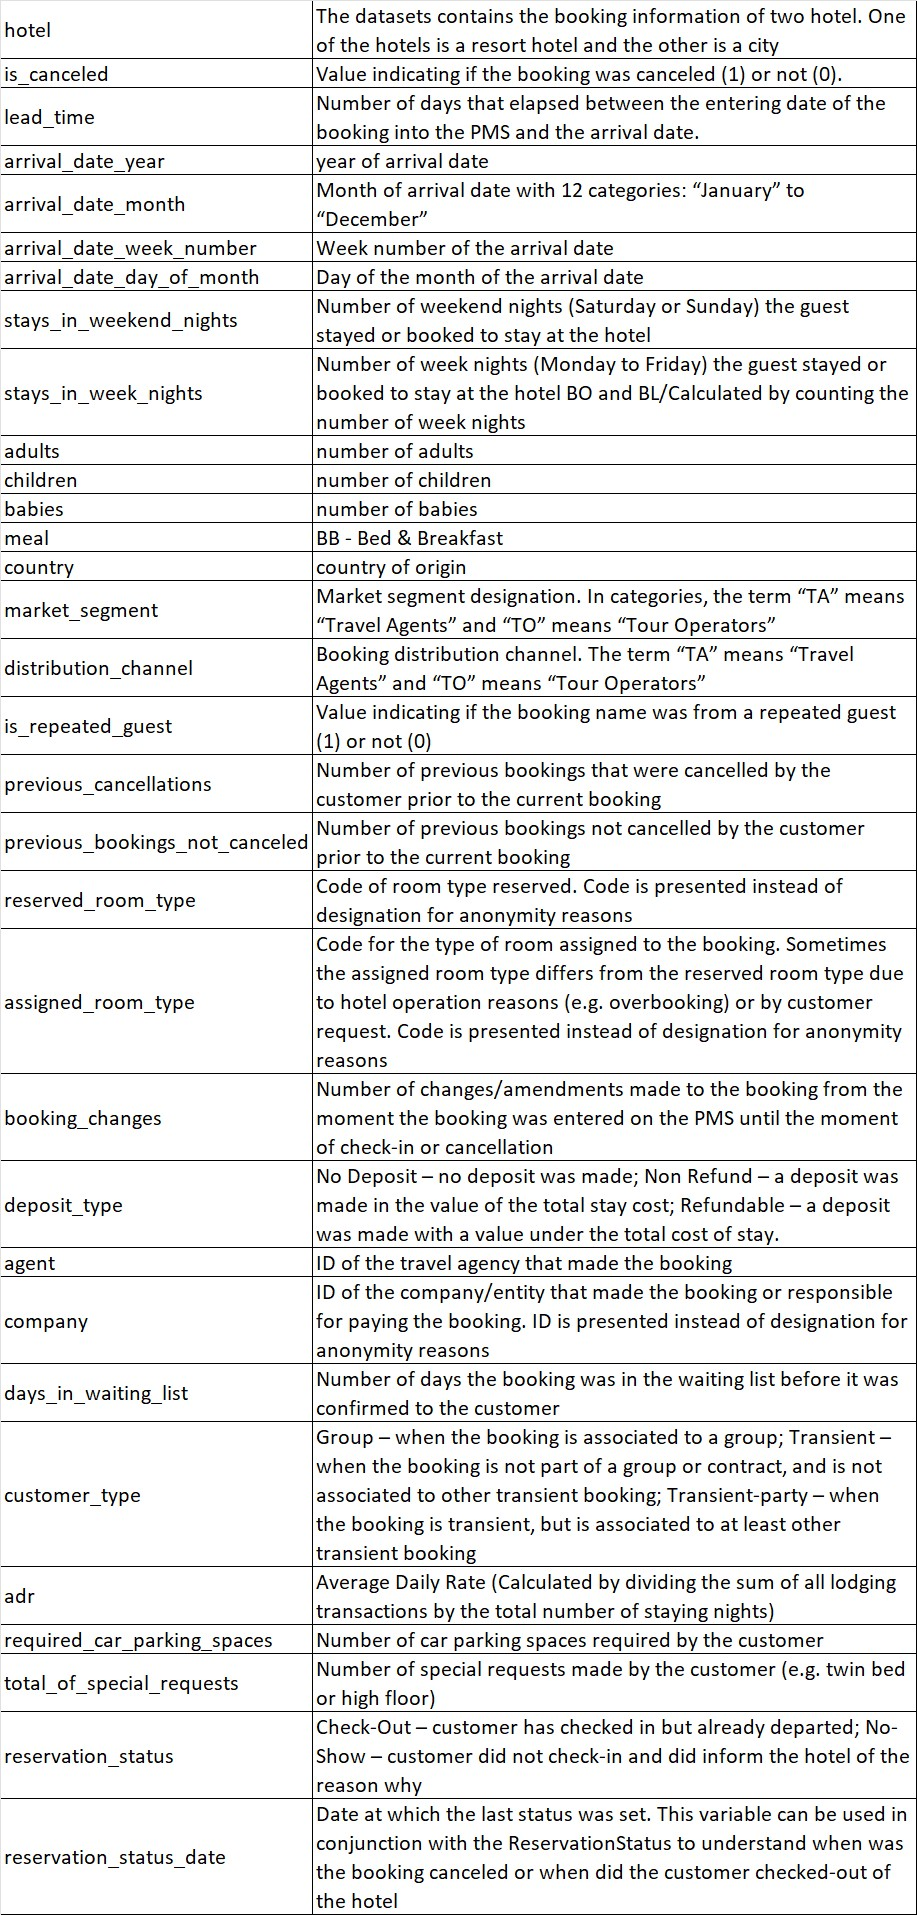

In [9]:
# biar lebih enak diliat
df.describe().style.background_gradient(cmap='Greens')

Berdasarkan deskripsi tentang tabel, tidak ada yang aneh. Tetapi akan dilakukan pengecekan untuk setiap kolom.

## **Tinjau satu per satu kolom**

**hotel**

In [10]:
uniq = df["hotel"].unique().shape[0]/df["hotel"].shape[0] * 100
lost = df["hotel"].isnull().sum()/df["hotel"].shape[0] * 100

print(uniq, lost)

# Kolom yang unik sangat dikit
# Kemungkinan nama hotelnya itu2 saja
# TIdak ada data null


0.07683718919957258 0.0


In [11]:
df["hotel"].value_counts()

Renaissance New York Times Square Hotel New York, NY                           1373
Sacramento Airport Natomas Courtyard Sacramento, CA                            1372
Las Vegas Marriott Las Vegas, NV                                               1371
Crystal Cove, Barbados Barbados                                                1360
Protea Hotel by Marriott Midrand Midrand, South Africa                         1352
                                                                               ... 
W New York – Union Square New York, NY                                         1250
The House, Barbados Barbados                                                   1249
Sheraton Grand Rio Hotel & Resort Rio de Janeiro, Brazil                       1249
African Pride Melrose Arch, Autograph Collection Johannesburg, South Africa    1246
Residence Inn Rio de Janeiro Barra da Tijuca Barra da Tijuca, Brazil           1246
Name: hotel, Length: 64, dtype: int64

**is_canceled**

In [12]:
uniq = df["is_canceled"].unique().shape[0]/df["is_canceled"].shape[0] * 100
lost = df["is_canceled"].isnull().sum()/df["is_canceled"].shape[0] * 100

print(uniq, lost)

# 1 = Canceled
# 0 = Not Canceled


0.002401162162486643 0.0


In [13]:
df["is_canceled"].value_counts()

0    52516
1    30777
Name: is_canceled, dtype: int64

**lead_time**

In [14]:
uniq = df["lead_time"].unique().shape[0]/df["lead_time"].shape[0] * 100
lost = df["lead_time"].isnull().sum()/df["lead_time"].shape[0] * 100

print(uniq, lost)

# Hari di antara booking s/d arrival date

0.5726771757530644 0.0


In [15]:
df["lead_time"].value_counts()

# ada yang booking lebih dari setahun sebelum??
# Kemungkiann outlier

0      4421
1      2415
2      1423
3      1295
4      1188
       ... 
532       1
371       1
463       1
389       1
424       1
Name: lead_time, Length: 477, dtype: int64

**arrival_date_year**

In [16]:
uniq = df["arrival_date_year"].unique().shape[0]/df["arrival_date_year"].shape[0] * 100
lost = df["arrival_date_year"].isnull().sum()/df["arrival_date_year"].shape[0] * 100

print(uniq, lost)

0.003601743243729965 0.0


In [17]:
df["arrival_date_year"].value_counts()

# seems okay

2018    39652
2019    28351
2017    15290
Name: arrival_date_year, dtype: int64

**arrival_date_month**

In [18]:
uniq = df["arrival_date_month"].unique().shape[0]/df["arrival_date_month"].shape[0] * 100
lost = df["arrival_date_month"].isnull().sum()/df["arrival_date_month"].shape[0] * 100

print(uniq, lost)

0.01440697297491986 0.0


In [19]:
df["arrival_date_month"].value_counts()

# Bulan arrival 1 s/d 12

August       9643
July         8731
May          8222
April        7787
October      7741
June         7666
September    7398
March        6810
February     5560
November     4779
December     4742
January      4214
Name: arrival_date_month, dtype: int64

**stays_in_weekend_nights**

In [20]:
uniq = df["stays_in_weekend_nights"].unique().shape[0]/df["stays_in_weekend_nights"].shape[0] * 100
lost = df["stays_in_weekend_nights"].isnull().sum()/df["stays_in_weekend_nights"].shape[0] * 100

print(uniq, lost)

# weekend nights the guest stayed/booked

0.020409878381136472 0.0


In [21]:
df["stays_in_weekend_nights"].value_counts()

# Seems okay, ada yang menginap 18 minggu = 4 bulan?

0     36254
2     23328
1     21276
4      1310
3       874
6       112
5        55
8        41
7        15
9        10
10        6
12        4
14        2
16        2
13        2
19        1
18        1
Name: stays_in_weekend_nights, dtype: int64

**stays_in_week_nights**

In [22]:
uniq = df["stays_in_week_nights"].unique().shape[0]/df["stays_in_week_nights"].shape[0] * 100
lost = df["stays_in_week_nights"].isnull().sum()/df["stays_in_week_nights"].shape[0] * 100

print(uniq, lost)

# Senin s/d Jumat dihitung saat guestnya di hotel

0.040819756762272945 0.0


In [23]:
df["stays_in_week_nights"].value_counts()

# Seems okay, ada yang menginap 18 minggu = 4 bulan?

2     23404
1     21138
3     15517
5      7774
4      6695
0      5378
6      1032
10      722
7       720
8       447
9       170
15       62
11       38
19       31
20       30
12       30
14       29
13       21
16       14
21        9
22        6
25        5
17        3
18        3
24        3
30        3
40        2
26        1
50        1
42        1
35        1
33        1
32        1
34        1
Name: stays_in_week_nights, dtype: int64

**adults**

In [24]:
uniq = df["adults"].unique().shape[0]/df["adults"].shape[0] * 100
lost = df["adults"].isnull().sum()/df["adults"].shape[0] * 100

print(uniq, lost)

0.016808135137406505 0.0


In [25]:
df["adults"].value_counts()

# Seems okay

2     62373
1     16263
3      4316
0       287
4        41
26        5
50        1
10        1
27        1
40        1
55        1
5         1
6         1
20        1
Name: adults, dtype: int64

**children**

In [26]:
uniq = df["children"].unique().shape[0]/df["children"].shape[0] * 100
lost = df["children"].isnull().sum()/df["children"].shape[0] * 100

print(uniq, lost)

# Yang hilang sangat sedikit, di-drop saja yang null

0.00720348648745993 0.003601743243729965


In [27]:
df.dropna(subset=['children'], inplace=True)

In [28]:
df["children"].value_counts()

# Seems okay

0.0     77329
1.0      3351
2.0      2558
3.0        51
10.0        1
Name: children, dtype: int64

**babies**

In [29]:
uniq = df["babies"].unique().shape[0]/df["babies"].shape[0] * 100
lost = df["babies"].isnull().sum()/df["babies"].shape[0] * 100

print(uniq, lost)

0.006003121623244087 0.0


In [30]:
df["babies"].value_counts()

# Seems okay

0     82647
1       632
2         9
10        1
9         1
Name: babies, dtype: int64

**meal**

In [31]:
uniq = df["meal"].unique().shape[0]/df["meal"].shape[0] * 100
lost = df["meal"].isnull().sum()/df["meal"].shape[0] * 100

print(uniq, lost)

0.006003121623244087 0.0


In [32]:
df["meal"].value_counts()

# Seems okay

BB           64421
HB           10098
SC            7401
Undefined      828
FB             542
Name: meal, dtype: int64

**country**

In [33]:
uniq = df["country"].unique().shape[0]/df["country"].shape[0] * 100
lost = df["country"].isnull().sum()/df["country"].shape[0] * 100

print(uniq, lost)

# Drop yang null

0.1993036378917037 0.4154160163284908


In [34]:
df.dropna(subset=['country'], inplace=True)

In [35]:
df["country"].value_counts()

# Seems okay

PRT    33949
GBR     8381
FRA     7243
ESP     5897
DEU     5107
       ...  
MRT        1
BRB        1
NPL        1
DJI        1
NAM        1
Name: country, Length: 165, dtype: int64

**market_segment**

In [36]:
uniq = df["market_segment"].unique().shape[0]/df["market_segment"].shape[0] * 100
lost = df["market_segment"].isnull().sum()/df["market_segment"].shape[0] * 100

print(uniq, lost)

0.008439429012345678 0.0


In [37]:
df["market_segment"].value_counts()

# Seems okay

Online TA        39383
Offline TA/TO    16880
Groups           13787
Direct            8627
Corporate         3588
Complementary      517
Aviation           162
Name: market_segment, dtype: int64

**distribution_channel**

In [38]:
uniq = df["distribution_channel"].unique().shape[0]/df["distribution_channel"].shape[0] * 100
lost = df["distribution_channel"].isnull().sum()/df["distribution_channel"].shape[0] * 100

print(uniq, lost)

0.0060281635802469135 0.0


In [39]:
df["distribution_channel"].value_counts()

# Seems okay

TA/TO        68259
Direct       10037
Corporate     4514
GDS            133
Undefined        1
Name: distribution_channel, dtype: int64

**is_repeated_guest**

In [40]:
uniq = df["is_repeated_guest"].unique().shape[0]/df["is_repeated_guest"].shape[0] * 100
lost = df["is_repeated_guest"].isnull().sum()/df["is_repeated_guest"].shape[0] * 100

print(uniq, lost)

0.0024112654320987653 0.0


In [41]:
df["is_repeated_guest"].value_counts()

# 1 = Yes
# 0 = No

0    80427
1     2517
Name: is_repeated_guest, dtype: int64

**previous_cancellations**

In [42]:
uniq = df["previous_cancellations"].unique().shape[0]/df["previous_cancellations"].shape[0] * 100
lost = df["previous_cancellations"].isnull().sum()/df["previous_cancellations"].shape[0] * 100

print(uniq, lost)

0.016878858024691357 0.0


In [43]:
df["previous_cancellations"].value_counts()

# sebelumnya ngecancel berapa kali
# seems okay

0     78571
1      4055
2        85
3        49
24       35
11       27
4        24
26       22
25       18
5        16
6        16
19       12
14        7
13        7
Name: previous_cancellations, dtype: int64

**previous_bookings_not_canceled**

In [44]:
uniq = df["previous_bookings_not_canceled"].unique().shape[0]/df["previous_bookings_not_canceled"].shape[0] * 100
lost = df["previous_bookings_not_canceled"].isnull().sum()/df["previous_bookings_not_canceled"].shape[0] * 100

print(uniq, lost)

0.07836612654320987 0.0


In [45]:
df["previous_bookings_not_canceled"].value_counts()

# seems okay

0     80565
1       994
2       396
3       210
4       139
      ...  
53        1
69        1
40        1
64        1
43        1
Name: previous_bookings_not_canceled, Length: 65, dtype: int64

**reserved_room_type**

In [46]:
uniq = df["reserved_room_type"].unique().shape[0]/df["reserved_room_type"].shape[0] * 100
lost = df["reserved_room_type"].isnull().sum()/df["reserved_room_type"].shape[0] * 100

print(uniq, lost)

0.012056327160493827 0.0


In [47]:
df["reserved_room_type"].value_counts()

# seems okay

A    59791
D    13300
E     4536
F     2041
G     1432
B      774
C      657
H      408
L        3
P        2
Name: reserved_room_type, dtype: int64

**assigned_room_type**

In [48]:
uniq = df["assigned_room_type"].unique().shape[0]/df["assigned_room_type"].shape[0] * 100
lost = df["assigned_room_type"].isnull().sum()/df["assigned_room_type"].shape[0] * 100

print(uniq, lost)

0.01326195987654321 0.0


In [49]:
df["assigned_room_type"].value_counts()

# seems okay

A    51570
D    17480
E     5368
F     2627
G     1763
C     1664
B     1527
H      479
I      257
K      207
P        2
Name: assigned_room_type, dtype: int64

**booking_changes**

In [50]:
uniq = df["booking_changes"].unique().shape[0]/df["booking_changes"].shape[0] * 100
lost = df["booking_changes"].isnull().sum()/df["booking_changes"].shape[0] * 100

print(uniq, lost)

0.024112654320987654 0.0


In [51]:
df["booking_changes"].value_counts()

# seems okay

0     70295
1      8881
2      2653
3       657
4       273
5        84
6        37
7        22
8        15
9         6
14        4
10        4
13        3
16        2
11        2
15        2
20        1
12        1
21        1
17        1
Name: booking_changes, dtype: int64

**deposit_type**

In [52]:
uniq = df["deposit_type"].unique().shape[0]/df["deposit_type"].shape[0] * 100
lost = df["deposit_type"].isnull().sum()/df["deposit_type"].shape[0] * 100

print(uniq, lost)

0.0036168981481481477 0.0


In [53]:
df["deposit_type"].value_counts()

# seems okay

No Deposit    72640
Non Refund    10194
Refundable      110
Name: deposit_type, dtype: int64

**agent**

In [54]:
uniq = df["agent"].unique().shape[0]/df["agent"].shape[0] * 100
lost = df["agent"].isnull().sum()/df["agent"].shape[0] * 100

print(uniq, lost)

# data yang hilang 13%
# cukup banyak

0.38580246913580246 13.470534336419753


In [55]:
df["agent"].value_counts()

9.0      22303
240.0     9624
1.0       4943
14.0      2528
7.0       2511
         ...  
388.0        1
449.0        1
352.0        1
299.0        1
144.0        1
Name: agent, Length: 319, dtype: int64

In [56]:
median_agent = df.groupby(['country','is_repeated_guest',
                           'is_canceled'])['agent'].transform('median')
df['agent'].fillna(median_agent, inplace=True)

# Mengisi nilai agent yang kosong dengan nilai median
# Dari country, repeat_guest, dan is_canceled

In [57]:
uniq = df["agent"].unique().shape[0]/df["agent"].shape[0] * 100
lost = df["agent"].isnull().sum()/df["agent"].shape[0] * 100

print(uniq, lost)

# sisa 0.03 yang kosong
# didrop saja

0.39424189814814814 0.0349633487654321


In [58]:
df.dropna(subset=['agent'], inplace=True)

**days_in_waiting_list**

In [59]:
uniq = df["days_in_waiting_list"].unique().shape[0]/df["days_in_waiting_list"].shape[0] * 100
lost = df["days_in_waiting_list"].isnull().sum()/df["days_in_waiting_list"].shape[0] * 100

print(uniq, lost)

0.14713863595248144 0.0


In [60]:
df["days_in_waiting_list"].value_counts()

# Seems okay

0      80322
39       157
58       107
44        98
31        91
       ...  
117        1
109        1
185        1
167        1
37         1
Name: days_in_waiting_list, Length: 122, dtype: int64

**customer_type**

In [61]:
uniq = df["customer_type"].unique().shape[0]/df["customer_type"].shape[0] * 100
lost = df["customer_type"].isnull().sum()/df["customer_type"].shape[0] * 100

print(uniq, lost)

0.004824217572212507 0.0


In [62]:
df["customer_type"].value_counts()

# Seems okay

Transient          62201
Transient-Party    17517
Contract            2793
Group                404
Name: customer_type, dtype: int64

**adr**

In [63]:
uniq = df["adr"].unique().shape[0]/df["adr"].shape[0] * 100
lost = df["adr"].isnull().sum()/df["adr"].shape[0] * 100

print(uniq, lost)

8.986311282638846 0.0


In [64]:
df["adr"].value_counts()

# Seems okay

62.00     2672
75.00     1911
90.00     1741
65.00     1698
0.00      1372
          ... 
226.73       1
112.28       1
148.04       1
105.95       1
122.25       1
Name: adr, Length: 7451, dtype: int64

**required_car_parking_spaces**

In [65]:
uniq = df["required_car_parking_spaces"].unique().shape[0]/df["required_car_parking_spaces"].shape[0] * 100
lost = df["required_car_parking_spaces"].isnull().sum()/df["required_car_parking_spaces"].shape[0] * 100

print(uniq, lost)

0.004824217572212507 0.0


In [66]:
df["required_car_parking_spaces"].value_counts()

# Seems okay

0    77886
1     5006
2       20
3        3
Name: required_car_parking_spaces, dtype: int64

**total_of_special_requests**

In [67]:
uniq = df["total_of_special_requests"].unique().shape[0]/df["total_of_special_requests"].shape[0] * 100
lost = df["total_of_special_requests"].isnull().sum()/df["total_of_special_requests"].shape[0] * 100

print(uniq, lost)

0.00723632635831876 0.0


In [68]:
df["total_of_special_requests"].value_counts()

# Seems okay

0    48787
1    23119
2     9004
3     1734
4      241
5       30
Name: total_of_special_requests, dtype: int64

**reservation_status**

In [69]:
uniq = df["reservation_status"].unique().shape[0]/df["reservation_status"].shape[0] * 100
lost = df["reservation_status"].isnull().sum()/df["reservation_status"].shape[0] * 100

print(uniq, lost)

0.00361816317915938 0.0


In [70]:
df["reservation_status"].value_counts()

# Seems okay

Check-Out    52194
Canceled     29871
No-Show        850
Name: reservation_status, dtype: int64

**reservation_status_date**

In [71]:
uniq = df["reservation_status_date"].unique().shape[0]/df["reservation_status_date"].shape[0] * 100
lost = df["reservation_status_date"].isnull().sum()/df["reservation_status_date"].shape[0] * 100

print(uniq, lost)

1.102333715250558 0.0


In [72]:
df["reservation_status_date"].value_counts()

# Seems okay

2017-10-21    1024
2018-11-25     560
2017-07-06     558
2017-01-01     535
2018-01-18     437
              ... 
2017-03-23       1
2017-02-26       1
2017-03-28       1
2017-04-30       1
2017-03-29       1
Name: reservation_status_date, Length: 914, dtype: int64

In [73]:
df.info()

# Sudah tidak ada yang null lagi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82915 entries, 0 to 83292
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           82915 non-null  object 
 1   is_canceled                     82915 non-null  int64  
 2   lead_time                       82915 non-null  int64  
 3   arrival_date_year               82915 non-null  int64  
 4   arrival_date_month              82915 non-null  object 
 5   arrival_date_week_number        82915 non-null  int64  
 6   arrival_date_day_of_month       82915 non-null  int64  
 7   stays_in_weekend_nights         82915 non-null  int64  
 8   stays_in_week_nights            82915 non-null  int64  
 9   adults                          82915 non-null  int64  
 10  children                        82915 non-null  float64
 11  babies                          82915 non-null  int64  
 12  meal                            

## 2. Duplicated Values

In [74]:
# Tidak ada duplicate value

df.duplicated().sum(0)

0

## 2. Outlier Handling

In [75]:
# Kategorical Column

cat_columns = df.select_dtypes(include=['object'])
frequency_table = cat_columns.describe().style.background_gradient(cmap='Reds')
frequency_table

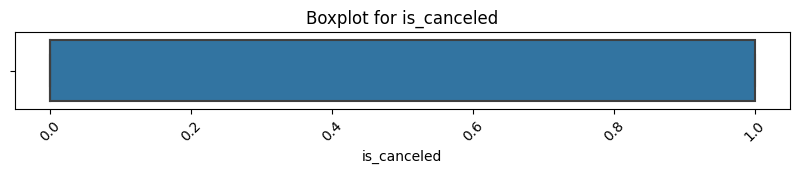

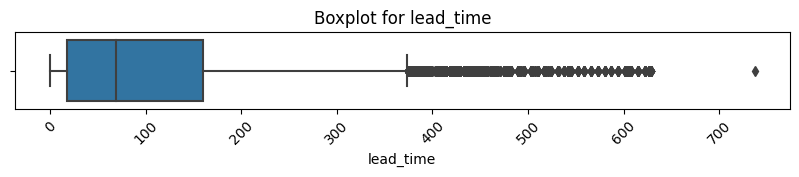

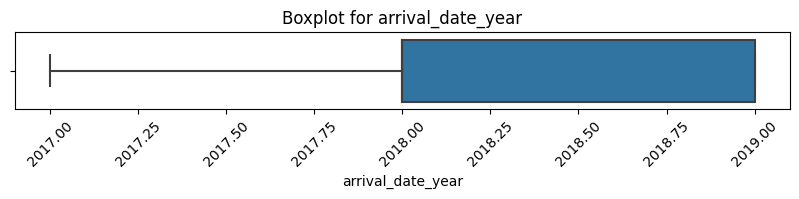

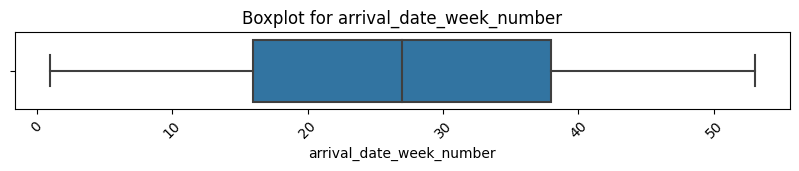

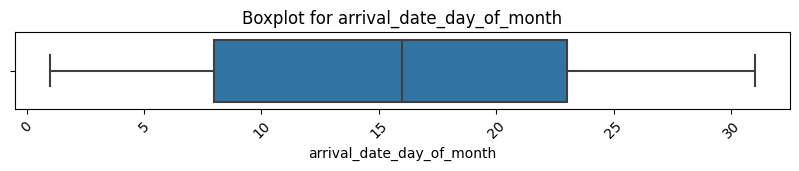

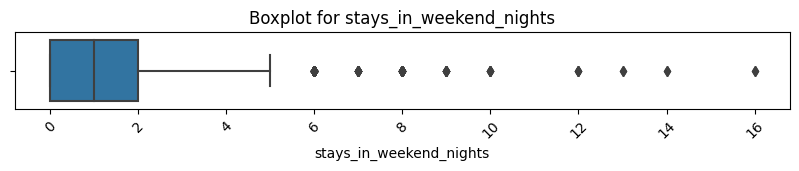

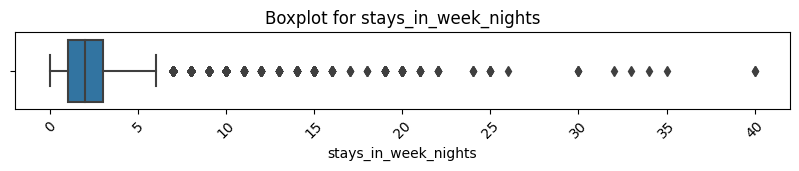

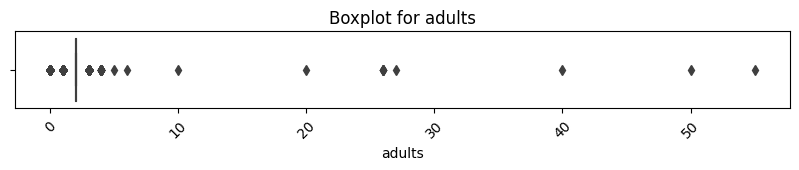

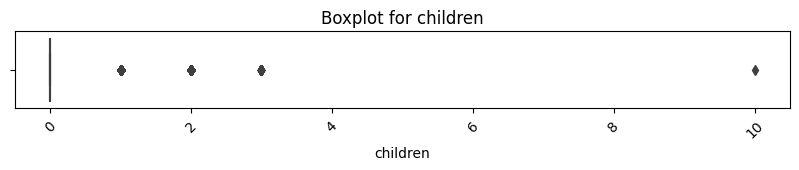

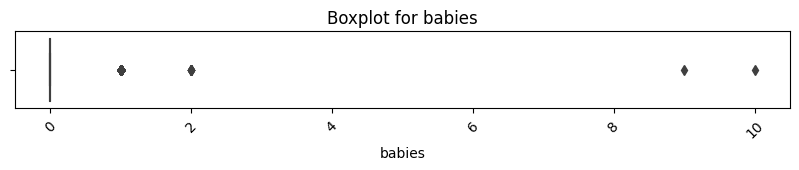

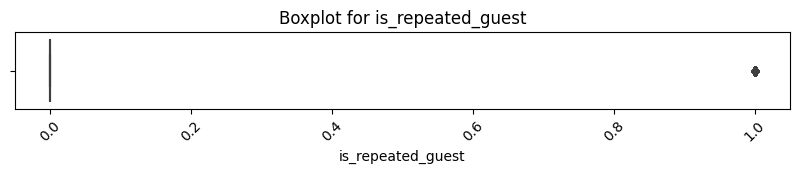

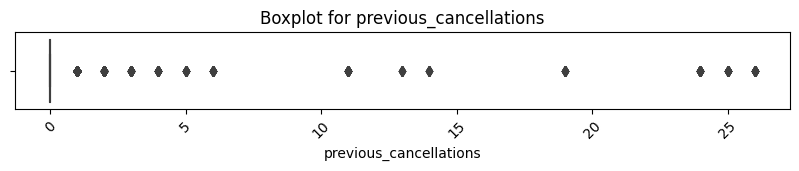

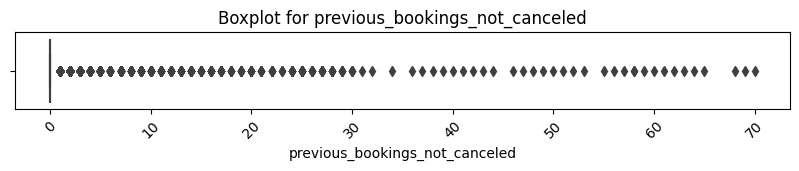

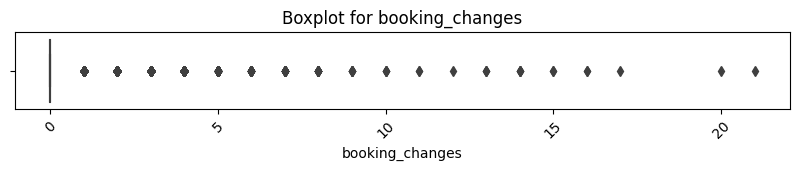

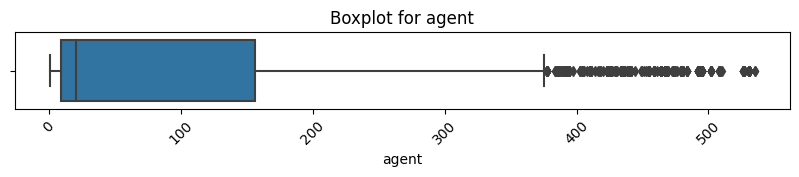

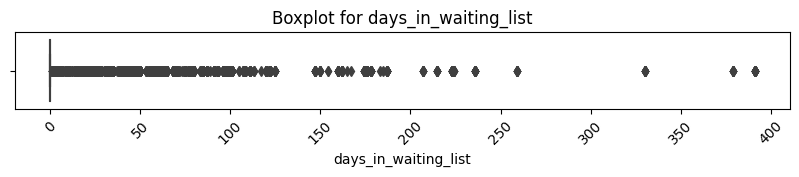

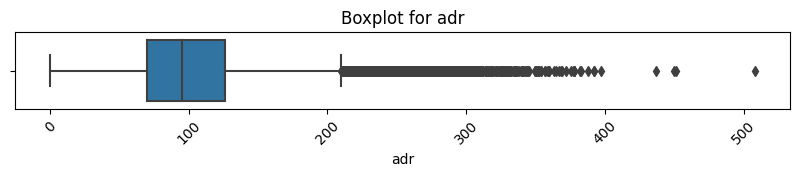

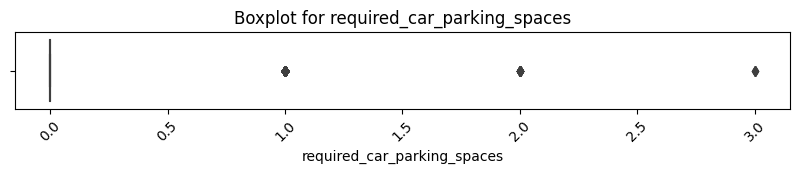

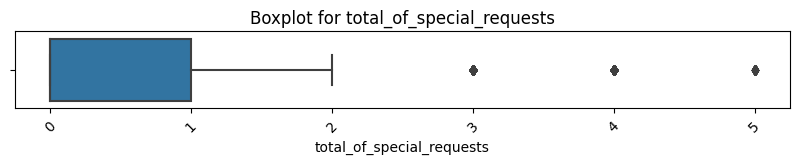

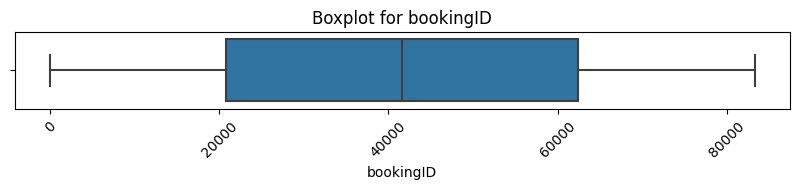

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter kolom yang bukan objek (string)
numeric_columns = df.select_dtypes(exclude=['object'])

# Membuat boxplot untuk setiap kolom numerik secara terpisah
for column in numeric_columns.columns:
    plt.figure(figsize=(10, 1))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.xticks(rotation=45)
    plt.show()


Outlier yang lainnya menurut saya masuk akal, tetapi ada beberapa yang tidak masuk akal.
1. lead_time : Ada yang sampe 700, berarti dia pesen hotelnya 700 hari sebelum arrival_date?
2. days_in_waiting_list : Sampe 400, siapa yang rela waiting list hotel sampai di atas 1 tahun sebelum

In [77]:
numeric_columns.describe().style.background_gradient(cmap='Reds')

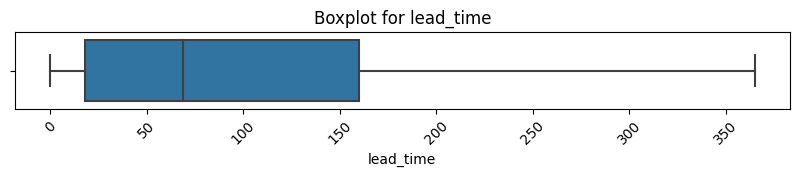

In [78]:
# Keduanya saya batasi sampai maksimal 365 saja
# Aneh kalau ada yang di atas 1 tahun

df.loc[df['lead_time'] > 365, 'lead_time'] = 365

plt.figure(figsize=(10, 1))
sns.boxplot(x=df["lead_time"])
plt.title(f"Boxplot for lead_time")
plt.xticks(rotation=45)
plt.show()  

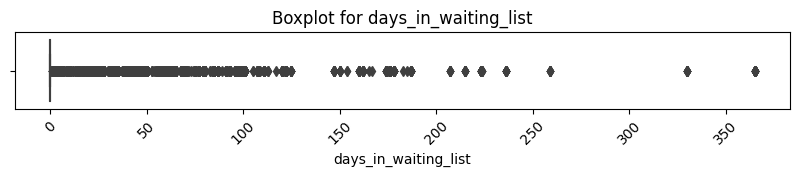

In [79]:
df.loc[df['days_in_waiting_list'] > 365, 'days_in_waiting_list'] = 365

plt.figure(figsize=(10, 1))
sns.boxplot(x=df["days_in_waiting_list"])
plt.title(f"Boxplot for days_in_waiting_list")
plt.xticks(rotation=45)
plt.show()  

# **Data Visualization**

## 1. Define the Function
credit: https://www.kaggle.com/code/sayanroy729/airbnb-open-data-eda-step-by-step

In [80]:
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Tahoma'

In [81]:
# Plot Bar Chart

def plot_bar_chart(df, column_name: str, hue: str = None, top_values: int = None, palette: str = "flare", show_grid: bool = True,
                   figsize: tuple = (16, 9), bar_font_size: int = 14, bar_angle: int = 0, angle: int = 0):
    fig = plt.figure(facecolor=(247/255, 247/255, 247/255), figsize=figsize)
    ax = plt.subplot(1, 1, 1)

    ax.set_facecolor((247/255, 247/255, 247/255))
    counts = None

    if top_values is not None:
        counts = df[column_name].value_counts().iloc[:top_values]
    else:
        counts = df[column_name].value_counts()

    bar_ax = sns.barplot(x=counts, y=counts.keys(), palette=palette, ax=ax, hue=df[hue] if hue is not None else None)

    for i in bar_ax.containers:
        bar_ax.bar_label(i, rotation=bar_angle, fontsize=bar_font_size)

    plt.xticks(rotation=angle, fontsize=10)
    plt.xlabel("count", fontweight="bold", fontsize=18)  # Label sumbu x menjadi "count"
    plt.ylabel(f"{column_name}", fontweight="bold", fontsize=18)  # Label sumbu y menjadi nama kolom
    plt.title(f"Top {top_values} {column_name}" if top_values is not None else f"{column_name}", fontsize=27)
    
    if show_grid:
        plt.grid()

In [82]:
# Pie Chart

def plot_pie_chart(column_name: str, startangle: int=45, loc: str="center", explodes: float=0.09, palette: str = "magma"):
    values = df[column_name].value_counts()
    keys = values.keys()
    total_records = df[column_name].count()

    labels = ["{0} - {1:1.2f} %".format(i, j/total_records * 100) for i, j in zip(keys, values)]
    explodes = [explodes/len(keys) for i in range(len(keys))]

    plt.subplots(figsize=(16, 9))
    
    # Mengatur palet berdasarkan nilai "palette"
    sns.set_palette(palette)
    
    # Menggambar diagram lingkaran dengan palet yang telah diatur
    patches, texts = plt.pie(values, startangle=startangle, explode=explodes)

    center_circle = plt.Circle(xy=(0, 0), radius=0.70, fc="white")
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.legend(patches, labels, loc=loc, fontsize=14)

In [83]:
# Line Chart

def plot_line_chart(column_name, xlabel, ylabel, title, palette="magma"):
    # Count values and sort by index
    value = df[column_name].value_counts().sort_index()
    keys = np.array(value.keys(), dtype=np.int16)

    # Set a custom color palette
    custom_palette = sns.color_palette(palette, len(value))

    # Create a figure and axis with a white background
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_facecolor((1.0, 1.0, 1.0))

    # Plot the line chart with custom styling
    sns.lineplot(x=keys, y=value.values, ax=ax, marker='o', markersize=8, color=custom_palette[0], markerfacecolor='none', markeredgewidth=2, markeredgecolor='red', linewidth=2)

    # Add grid lines
    ax.grid(True, linestyle='--', alpha=0.7, color='gray')

    # Customize axis labels and title
    plt.xlabel(xlabel, fontsize=14, fontweight="bold")
    plt.ylabel(ylabel, fontsize=14, fontweight="bold")
    plt.xticks(ticks=keys, fontsize=12, rotation=15)
    plt.title(title, fontsize=16, fontweight="bold")

In [84]:
def bar_kebalik(data, column_name, top_values=50, palette="magma", show_grid=True):
    """
    Plots a bar chart for the specified categorical column.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        column_name (str): The name of the categorical column to plot.
        top_values (int): The number of top values to display (default is 10).
        palette (str): The color palette to use for the bars (default is "magma").
        show_grid (bool): Whether to show grid lines (default is True).
    """
    # Count the frequency of each category
    category_counts = data[column_name].value_counts().head(top_values)
    
    sns.set(style="whitegrid" if show_grid else "white")
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=category_counts.index, y=category_counts.values, palette=palette)
    
    # Customize the plot
    plt.title(f"Top {top_values} {column_name} Categories", fontsize=16, fontweight="bold")
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    
    # Show the plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
    
    # Add values (counts) above each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_miring(data, x_col, y_col, palette="magma"):
    """
    Plots a horizontal bar chart using Seaborn.

    Parameters:
        data (DataFrame): The DataFrame containing the data.
        x_col (str): The name of the column for the x-axis.
        y_col (str): The name of the column for the y-axis.
        palette (str): The color palette to use for the bars (default is "magma").
    """
    sns.set(font='Tahoma')
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=data, x=x_col, y=y_col, palette=palette)
    
    # Customize the plot
    plt.title(f'Top 10 Most Highest {x_col} {y_col}', fontsize=20, fontweight="bold", ha="center", y=1.08, x=0.4)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    
    # Add count above each bar
    for p in ax.patches:
        width = p.get_width()
        plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10, color='black')
    
    plt.show()

# Example usage:
# bar_miring(good_review, x_col='review_rate_number', y_col='neighbourhood', palette='magma')


In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_word_cloud(text, width=800, height=400, background_color='white', title='Word Cloud'):
    """
    Generates and displays a word cloud from the provided text.

    Parameters:
        text (str): The text from which to generate the word cloud.
        width (int): The width of the word cloud image (default is 800).
        height (int): The height of the word cloud image (default is 400).
        background_color (str): The background color of the word cloud image (default is 'white').
        title (str): The title for the word cloud (default is 'Word Cloud').
    """
    wordcloud = WordCloud(width=width, height=height, background_color=background_color).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Example usage:
# host_names = ' '.join(df['host_name'])
# generate_word_cloud(host_names, title='Word Cloud of Host Names')


## 2. Simple Visualization

In [87]:
cat_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82915 entries, 0 to 83292
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   hotel                    82915 non-null  object
 1   arrival_date_month       82915 non-null  object
 2   meal                     82915 non-null  object
 3   country                  82915 non-null  object
 4   market_segment           82915 non-null  object
 5   distribution_channel     82915 non-null  object
 6   reserved_room_type       82915 non-null  object
 7   assigned_room_type       82915 non-null  object
 8   deposit_type             82915 non-null  object
 9   customer_type            82915 non-null  object
 10  reservation_status       82915 non-null  object
 11  reservation_status_date  82915 non-null  object
dtypes: object(12)
memory usage: 8.2+ MB


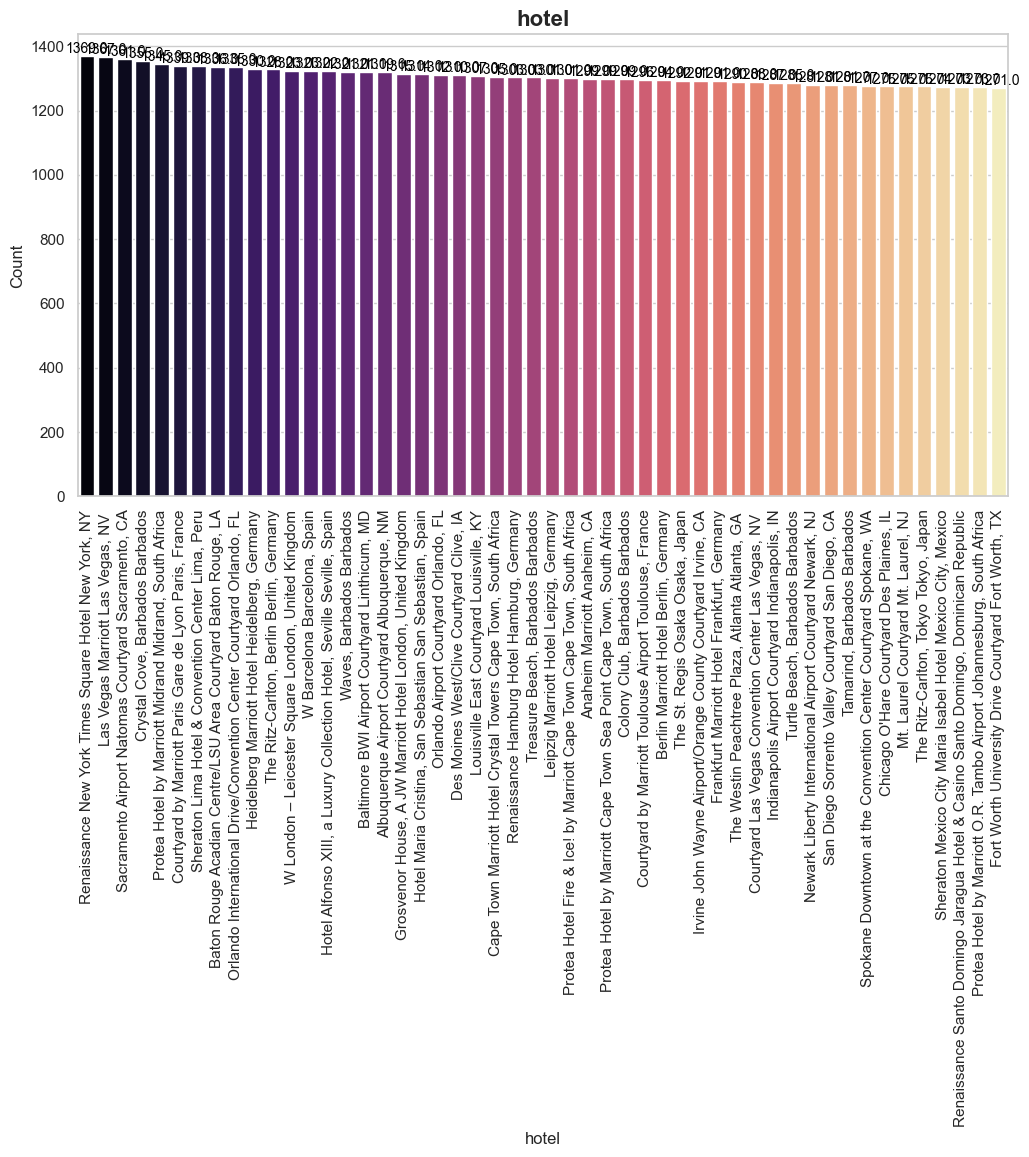

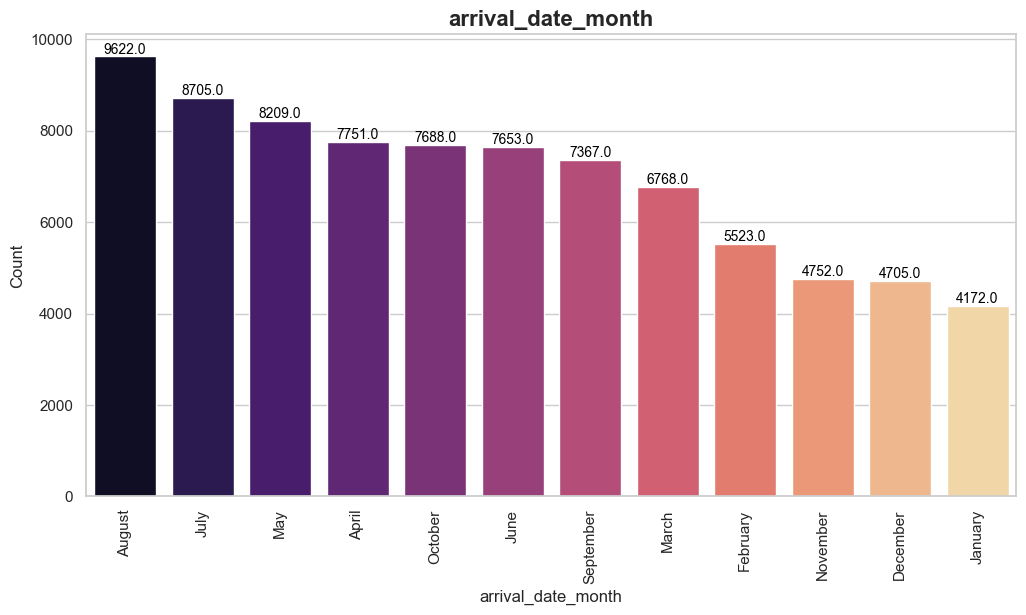

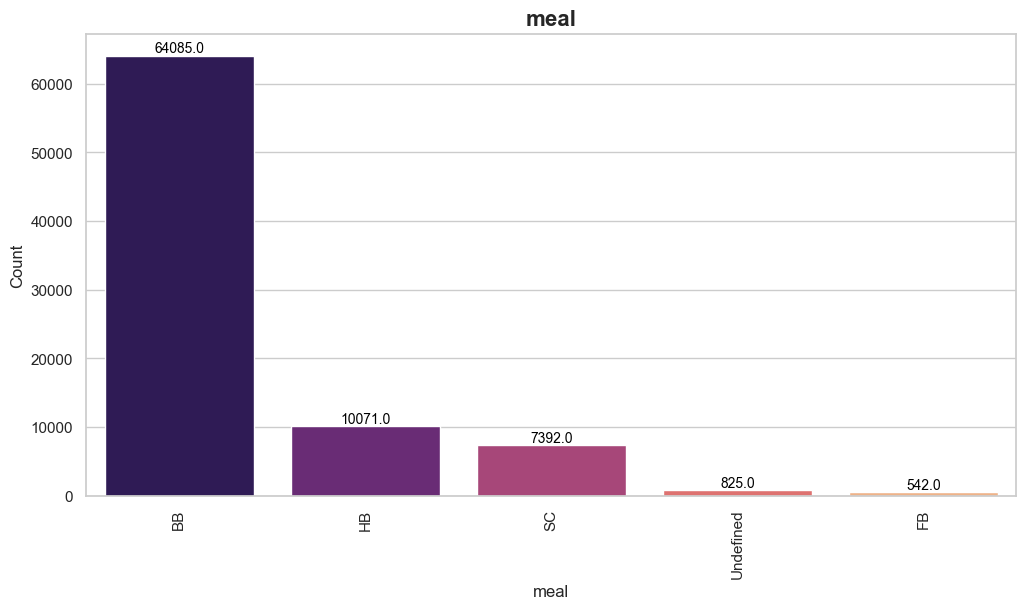

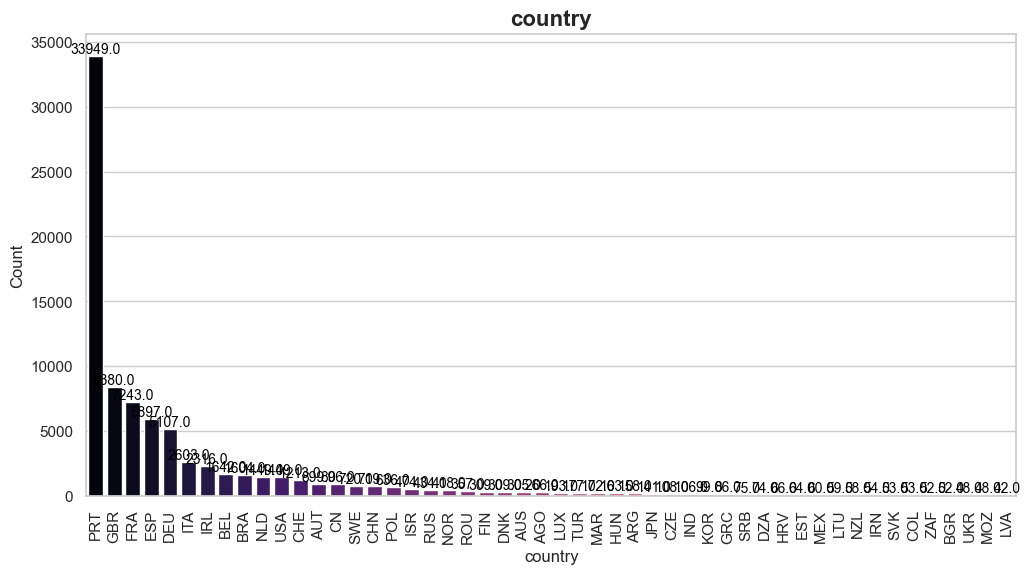

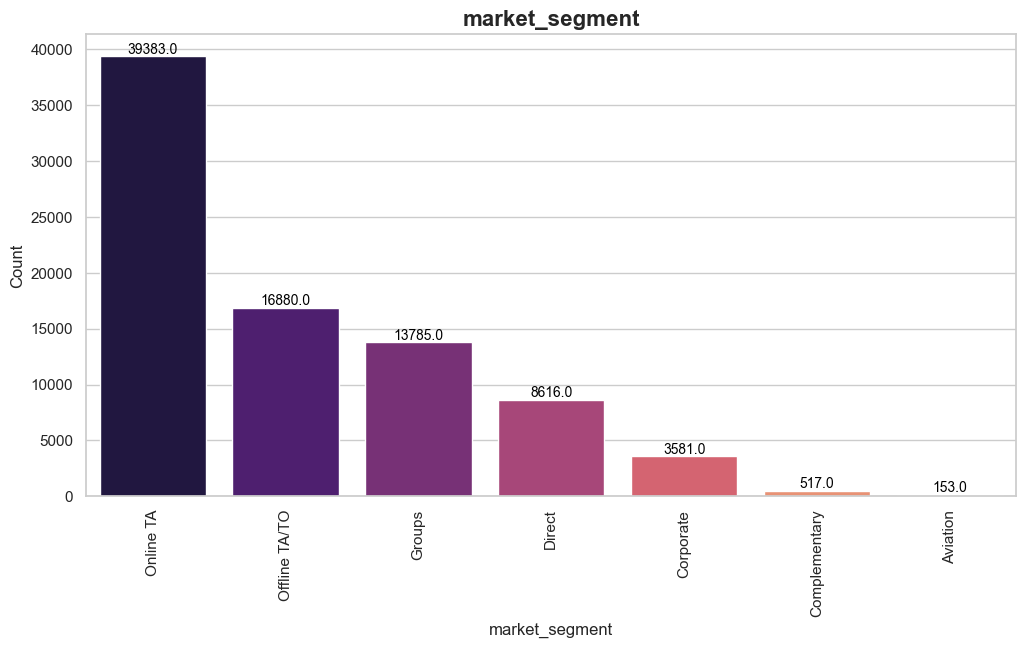

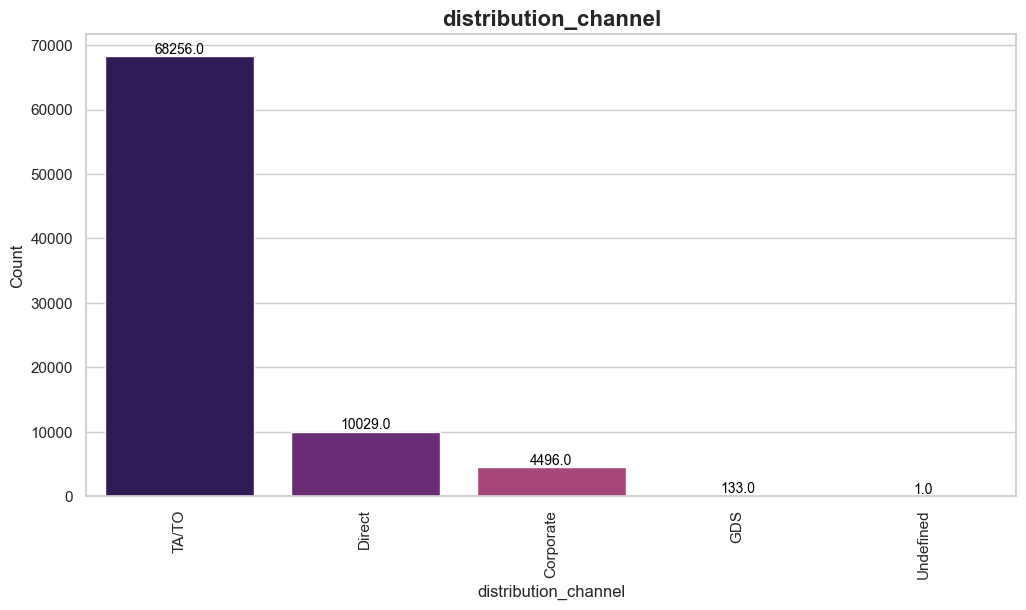

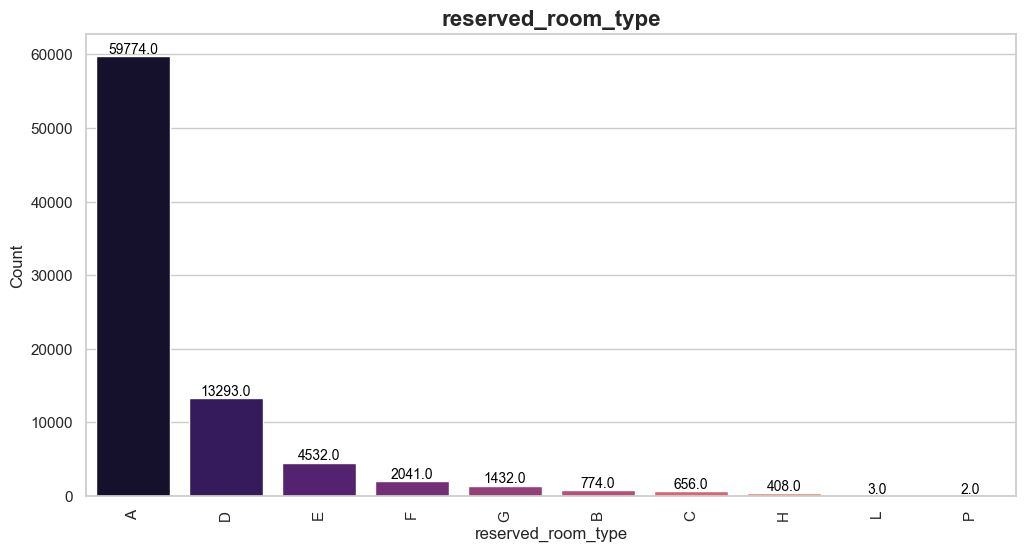

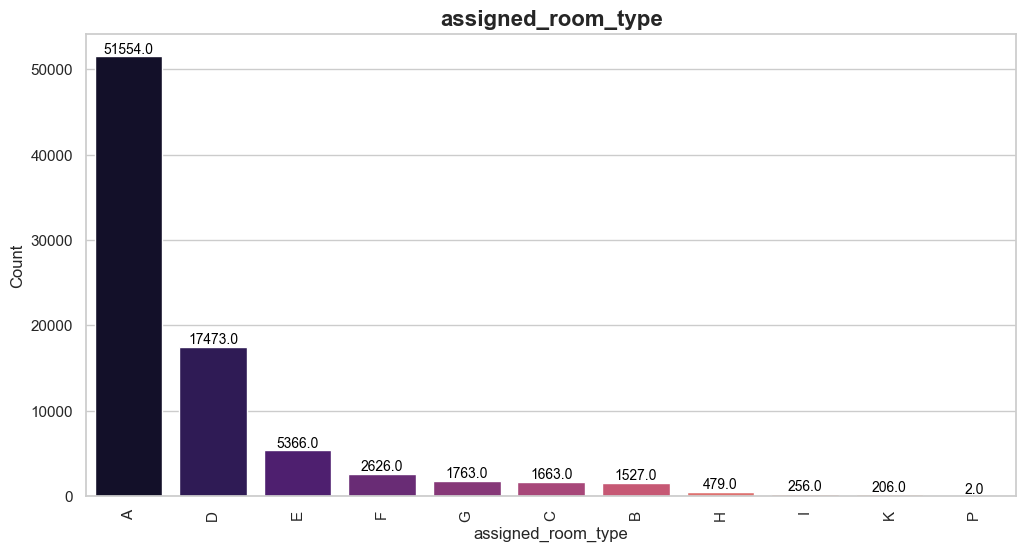

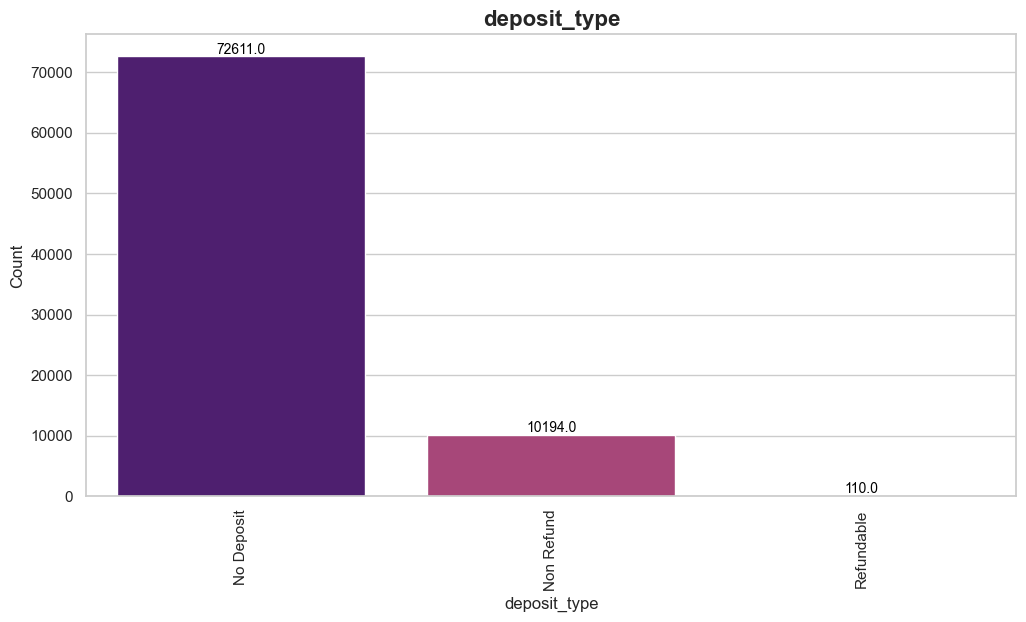

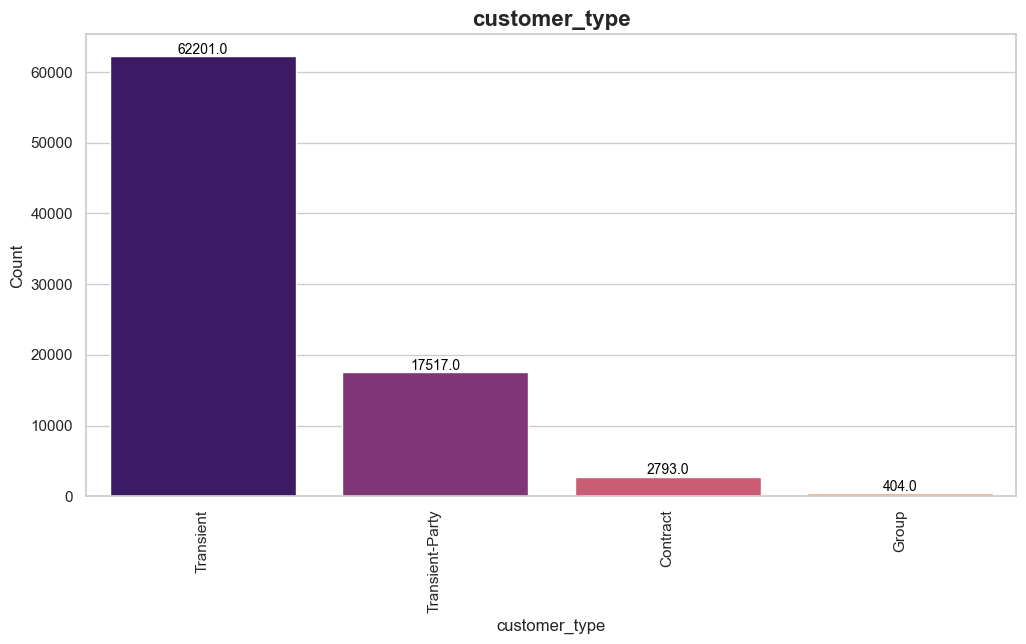

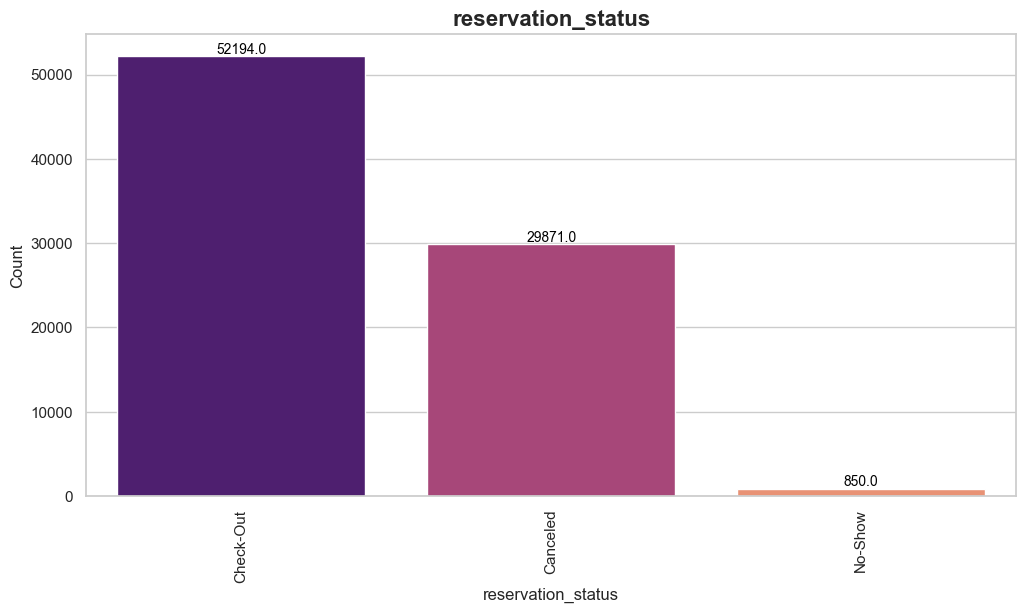

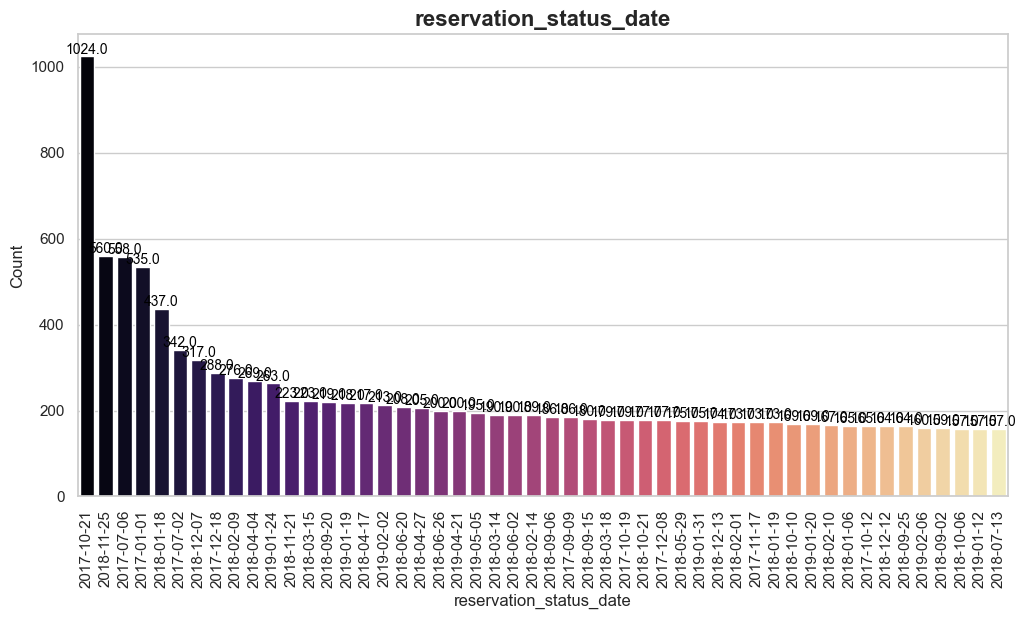

In [88]:
# Set the number of top values to display and other options
top_values = 50
palette = "magma"
show_grid = True

# Loop through each categorical column and create the bar chart
for column_name in cat_columns:
    bar_kebalik(cat_columns, column_name, top_values=top_values, palette=palette, show_grid=show_grid)
    plt.title(column_name, fontsize=16, fontweight="bold")
    plt.show()

In [89]:
numeric_columns.info()

# Make distribution column for all this numeric column?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82915 entries, 0 to 83292
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     82915 non-null  int64  
 1   lead_time                       82915 non-null  int64  
 2   arrival_date_year               82915 non-null  int64  
 3   arrival_date_week_number        82915 non-null  int64  
 4   arrival_date_day_of_month       82915 non-null  int64  
 5   stays_in_weekend_nights         82915 non-null  int64  
 6   stays_in_week_nights            82915 non-null  int64  
 7   adults                          82915 non-null  int64  
 8   children                        82915 non-null  float64
 9   babies                          82915 non-null  int64  
 10  is_repeated_guest               82915 non-null  int64  
 11  previous_cancellations          82915 non-null  int64  
 12  previous_bookings_not_canceled  

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\2176924316.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color='blue')
C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\2176924316.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color='blue')
C:\Users\Zen

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\2176924316.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column], color='blue')


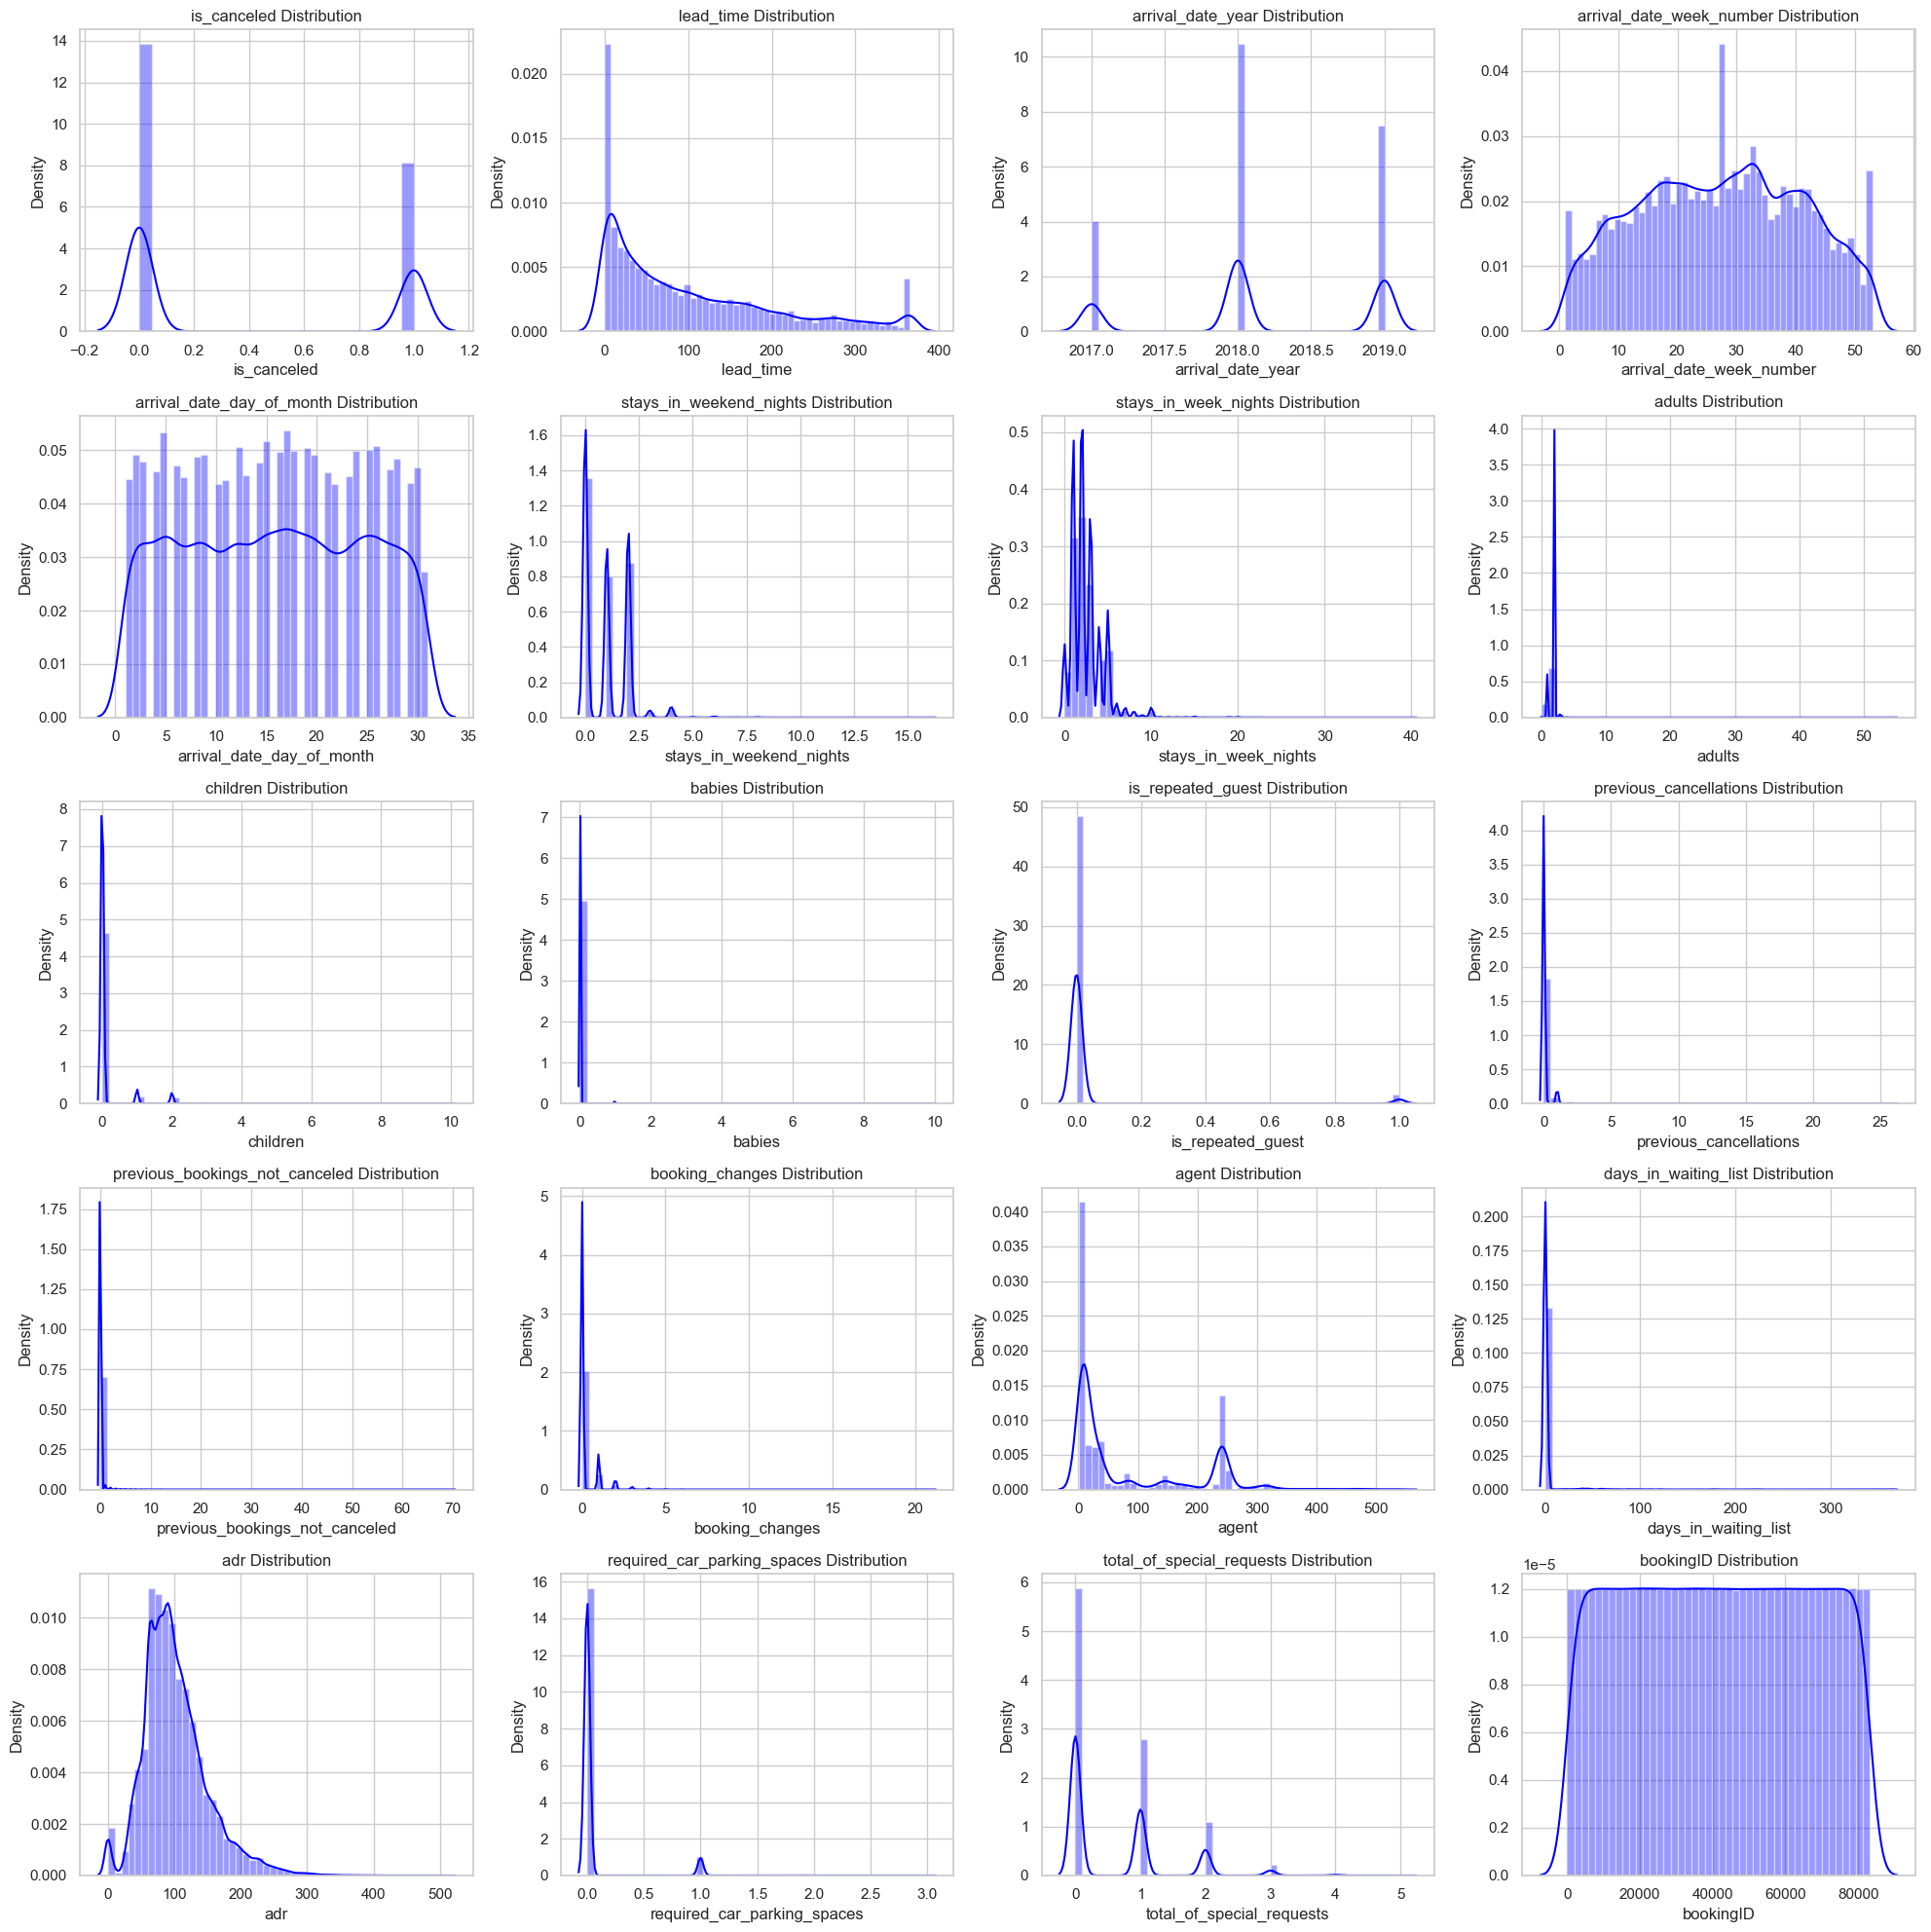

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 20))

# Loop through all columns in the DataFrame
numeric_columns = df.select_dtypes(include=['int', 'float'])  # Select numeric columns
num_rows = 5  # Number of rows in the subplot grid
num_cols = 4  # Number of columns in the subplot grid
total_subplots = num_rows * num_cols  # Total subplots allowed

for i, column in enumerate(numeric_columns.columns):
    if i < total_subplots:
        plt.subplot(num_rows, num_cols, i + 1)
        sns.distplot(df[column], color='blue')
        plt.title(f'{column} Distribution')
    else:
        break  # Exit the loop if the maximum number of subplots is reached

plt.tight_layout()
plt.show()


**Top 10 Hotel Name with the Highest Sales**

Text(0.3, 1.08, 'Top 10 Highest Sales Hotel')

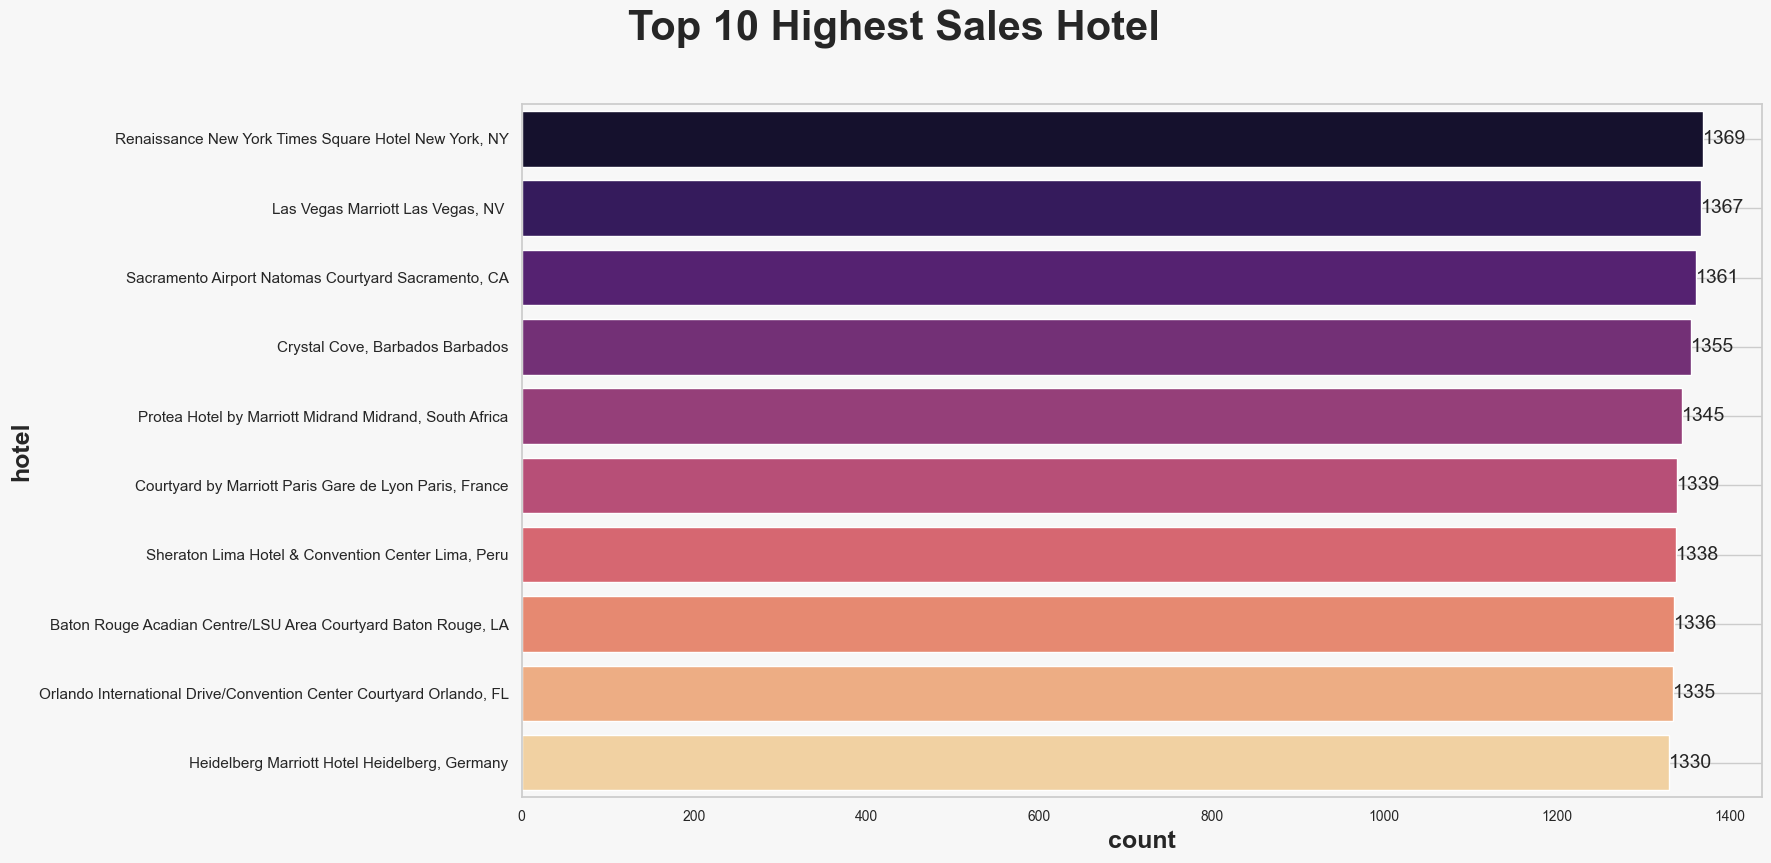

In [91]:
plot_bar_chart(df, column_name="hotel", top_values=10, palette="magma", show_grid=True)

plt.title("Top 10 Highest Sales Hotel", fontsize=30, fontweight="bold", ha="center", y = 1.08, x = 0.3)

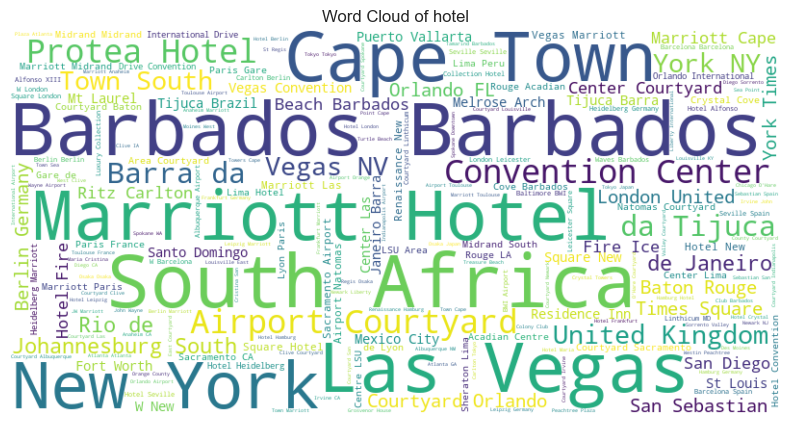

In [92]:
hotel = ' '.join(df['hotel'])
generate_word_cloud(hotel, title='Word Cloud of hotel')

**Is the booking canceled?**

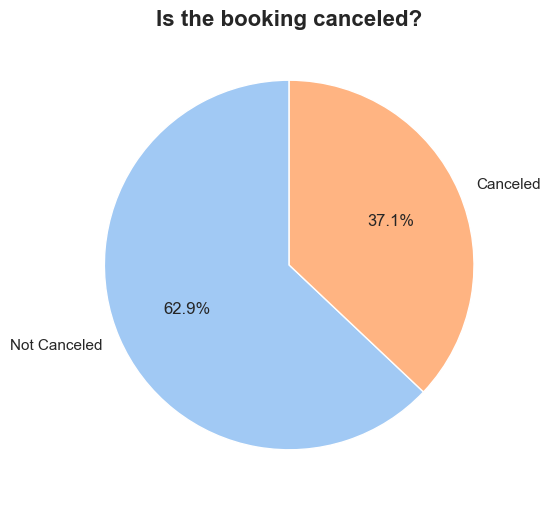

In [93]:
num_can = df['is_canceled'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(num_can, labels=['Not Canceled', 'Canceled'], autopct='%.1f%%', startangle=90, colors=sns.color_palette("pastel"))

plt.title("Is the booking canceled?", fontsize=16, fontweight="bold")

plt.show()

**lead_time**

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\4101661091.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x='lead_time', bins=30, palette='magma', kde=True)


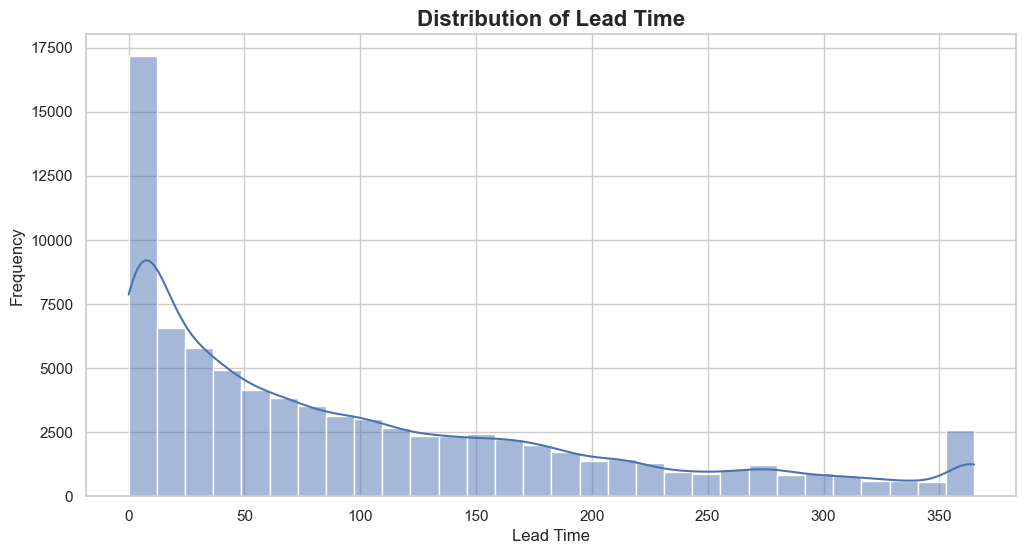

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a distribution plot for lead_time
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='lead_time', bins=30, palette='magma', kde=True)
plt.title("Distribution of Lead Time", fontsize=16, fontweight="bold")
plt.xlabel("Lead Time", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)

plt.show()


**Top 10 Customer Origin**

Text(0.5, 1.08, 'Top 10 Highest Country')

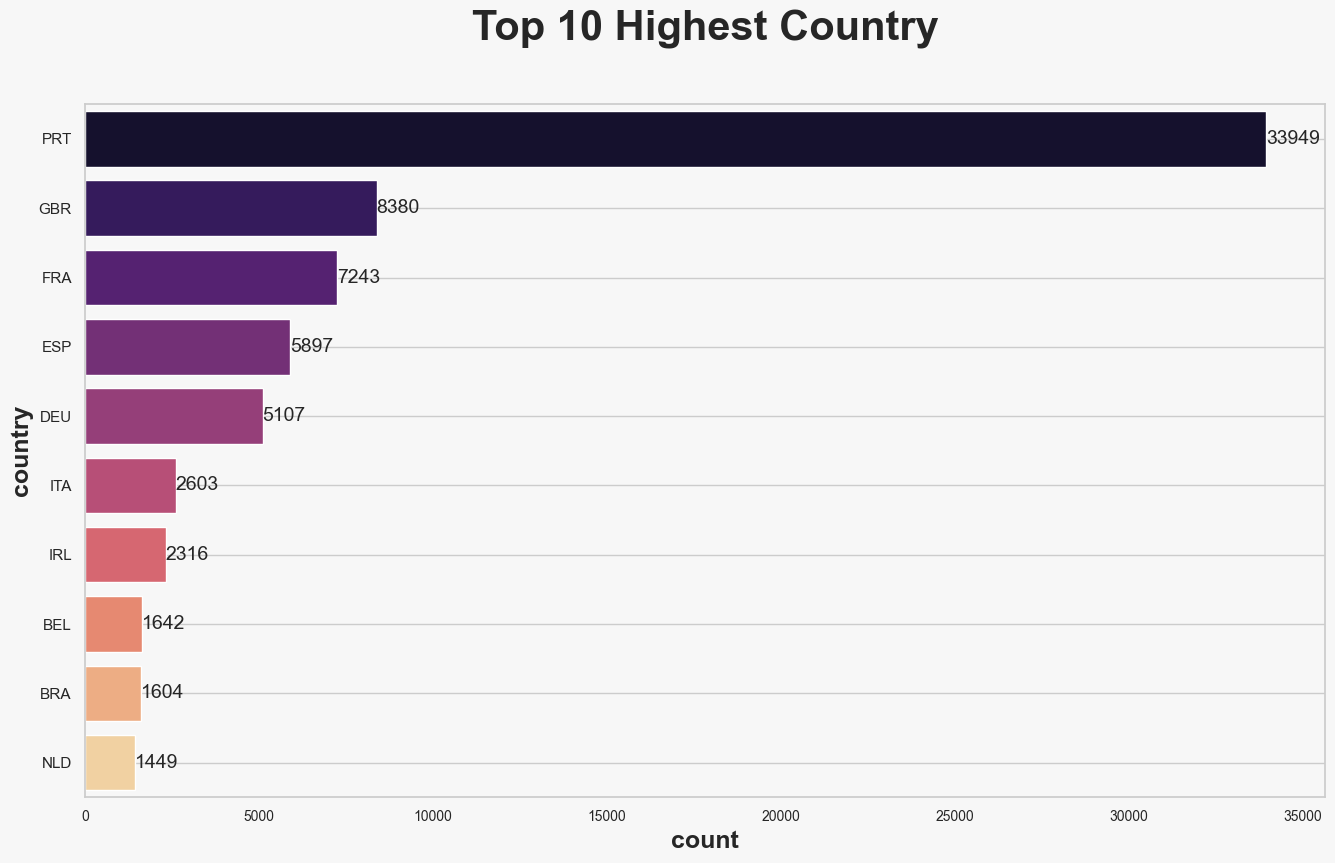

In [95]:
plot_bar_chart(df, column_name="country", top_values=10, palette="magma", show_grid=True)

plt.title("Top 10 Highest Country", fontsize=30, fontweight="bold", ha="center", y = 1.08, x = 0.5)

**market_segment**

Text(0.5, 1.08, 'Highest Market Segment')

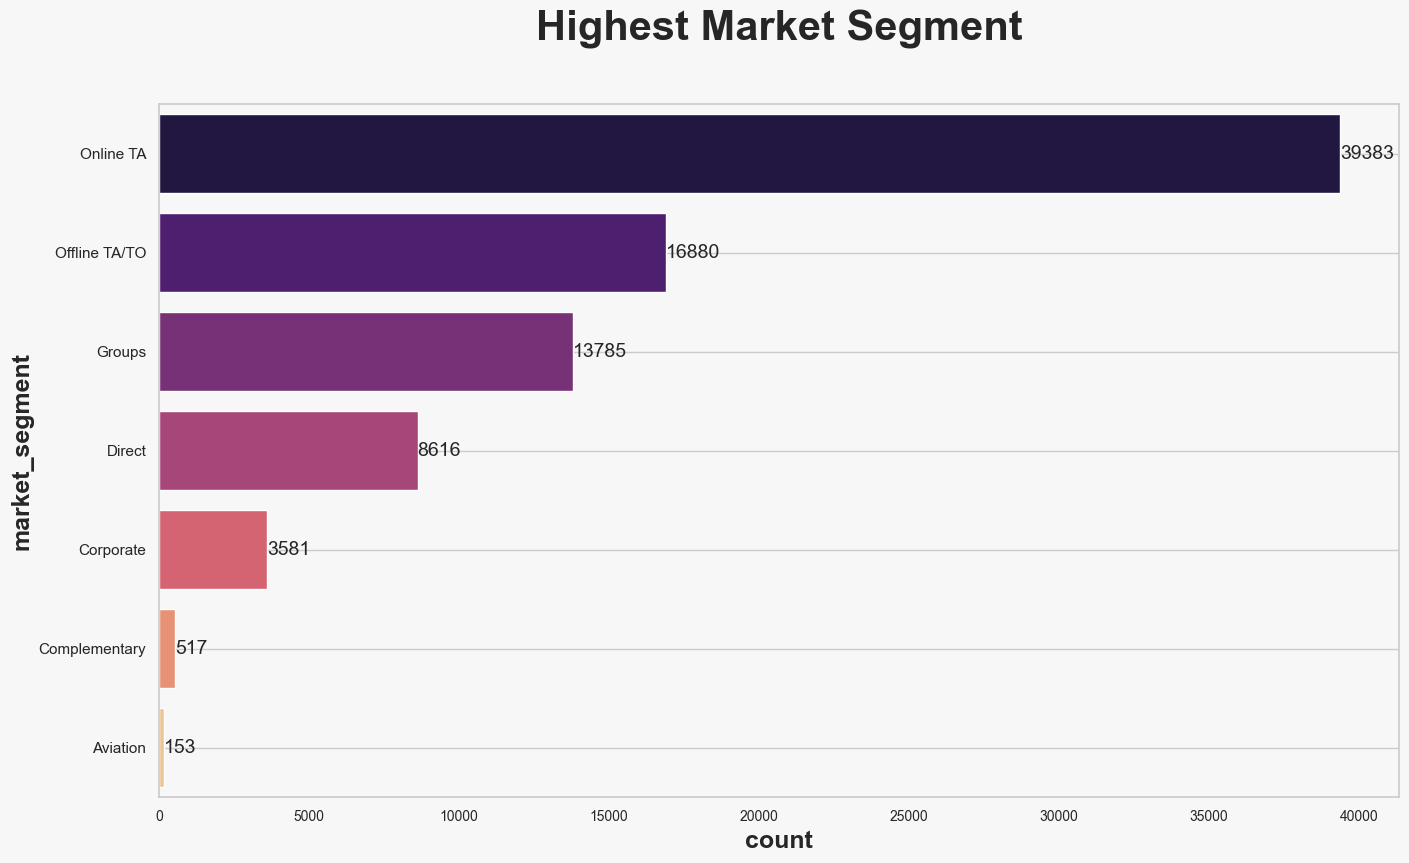

In [96]:
plot_bar_chart(df, column_name="market_segment", top_values=10, palette="magma", show_grid=True)

plt.title("Highest Market Segment", fontsize=30, fontweight="bold", ha="center", y = 1.08, x = 0.5)

**Distribution_Channel**

Text(0.5, 1.08, 'Distribution Channel')

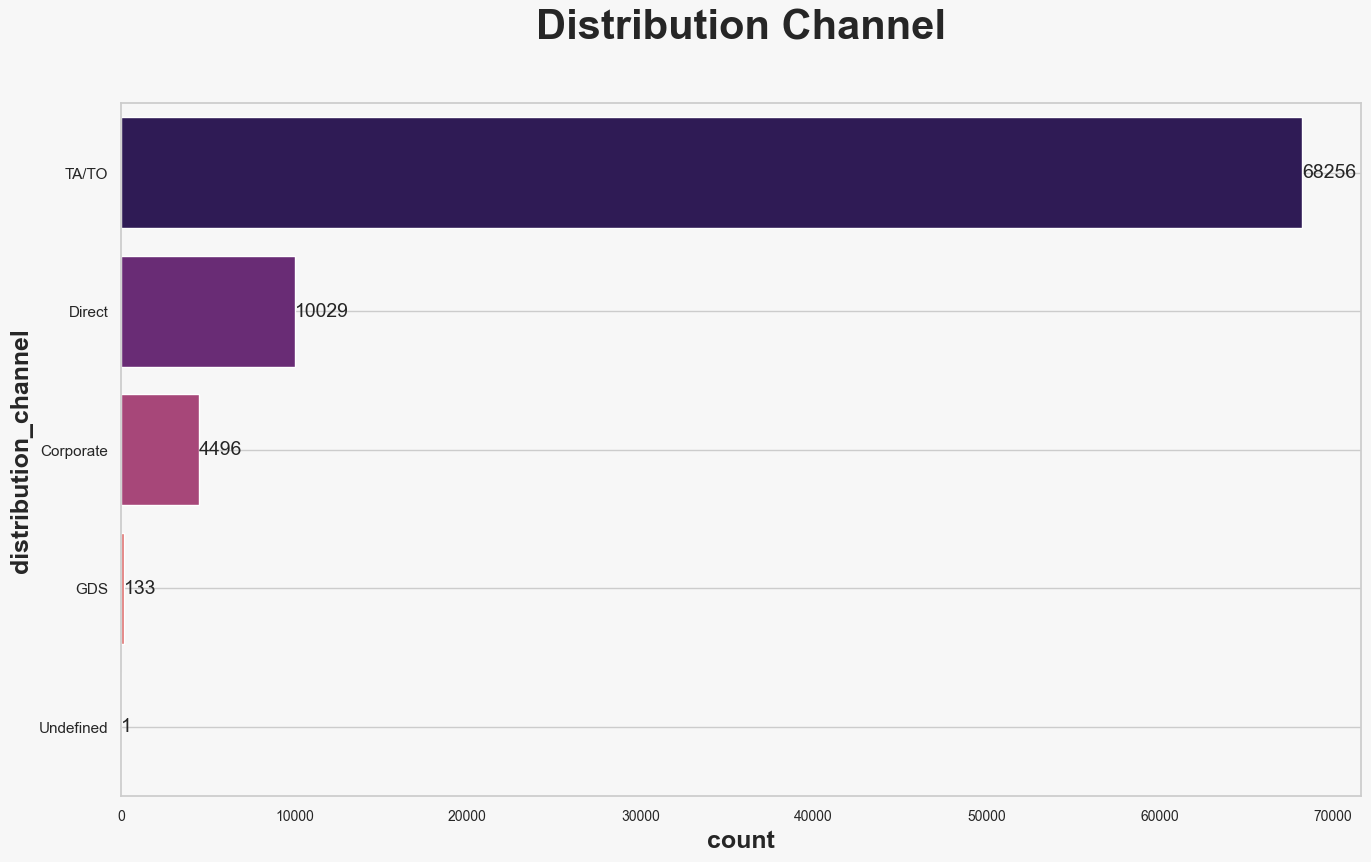

In [97]:
plot_bar_chart(df, column_name="distribution_channel", top_values=10, palette="magma", show_grid=True)

plt.title("Distribution Channel", fontsize=30, fontweight="bold", ha="center", y = 1.08, x = 0.5)

**Distribution of Total Stays**

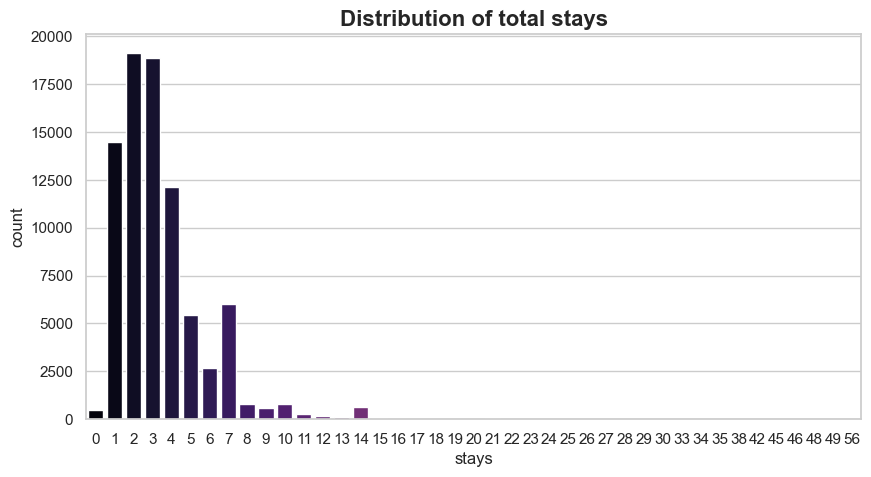

In [98]:
df['stays']= df['stays_in_weekend_nights']+df['stays_in_week_nights']
plt.figure(figsize=(10,5))
sns.countplot(x=df['stays'], palette='magma')
plt.title("Distribution of total stays", fontsize=16, fontweight="bold")

plt.show()

Text(0.5, 1.08, 'Did they actually paid?')

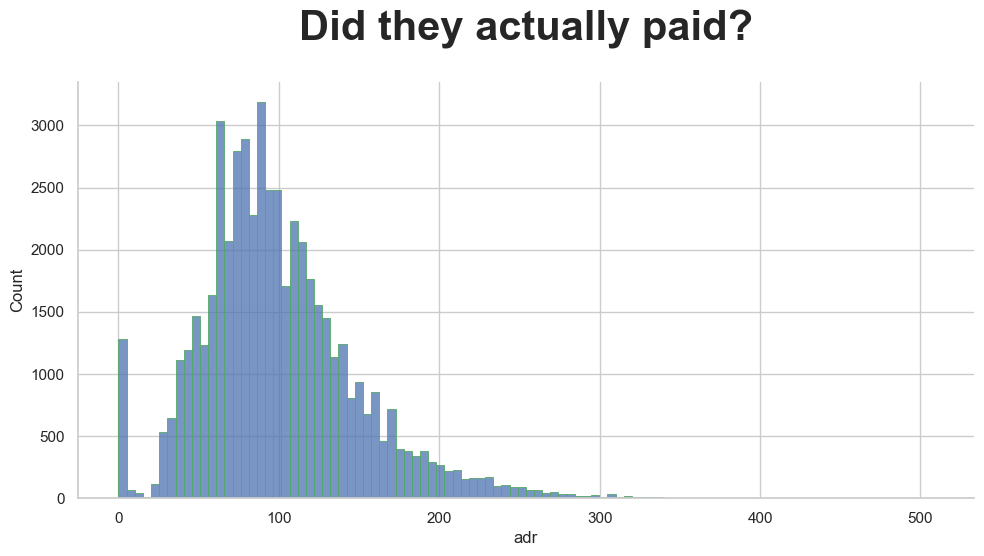

In [99]:
sns.displot(data = df[df['is_canceled'] == 0], x = 'adr',
            height = 5, aspect= 2, bins = 100, color = 'b',
            edgecolor = 'g')

plt.title("Did they actually paid?", fontsize=30,
          fontweight="bold", ha="center", y = 1.08, x = 0.5)

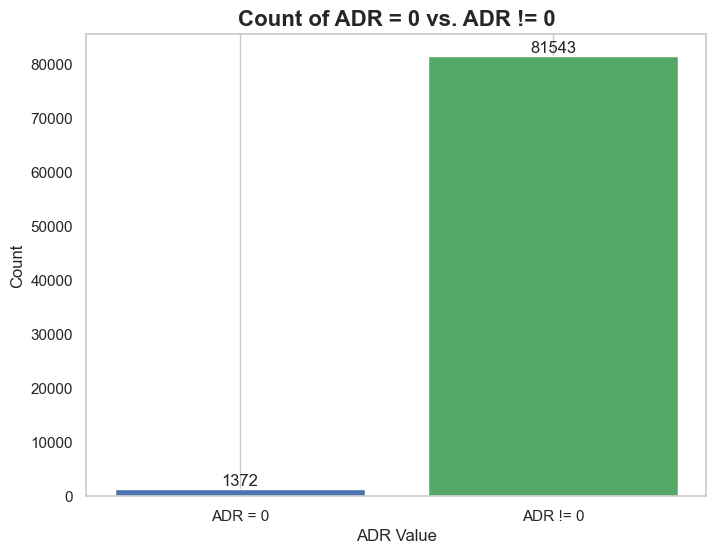

In [100]:
import matplotlib.pyplot as plt

# Menghitung jumlah kasus dengan adr = 0
adr_zero_count = (df['adr'] == 0).sum()

# Menghitung jumlah kasus dengan adr != 0
adr_nonzero_count = (df['adr'] != 0).sum()

# Membuat plot bar untuk jumlah kasus
plt.figure(figsize=(8, 6))
bars = plt.bar(['ADR = 0', 'ADR != 0'], [adr_zero_count, adr_nonzero_count], color=['b', 'g'])
plt.title("Count of ADR = 0 vs. ADR != 0", fontsize=16, fontweight="bold")
plt.xlabel("ADR Value", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y')

# Menambahkan nilai di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, int(yval), ha='center', va='bottom', fontsize=12)

plt.show()

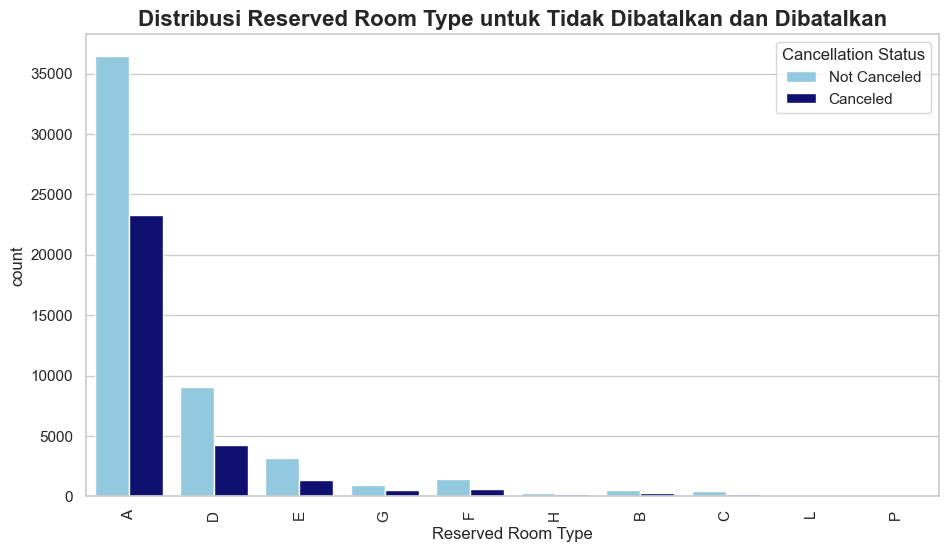

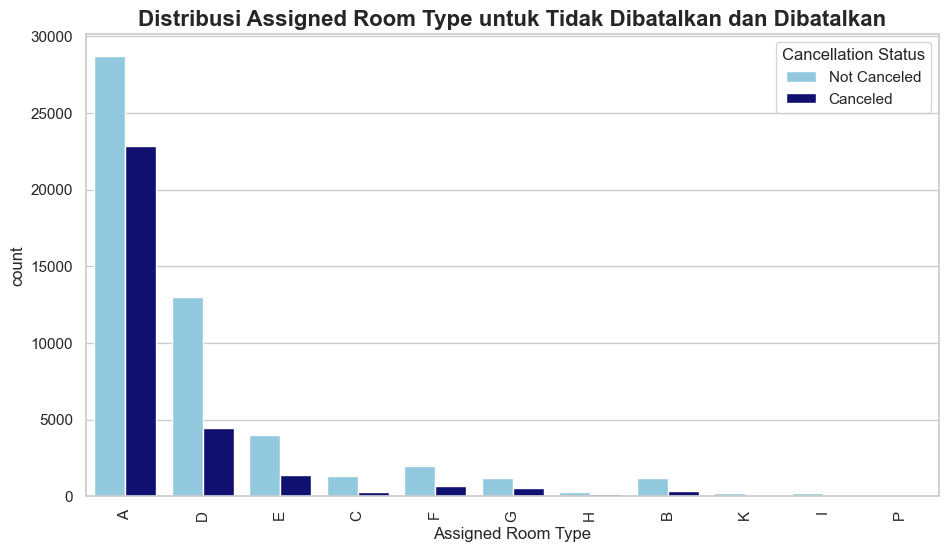

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(11, 6))

# Plot distribusi untuk reserved_room_type
sns.countplot(data=df, x='reserved_room_type', hue='is_canceled', palette=["skyblue", "navy"])
plt.title('Distribusi Reserved Room Type untuk Tidak Dibatalkan dan Dibatalkan', fontsize=16, fontweight='bold')
plt.xlabel('Reserved Room Type')
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.xticks(rotation=90)  # Untuk memutar label sumbu x agar terlihat lebih baik

plt.show()

plt.figure(figsize=(11, 6))

# Plot distribusi untuk assigned_room_type
sns.countplot(data=df, x='assigned_room_type', hue='is_canceled', palette=["skyblue", "navy"])
plt.title('Distribusi Assigned Room Type untuk Tidak Dibatalkan dan Dibatalkan', fontsize=16, fontweight='bold')
plt.xlabel('Assigned Room Type')
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.xticks(rotation=90)  # Untuk memutar label sumbu x agar terlihat lebih baik

plt.show()


## 3. EDA Question

## **Corelation with Cancel Booking**

### ADR

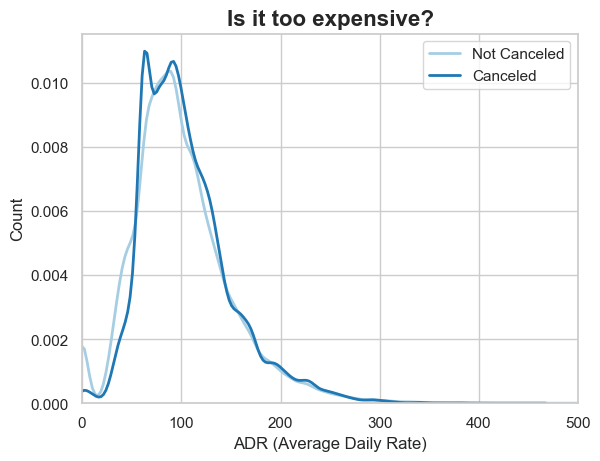

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the style and palette
sns.set(style="whitegrid", palette="Paired")

# Create the KDE plot for 'adr' for not canceled reservations
sns.kdeplot(data=df[df['is_canceled'] == 0], x='adr', label='Not Canceled', linewidth=2)

# Create the KDE plot for 'adr' for canceled reservations
sns.kdeplot(data=df[df['is_canceled'] == 1], x='adr', label='Canceled', linewidth=2)

# Adding title and labels
plt.title('Is it too expensive?', fontsize=16, fontweight='bold')
plt.xlabel('ADR (Average Daily Rate)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Adding legend with a better position
plt.legend(loc='upper right')

# Setting the x-axis limit
plt.xlim(0, 500)

plt.show()


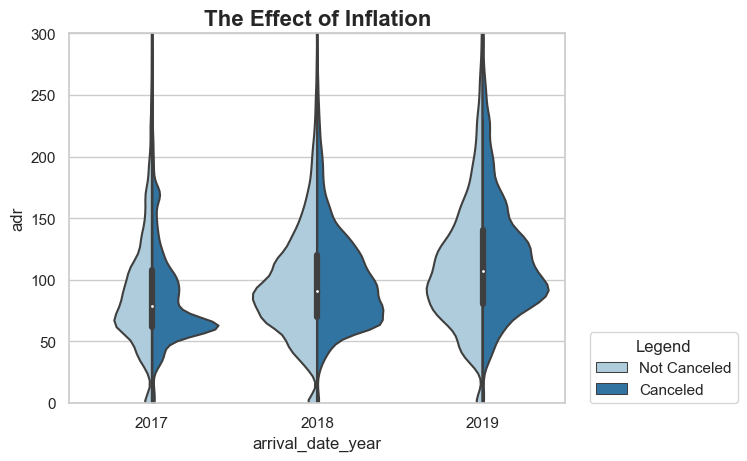

In [103]:
plt.ylim(0, 300)
sns.violinplot(data=df, x='arrival_date_year', y='adr', hue='is_canceled', split=True)
legend = plt.legend(loc=(1.05, 0))

# Menambahkan label kustom ke legenda
custom_labels = ['Not Canceled', 'Canceled']
legend.set_title('Legend')
legend.texts[0].set_text(custom_labels[0])
legend.texts[1].set_text(custom_labels[1])

plt.title('The Effect of Inflation', fontsize=16, fontweight='bold')

plt.show()


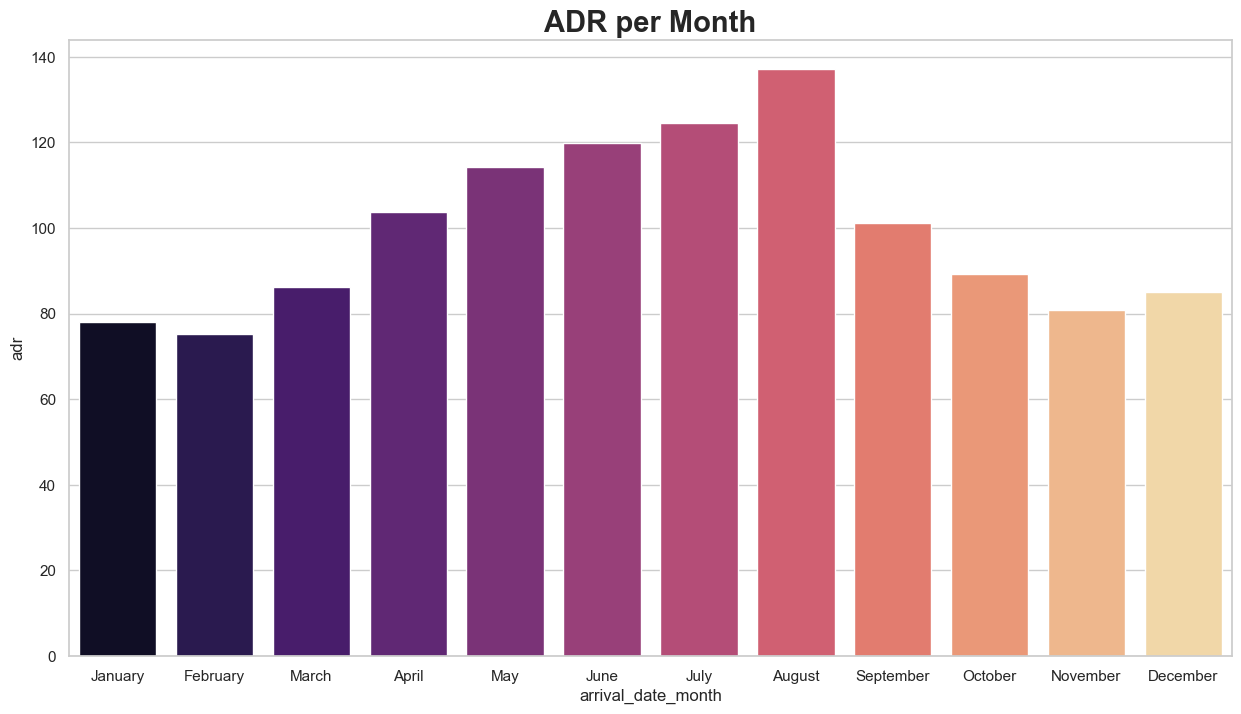

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.title('ADR per Month', fontsize=30)

canceled_reservations = df[df['is_canceled'] == 1]

# Group the data by month and calculate the mean of ADR
monthly_adr = canceled_reservations.groupby('arrival_date_month')['adr'].mean().reset_index()

# Sort the DataFrame by 'adr' in descending order
monthly_adr = monthly_adr.sort_values(by='adr', ascending=False)

# Reorder the months in the correct order
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
monthly_adr["arrival_date_month"] = pd.Categorical(monthly_adr["arrival_date_month"], categories=order, ordered=True)

# Plot the bar chart
sns.barplot(x='arrival_date_month', y='adr', data=monthly_adr, palette="magma")

plt.title('ADR per Month', fontsize=21, fontweight='bold')

plt.show()


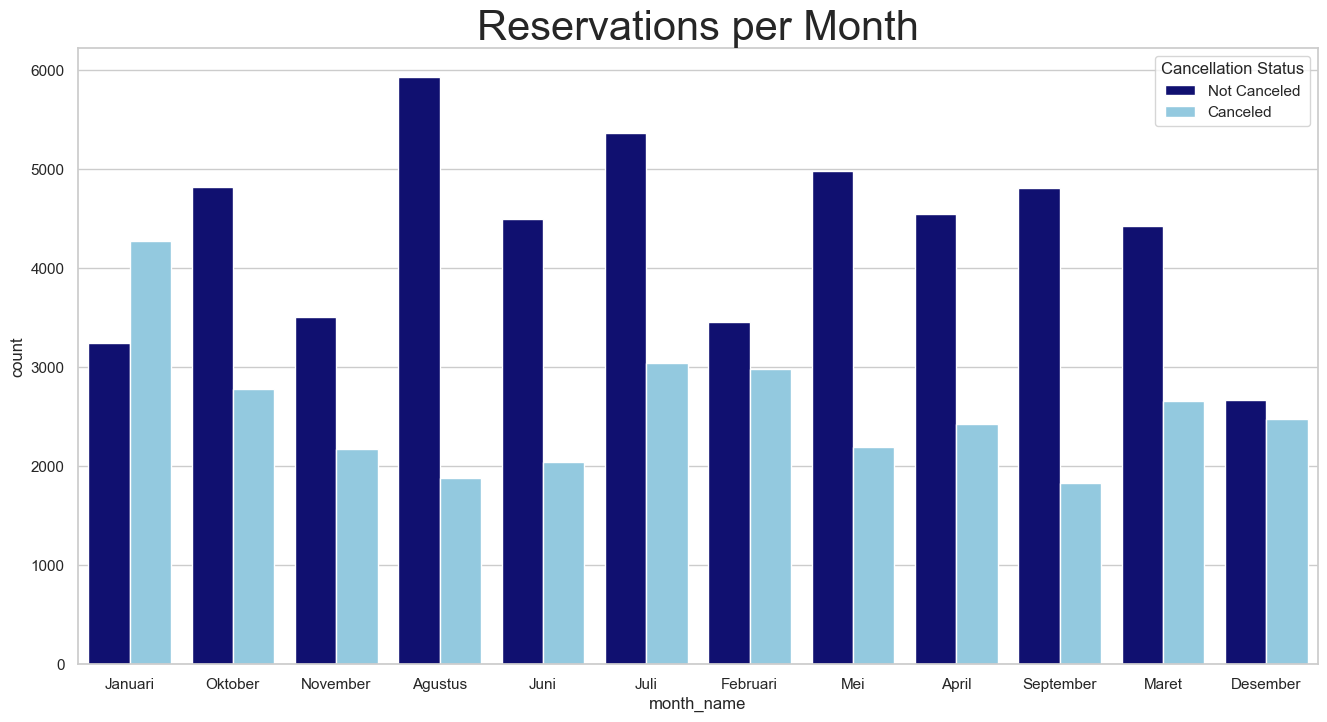

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Menambahkan kolom 'month_name' untuk nama bulan
df['month'] = df['reservation_status_date'].dt.month
month_names = {1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'}
df['month_name'] = df['month'].map(month_names)

# Membuat plot dengan label bulan dalam bentuk nama
plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='month_name', hue='is_canceled', data=df, palette=["navy", "skyblue"])
plt.xticks(rotation=0)  # Untuk memutar label bulan agar lebih legible

# Menambahkan legenda
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.title('Reservations per Month', fontsize=30)

plt.show()


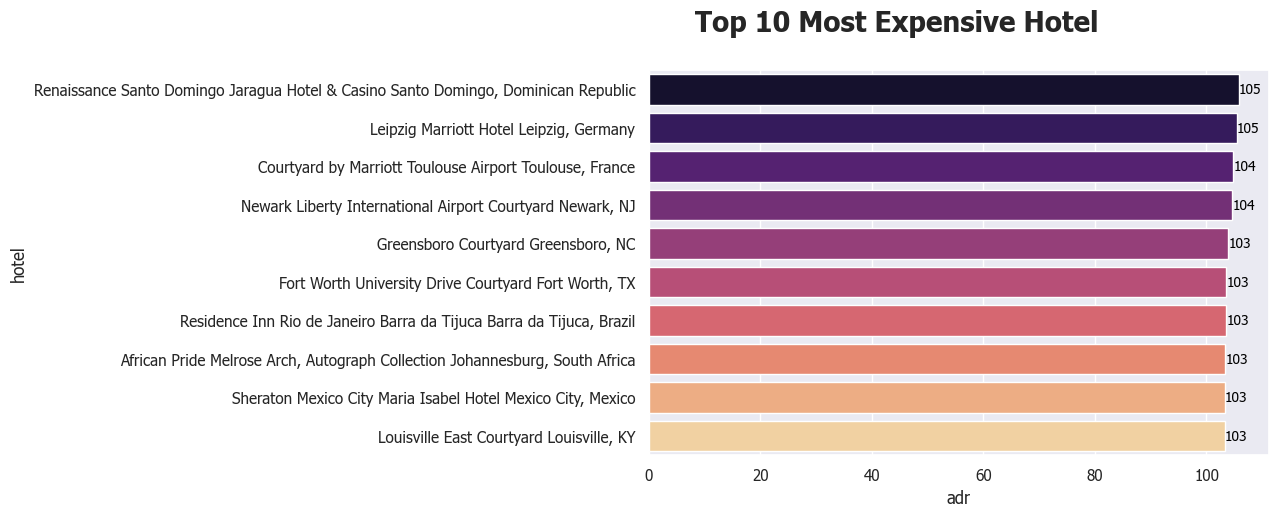

In [ ]:
largest = df.groupby('hotel')['adr'].mean().nlargest(10).reset_index()
sns.set(font='Tahoma')

# Barplot 1 with 'magma' palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=largest, x='adr', y='hotel', palette='magma')
plt.title('Top 10 Most Expensive Hotel', fontsize=20, fontweight="bold", ha="center", y=1.08, x=0.4)
plt.xlabel('adr')
plt.ylabel('hotel')

# Add count above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10, color='black')

plt.show()


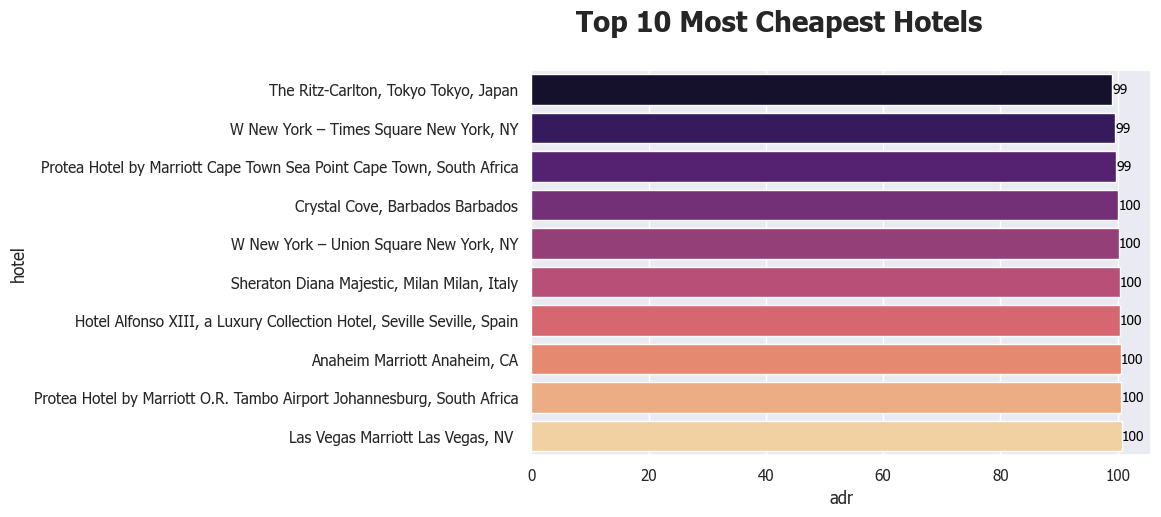

In [ ]:
cheapest = df.groupby('hotel')['adr'].mean().nsmallest(10).reset_index()
sns.set(font='Tahoma')

# Barplot 1 with 'magma' palette
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=cheapest, x='adr', y='hotel', palette='magma')
plt.title('Top 10 Most Cheapest Hotels', fontsize=20, fontweight="bold", ha="center", y=1.08, x=0.4)
plt.xlabel('adr')
plt.ylabel('hotel')

# Add count above each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{int(width)}', ha='left', va='center', fontsize=10, color='black')

plt.show()


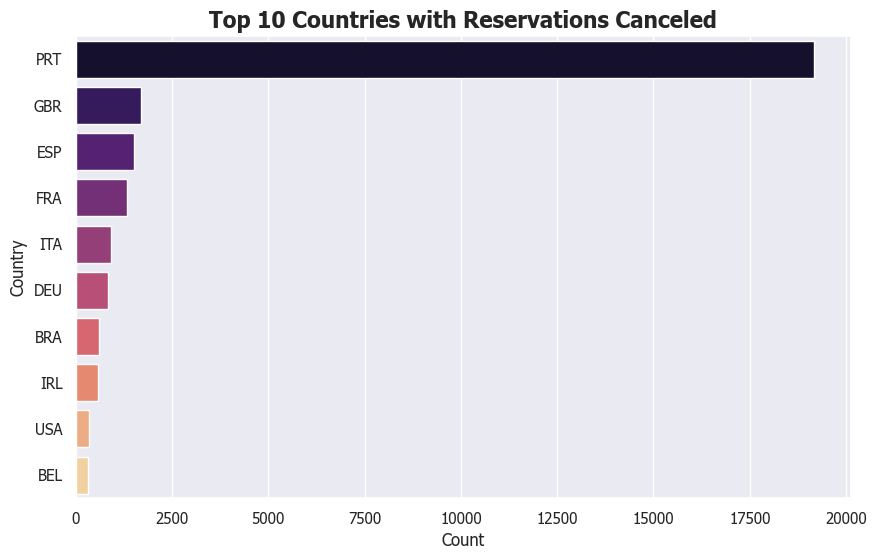

In [ ]:
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
plt.title('Top 10 Countries with Reservations Canceled', fontsize=16, fontweight='bold')
sns.barplot(x=top_10_country.values, y=top_10_country.index, palette='magma')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.show()


In [ ]:
date_canceled = df[['reservation_status_date', 'adr']]
date_canceled

date_canceled['reservation_status_date'] = pd.to_datetime(date_canceled['reservation_status_date'])

# Mengekstrak tahun dari kolom 'reservation_status_date'
date_canceled['reservation_year'] = date_canceled['reservation_status_date'].dt.year

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_4664\2038071612.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_canceled['reservation_status_date'] = pd.to_datetime(date_canceled['reservation_status_date'])
C:\Users\Zenbook\AppData\Local\Temp\ipykernel_4664\2038071612.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_canceled['reservation_year'] = date_canceled['reservation_status_date'].dt.year


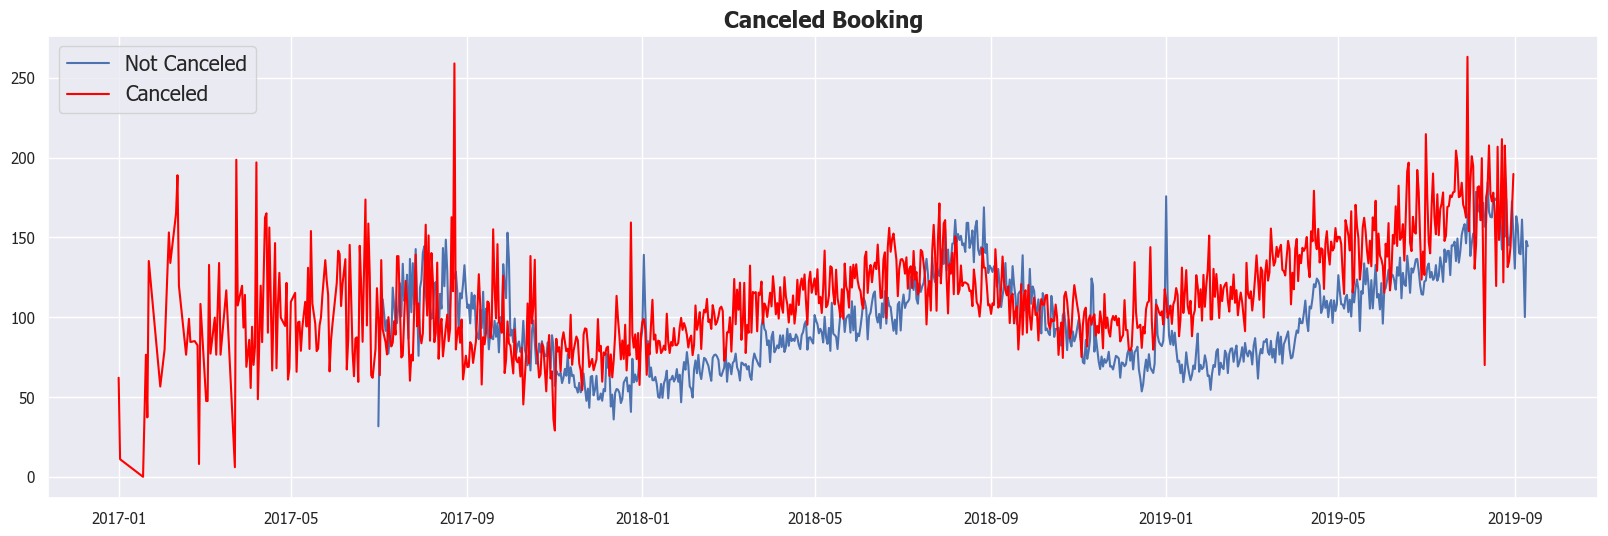

In [ ]:
canceled_data = df[df["is_canceled"] == 1]

not_canceled_data = df[df["is_canceled"] == 0]

canceled_df_adr = canceled_data.groupby("reservation_status_date")["adr"].mean()
canceled_df_adr = canceled_df_adr.reset_index()
canceled_df_adr.sort_values("reservation_status_date", inplace=True)

not_canceled_df_adr = not_canceled_data.groupby("reservation_status_date")["adr"].mean()
not_canceled_df_adr = not_canceled_df_adr.reset_index()
not_canceled_df_adr.sort_values("reservation_status_date", inplace=True)

plt.figure(figsize=(20,6))
plt.title("Average Daily Rate")
plt.plot(not_canceled_df_adr["reservation_status_date"], not_canceled_df_adr["adr"], label="Not Canceled")
plt.plot(canceled_df_adr["reservation_status_date"], canceled_df_adr["adr"], label="Canceled",color="red")
plt.legend(fontsize = 15)

plt.title('Canceled Booking', fontsize=16, fontweight='bold')
plt.show()

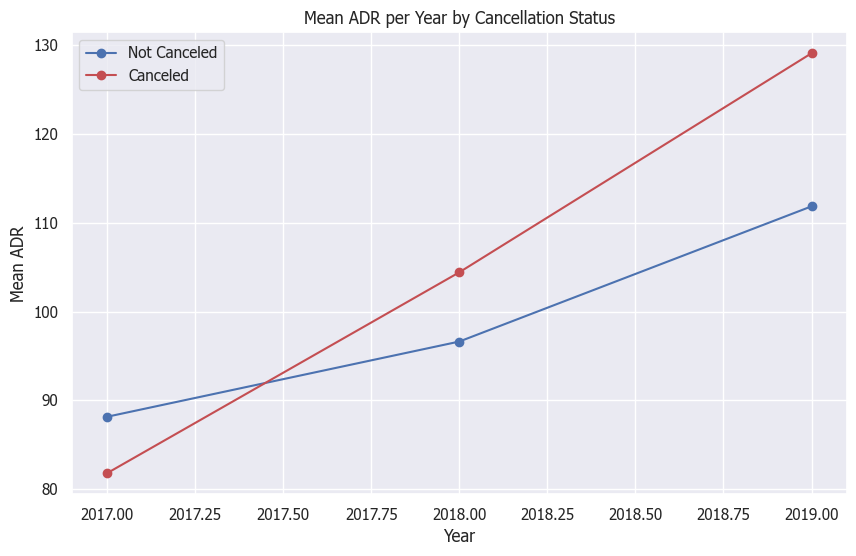

In [ ]:
# Mengkonversi kolom 'reservation_status_date' ke tipe datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Menambahkan kolom 'reservation_year' untuk tahun
df['reservation_year'] = df['reservation_status_date'].dt.year

# Menghitung mean ADR untuk setiap 'is_canceled'
mean_adr_not_canceled = df[df['is_canceled'] == 0].groupby('reservation_year')['adr'].mean().reset_index()
mean_adr_canceled = df[df['is_canceled'] == 1].groupby('reservation_year')['adr'].mean().reset_index()

# Membuat line chart untuk membandingkan is_canceled 0 dan 1
plt.figure(figsize=(10, 6))
plt.plot(mean_adr_not_canceled['reservation_year'], mean_adr_not_canceled['adr'], marker='o', linestyle='-', color='b', label='Not Canceled')
plt.plot(mean_adr_canceled['reservation_year'], mean_adr_canceled['adr'], marker='o', linestyle='-', color='r', label='Canceled')
plt.title('Mean ADR per Year by Cancellation Status')
plt.xlabel('Year')
plt.ylabel('Mean ADR')
plt.grid(True)
plt.legend()
plt.show()

### Other

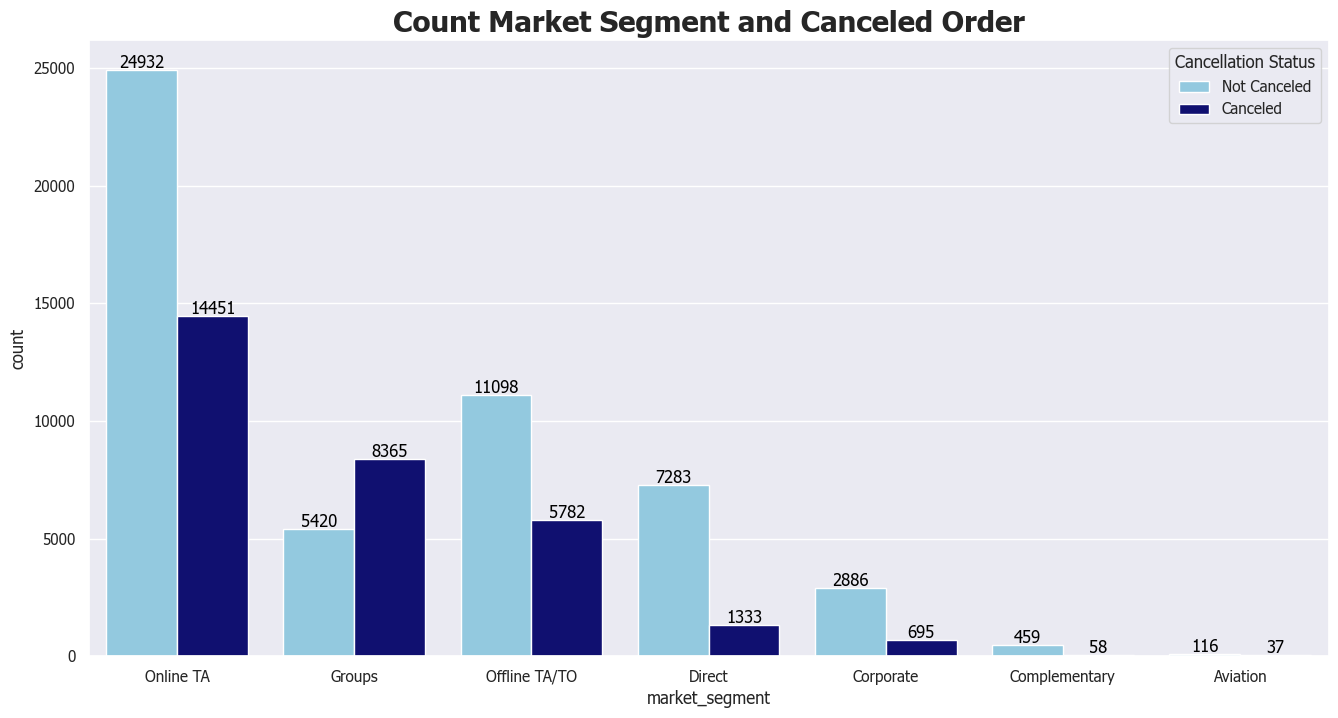

In [ ]:
# Membuat plot dengan label 'market_segment' sebagai sumbu x
plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='market_segment', hue='is_canceled',
                    data=df, palette=["skyblue", "navy"])  

# Menambahkan legenda
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.title('Count Market Segment and Canceled Order', fontsize=21, fontweight='bold')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

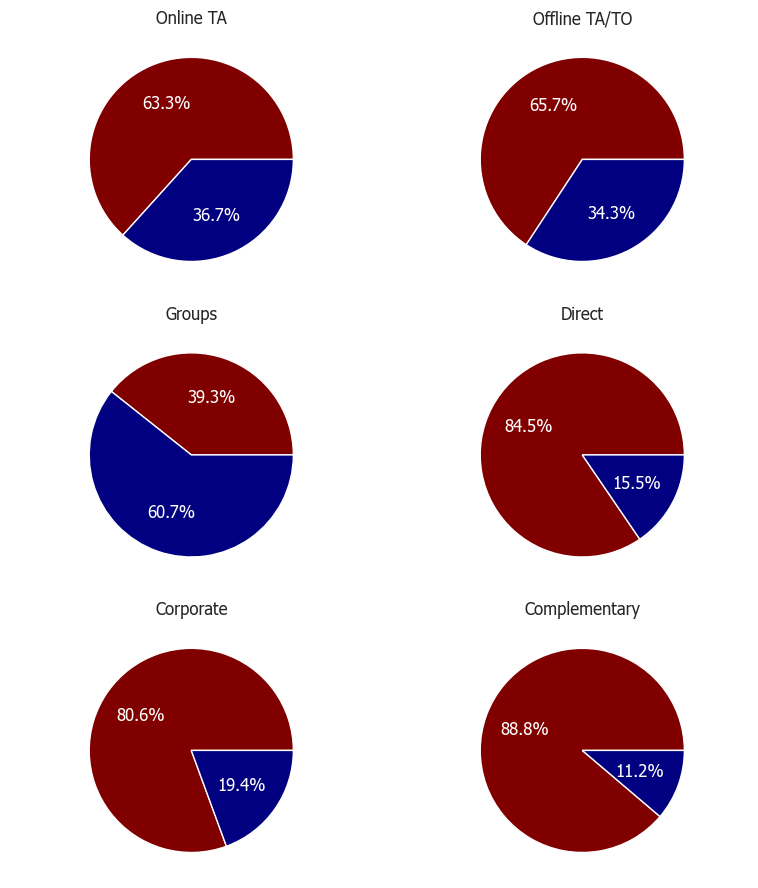

In [ ]:
# Menghitung persentase cancel dan tidak cancel per market_segment
segment_counts = df['market_segment'].value_counts()
cancel_percentages = []
not_cancel_percentages = []

for segment in segment_counts.index:
    cancel_count = df[(df['market_segment'] == segment) & (df['is_canceled'] == 1)]['market_segment'].count()
    not_cancel_count = df[(df['market_segment'] == segment) & (df['is_canceled'] == 0)]['market_segment'].count()
    total_count = segment_counts[segment]
    cancel_percentage = (cancel_count / total_count) * 100
    not_cancel_percentage = (not_cancel_count / total_count) * 100
    cancel_percentages.append(cancel_percentage)
    not_cancel_percentages.append(not_cancel_percentage)

# Membuat pie chart per market_segment
plt.figure(figsize=(8, 12))
plt.title('Cancellation Status by Market Segment', fontsize=21, fontweight='bold')

# Maksimum 2 pie chart per baris
num_rows = len(segment_counts) // 2 + 1
num_cols = 2

for i, segment in enumerate(segment_counts.index):
    plt.subplot(num_rows, num_cols, i + 1, aspect='equal')
    plt.pie([not_cancel_percentages[i], cancel_percentages[i]], labels=["Not Canceled", "Canceled"],
            autopct='%1.1f%%', colors=["maroon", "navy"], textprops={'color': 'white'})
    plt.title(segment)

# Hapus subplot yang tidak digunakan
for i in range(len(segment_counts), num_rows * num_cols):
    plt.delaxes(plt.gca())

plt.tight_layout()
plt.show()

In [ ]:
# day of the week vs cancellations
df['day_of_week']=df.reservation_status_date.apply(lambda i: i.day_name())

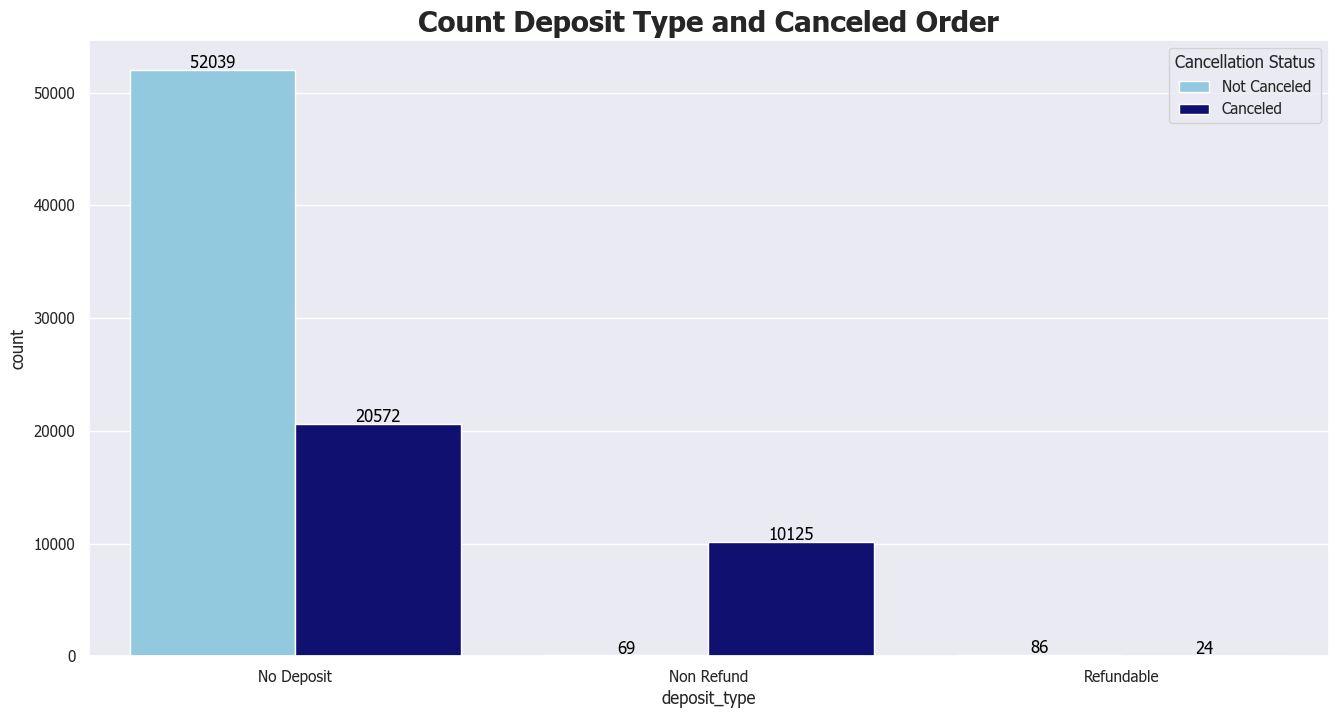

In [ ]:
# Membuat plot dengan label 'deposit_type' sebagai sumbu x
plt.figure(figsize=(16, 8))
ax1 = sns.countplot(x='deposit_type', hue='is_canceled',
                    data=df, palette=["skyblue", "navy"])  

# Menambahkan legenda
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.title('Count Deposit Type and Canceled Order', fontsize=21, fontweight='bold')

for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


C:\Users\Zenbook\AppData\Local\Temp\ipykernel_4664\2695192416.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n_cancel['lead_time'], bins=50, label='Not Canceled')
C:\Users\Zenbook\AppData\Local\Temp\ipykernel_4664\2695192416.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cancel['lead_t

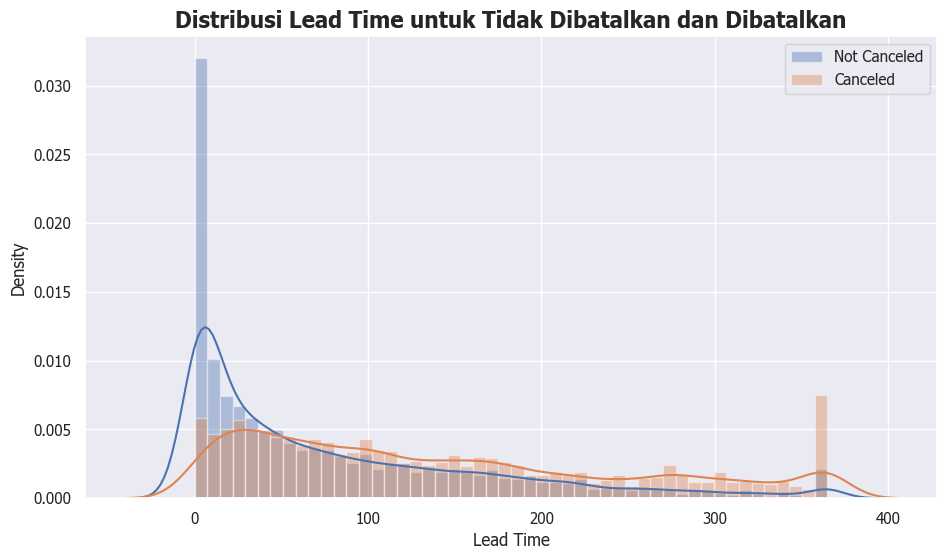

In [ ]:
plt.figure(figsize=(11, 6))

n_cancel = df[df['is_canceled'] == 0]
sns.distplot(n_cancel['lead_time'], bins=50, label='Not Canceled')

cancel = df[df['is_canceled'] == 1]
sns.distplot(cancel['lead_time'], bins=50, label='Canceled')

plt.title('Distribusi Lead Time untuk Tidak Dibatalkan dan Dibatalkan', fontsize=16, fontweight='bold')
plt.xlabel('Lead Time')
plt.legend()
plt.show()

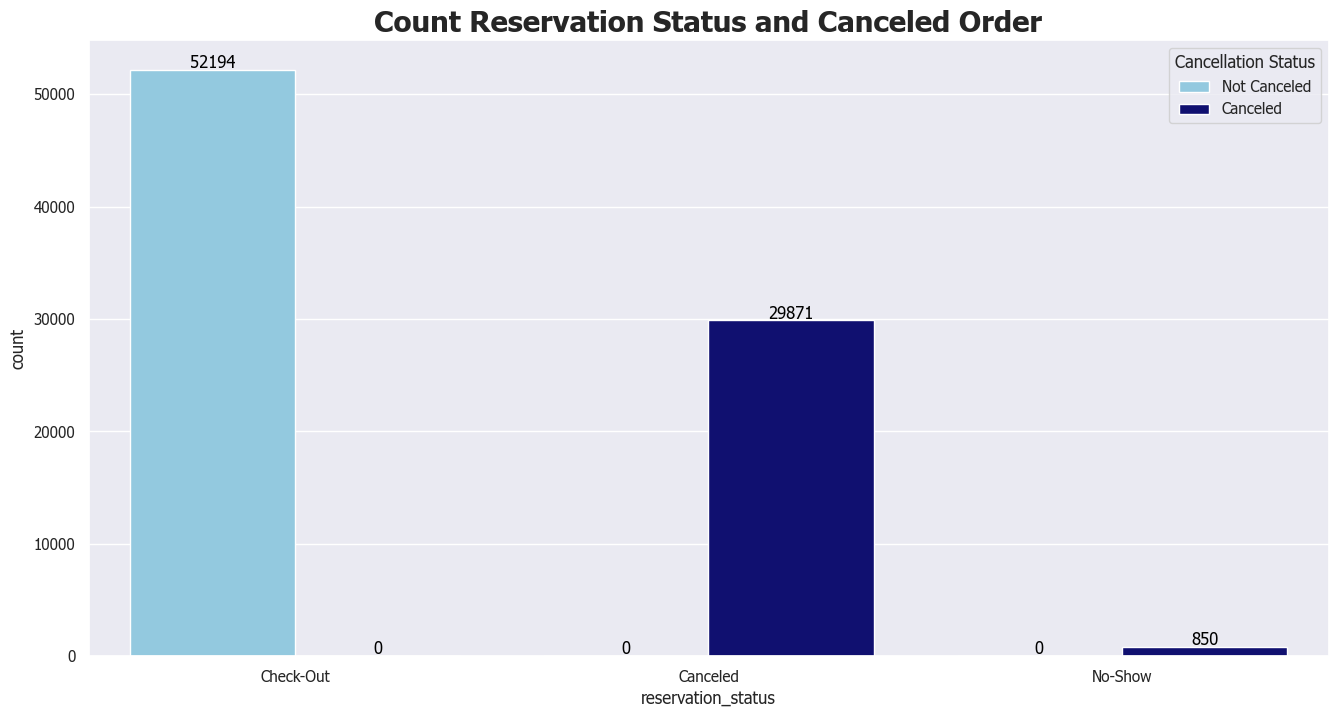

In [ ]:
# Membuat plot dengan label 'reservation_status' sebagai sumbu x
plt.figure(figsize=(16, 8))
ax2 = sns.countplot(x='reservation_status', hue='is_canceled',
                    data=df, palette=["skyblue", "navy"])  

# Menambahkan legenda
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.title('Count Reservation Status and Canceled Order', fontsize=21, fontweight='bold')

for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

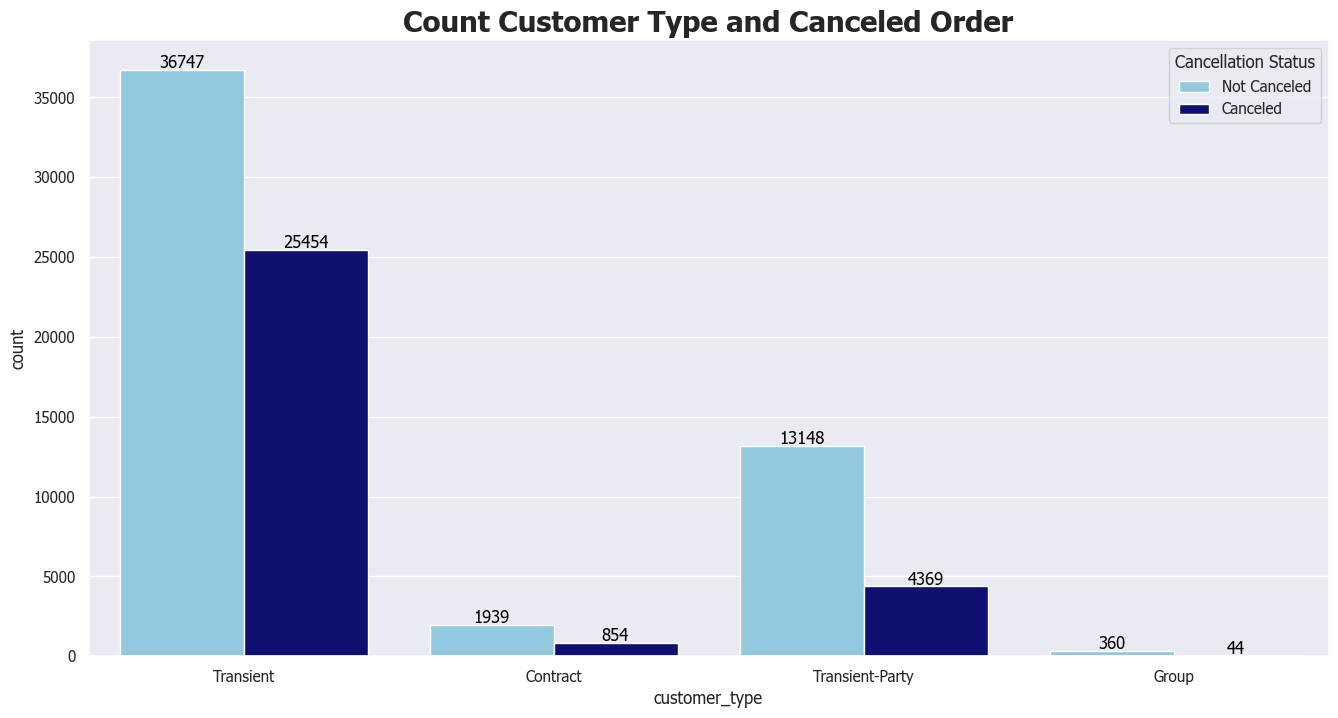

In [ ]:
# Membuat plot dengan label 'customer_type' sebagai sumbu x
plt.figure(figsize=(16, 8))
ax3 = sns.countplot(x='customer_type', hue='is_canceled',
                    data=df, palette=["skyblue", "navy"])  

# Menambahkan legenda
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.title('Count Customer Type and Canceled Order', fontsize=21, fontweight='bold')

for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


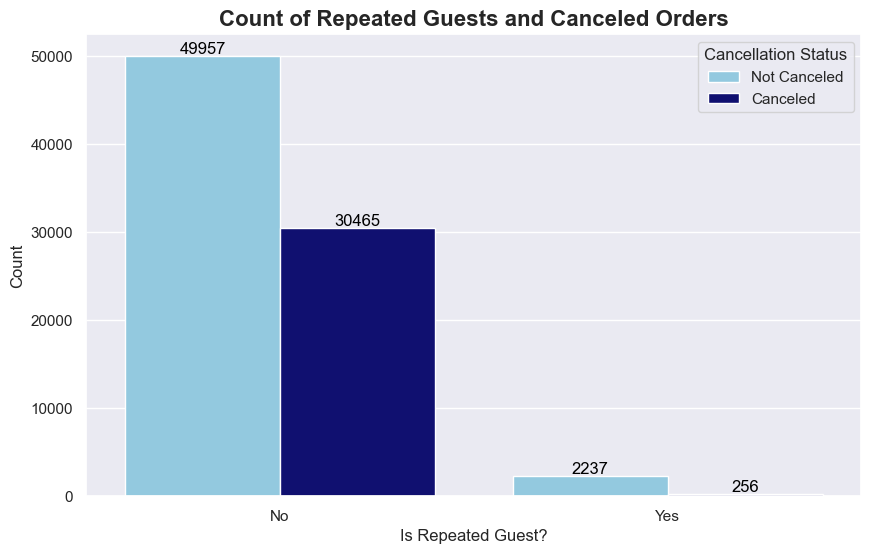

In [ ]:
# Membuat plot dengan label 'is_repeated_guest' sebagai sumbu x
plt.figure(figsize=(10, 6))
ax3 = sns.countplot(x='is_repeated_guest', hue='is_canceled',
                    data=df, palette=["skyblue", "navy"])  

# Menambahkan legenda
plt.legend(title="Cancellation Status", labels=["Not Canceled", "Canceled"])
plt.title('Count of Repeated Guests and Canceled Orders', fontsize=16, fontweight='bold')

for p in ax3.patches:
    ax3.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mengganti label sumbu x
plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Is Repeated Guest?')
plt.ylabel('Count')
plt.show()

# **Machine Learning**

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\3158987996.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=True)


<AxesSubplot:>

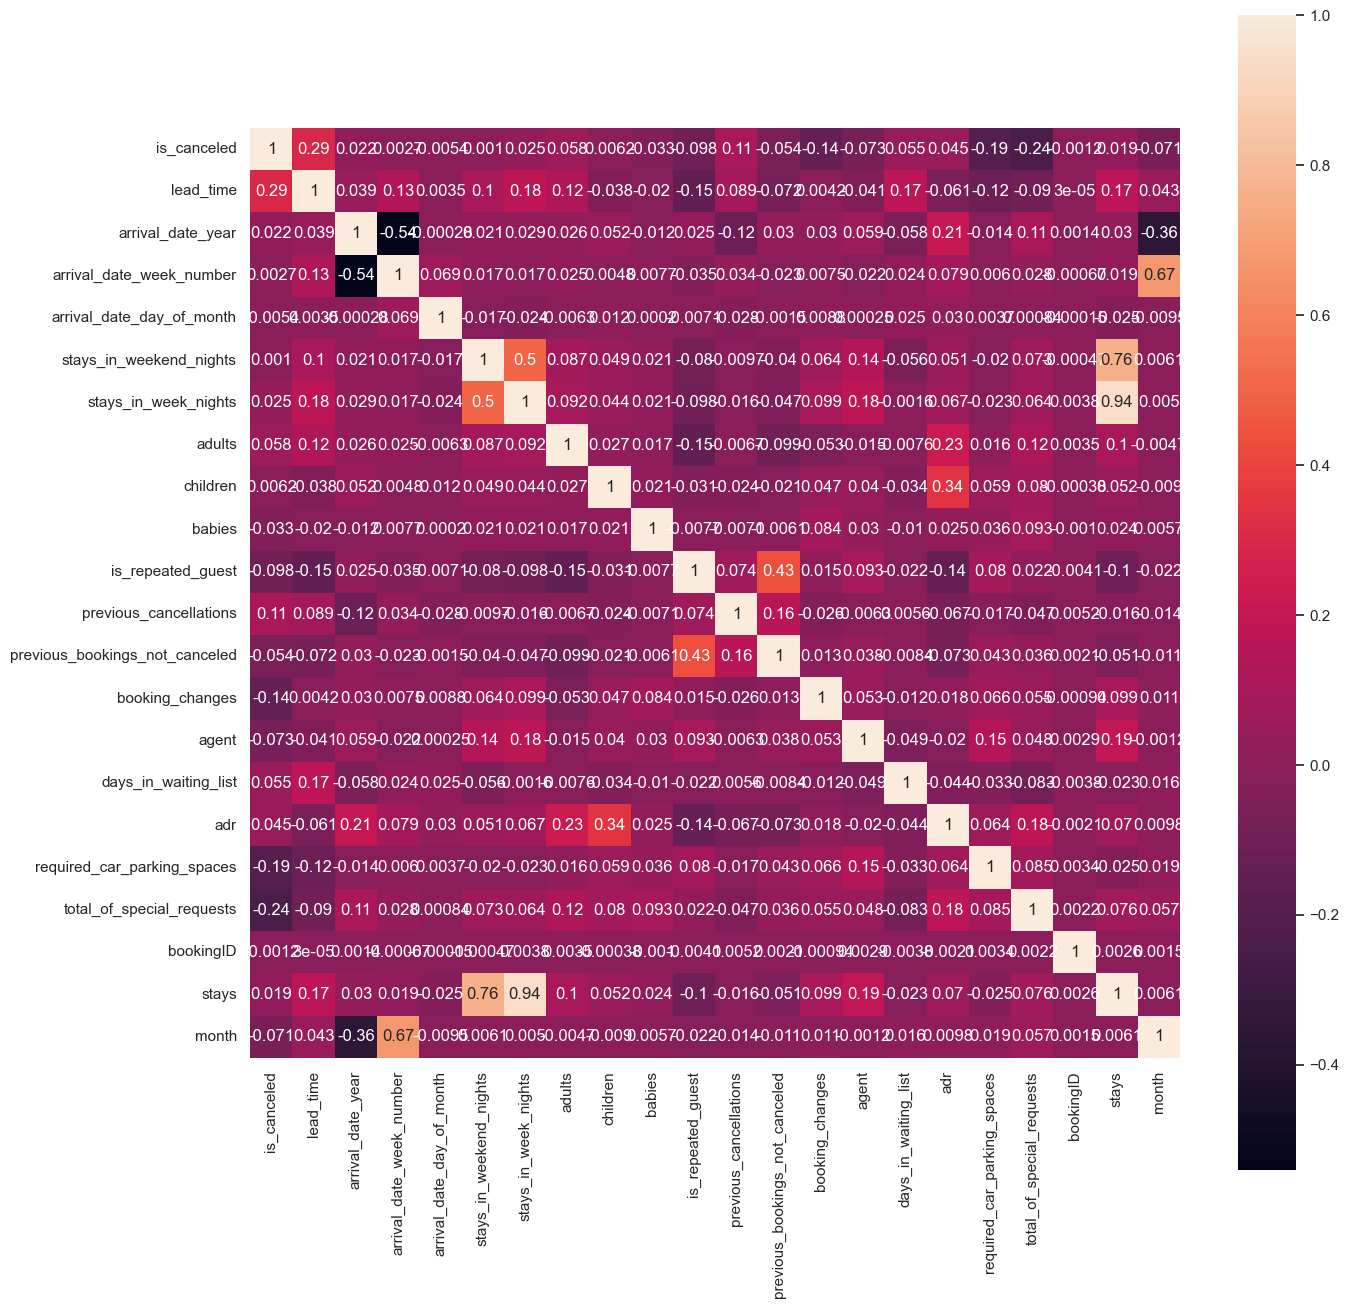

In [109]:
# heatmap of correlation yang baru
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(df.corr(), annot=True, square=True)

Karena sebelumnya menambahkan kolom stays, maka kolom stays in weekend & stay in week dapat di drop

In [110]:
df.drop(columns=['stays_in_weekend_nights'], inplace=True)
df.drop(columns=['stays_in_week_nights'], inplace=True)

sama halnya dengan arrival_date_year, karena sudah ada kolom reservation_year. lalu arrival date_month karena sudah ada month

In [111]:
df.drop(columns=['arrival_date_year'], inplace=True)

In [112]:
df.drop(columns=['arrival_date_week_number'], inplace=True)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\3158987996.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=True)


<AxesSubplot:>

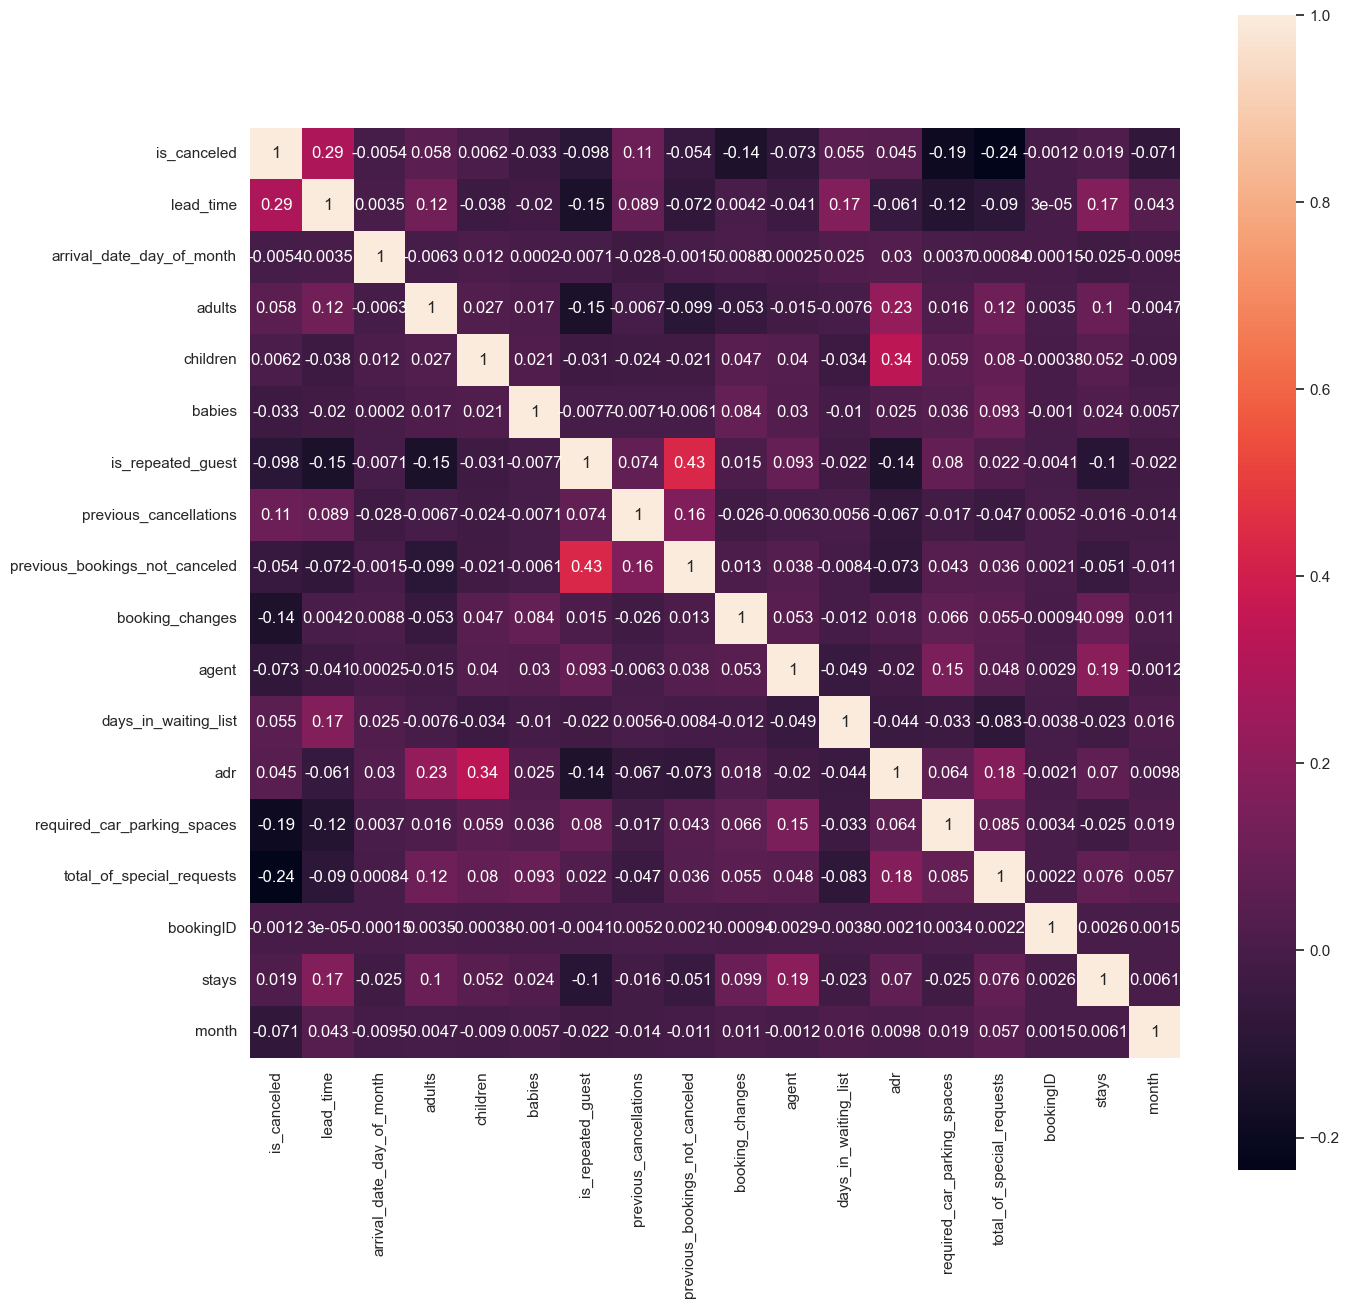

In [113]:
# heatmap of correlation yang baru
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(df.corr(), annot=True, square=True)

Tidak ada yang korelasinya 0.8 jadi sudah oke

## 1. One Hot Encoding

In [114]:
from sklearn.preprocessing import LabelEncoder

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82915 entries, 0 to 83292
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           82915 non-null  object        
 1   is_canceled                     82915 non-null  int64         
 2   lead_time                       82915 non-null  int64         
 3   arrival_date_month              82915 non-null  object        
 4   arrival_date_day_of_month       82915 non-null  int64         
 5   adults                          82915 non-null  int64         
 6   children                        82915 non-null  float64       
 7   babies                          82915 non-null  int64         
 8   meal                            82915 non-null  object        
 9   country                         82915 non-null  object        
 10  market_segment                  82915 non-null  object        
 11  di

**hotel**

In [116]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['hotel'] = host_identity_verified_le.fit_transform(df['hotel'])

df['hotel'].value_counts()
# pokoknya ini dijadiin 0 sampe 63

39    1369
25    1367
43    1361
14    1355
36    1345
      ... 
52    1244
46    1243
0     1242
62    1242
42    1239
Name: hotel, Length: 64, dtype: int64

**arrival_date_month**

In [117]:
# Membuat mapping dari nama bulan ke angka
month_to_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Menggunakan mapping untuk mengganti nilai dalam kolom 'arrival_date_month'
df['arrival_date_month'] = df['arrival_date_month'].map(month_to_number)

# Sekarang kolom 'arrival_date_month' akan berisi angka dari 1 hingga 12

**meal**

In [118]:
df['meal'].value_counts()

BB           64085
HB           10071
SC            7392
Undefined      825
FB             542
Name: meal, dtype: int64

In [119]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['meal'] = host_identity_verified_le.fit_transform(df['meal'])

df['meal'].value_counts()
# pokoknya ini dijadiin 0 sampe 63

0    64085
2    10071
3     7392
4      825
1      542
Name: meal, dtype: int64

**country**

In [120]:
df['country'].value_counts()

PRT    33949
GBR     8380
FRA     7243
ESP     5897
DEU     5107
       ...  
COM        1
UGA        1
FJI        1
AIA        1
NAM        1
Name: country, Length: 162, dtype: int64

In [121]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['country'] = host_identity_verified_le.fit_transform(df['country'])

df['country'].value_counts()
# pokoknya ini dijadiin 0 sampe 162

124    33949
54      8380
51      7243
46      5897
38      5107
       ...  
31         1
151        1
50         1
2          1
109        1
Name: country, Length: 162, dtype: int64

**market_segment**

In [122]:
df['market_segment'].value_counts()

Online TA        39383
Offline TA/TO    16880
Groups           13785
Direct            8616
Corporate         3581
Complementary      517
Aviation           153
Name: market_segment, dtype: int64

In [123]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['market_segment'] = host_identity_verified_le.fit_transform(df['market_segment'])

df['market_segment'].value_counts()

6    39383
5    16880
4    13785
3     8616
2     3581
1      517
0      153
Name: market_segment, dtype: int64

**distribution_channel**

In [124]:
df['distribution_channel'].value_counts()

TA/TO        68256
Direct       10029
Corporate     4496
GDS            133
Undefined        1
Name: distribution_channel, dtype: int64

In [125]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['distribution_channel'] = host_identity_verified_le.fit_transform(df['distribution_channel'])

df['distribution_channel'].value_counts()

3    68256
1    10029
0     4496
2      133
4        1
Name: distribution_channel, dtype: int64

**reserved_room_type**

In [126]:
df['reserved_room_type'].value_counts()

A    59774
D    13293
E     4532
F     2041
G     1432
B      774
C      656
H      408
L        3
P        2
Name: reserved_room_type, dtype: int64

In [127]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['reserved_room_type'] = host_identity_verified_le.fit_transform(df['reserved_room_type'])

df['reserved_room_type'].value_counts()

0    59774
3    13293
4     4532
5     2041
6     1432
1      774
2      656
7      408
8        3
9        2
Name: reserved_room_type, dtype: int64

**assigned_room_type**

In [128]:
df['assigned_room_type'].value_counts()

A    51554
D    17473
E     5366
F     2626
G     1763
C     1663
B     1527
H      479
I      256
K      206
P        2
Name: assigned_room_type, dtype: int64

In [129]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['assigned_room_type'] = host_identity_verified_le.fit_transform(df['assigned_room_type'])

df['assigned_room_type'].value_counts()

0     51554
3     17473
4      5366
5      2626
6      1763
2      1663
1      1527
7       479
8       256
9       206
10        2
Name: assigned_room_type, dtype: int64

**deposit_type**

In [130]:
df['deposit_type'].value_counts()

No Deposit    72611
Non Refund    10194
Refundable      110
Name: deposit_type, dtype: int64

In [131]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['deposit_type'] = host_identity_verified_le.fit_transform(df['deposit_type'])

df['deposit_type'].value_counts()

0    72611
1    10194
2      110
Name: deposit_type, dtype: int64

**customer_type**

In [132]:
df['customer_type'].value_counts()

Transient          62201
Transient-Party    17517
Contract            2793
Group                404
Name: customer_type, dtype: int64

In [133]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['customer_type'] = host_identity_verified_le.fit_transform(df['customer_type'])

df['customer_type'].value_counts()

2    62201
3    17517
0     2793
1      404
Name: customer_type, dtype: int64

**reservation_status**

In [134]:
df['reservation_status'].value_counts()

Check-Out    52194
Canceled     29871
No-Show        850
Name: reservation_status, dtype: int64

In [135]:
le = LabelEncoder()
host_identity_verified_le = LabelEncoder()
df['reservation_status'] = host_identity_verified_le.fit_transform(df['reservation_status'])

df['reservation_status'].value_counts()

1    52194
0    29871
2      850
Name: reservation_status, dtype: int64

Sekarang Cek Lagi korelasinya

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\3815865122.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=True)


<AxesSubplot:>

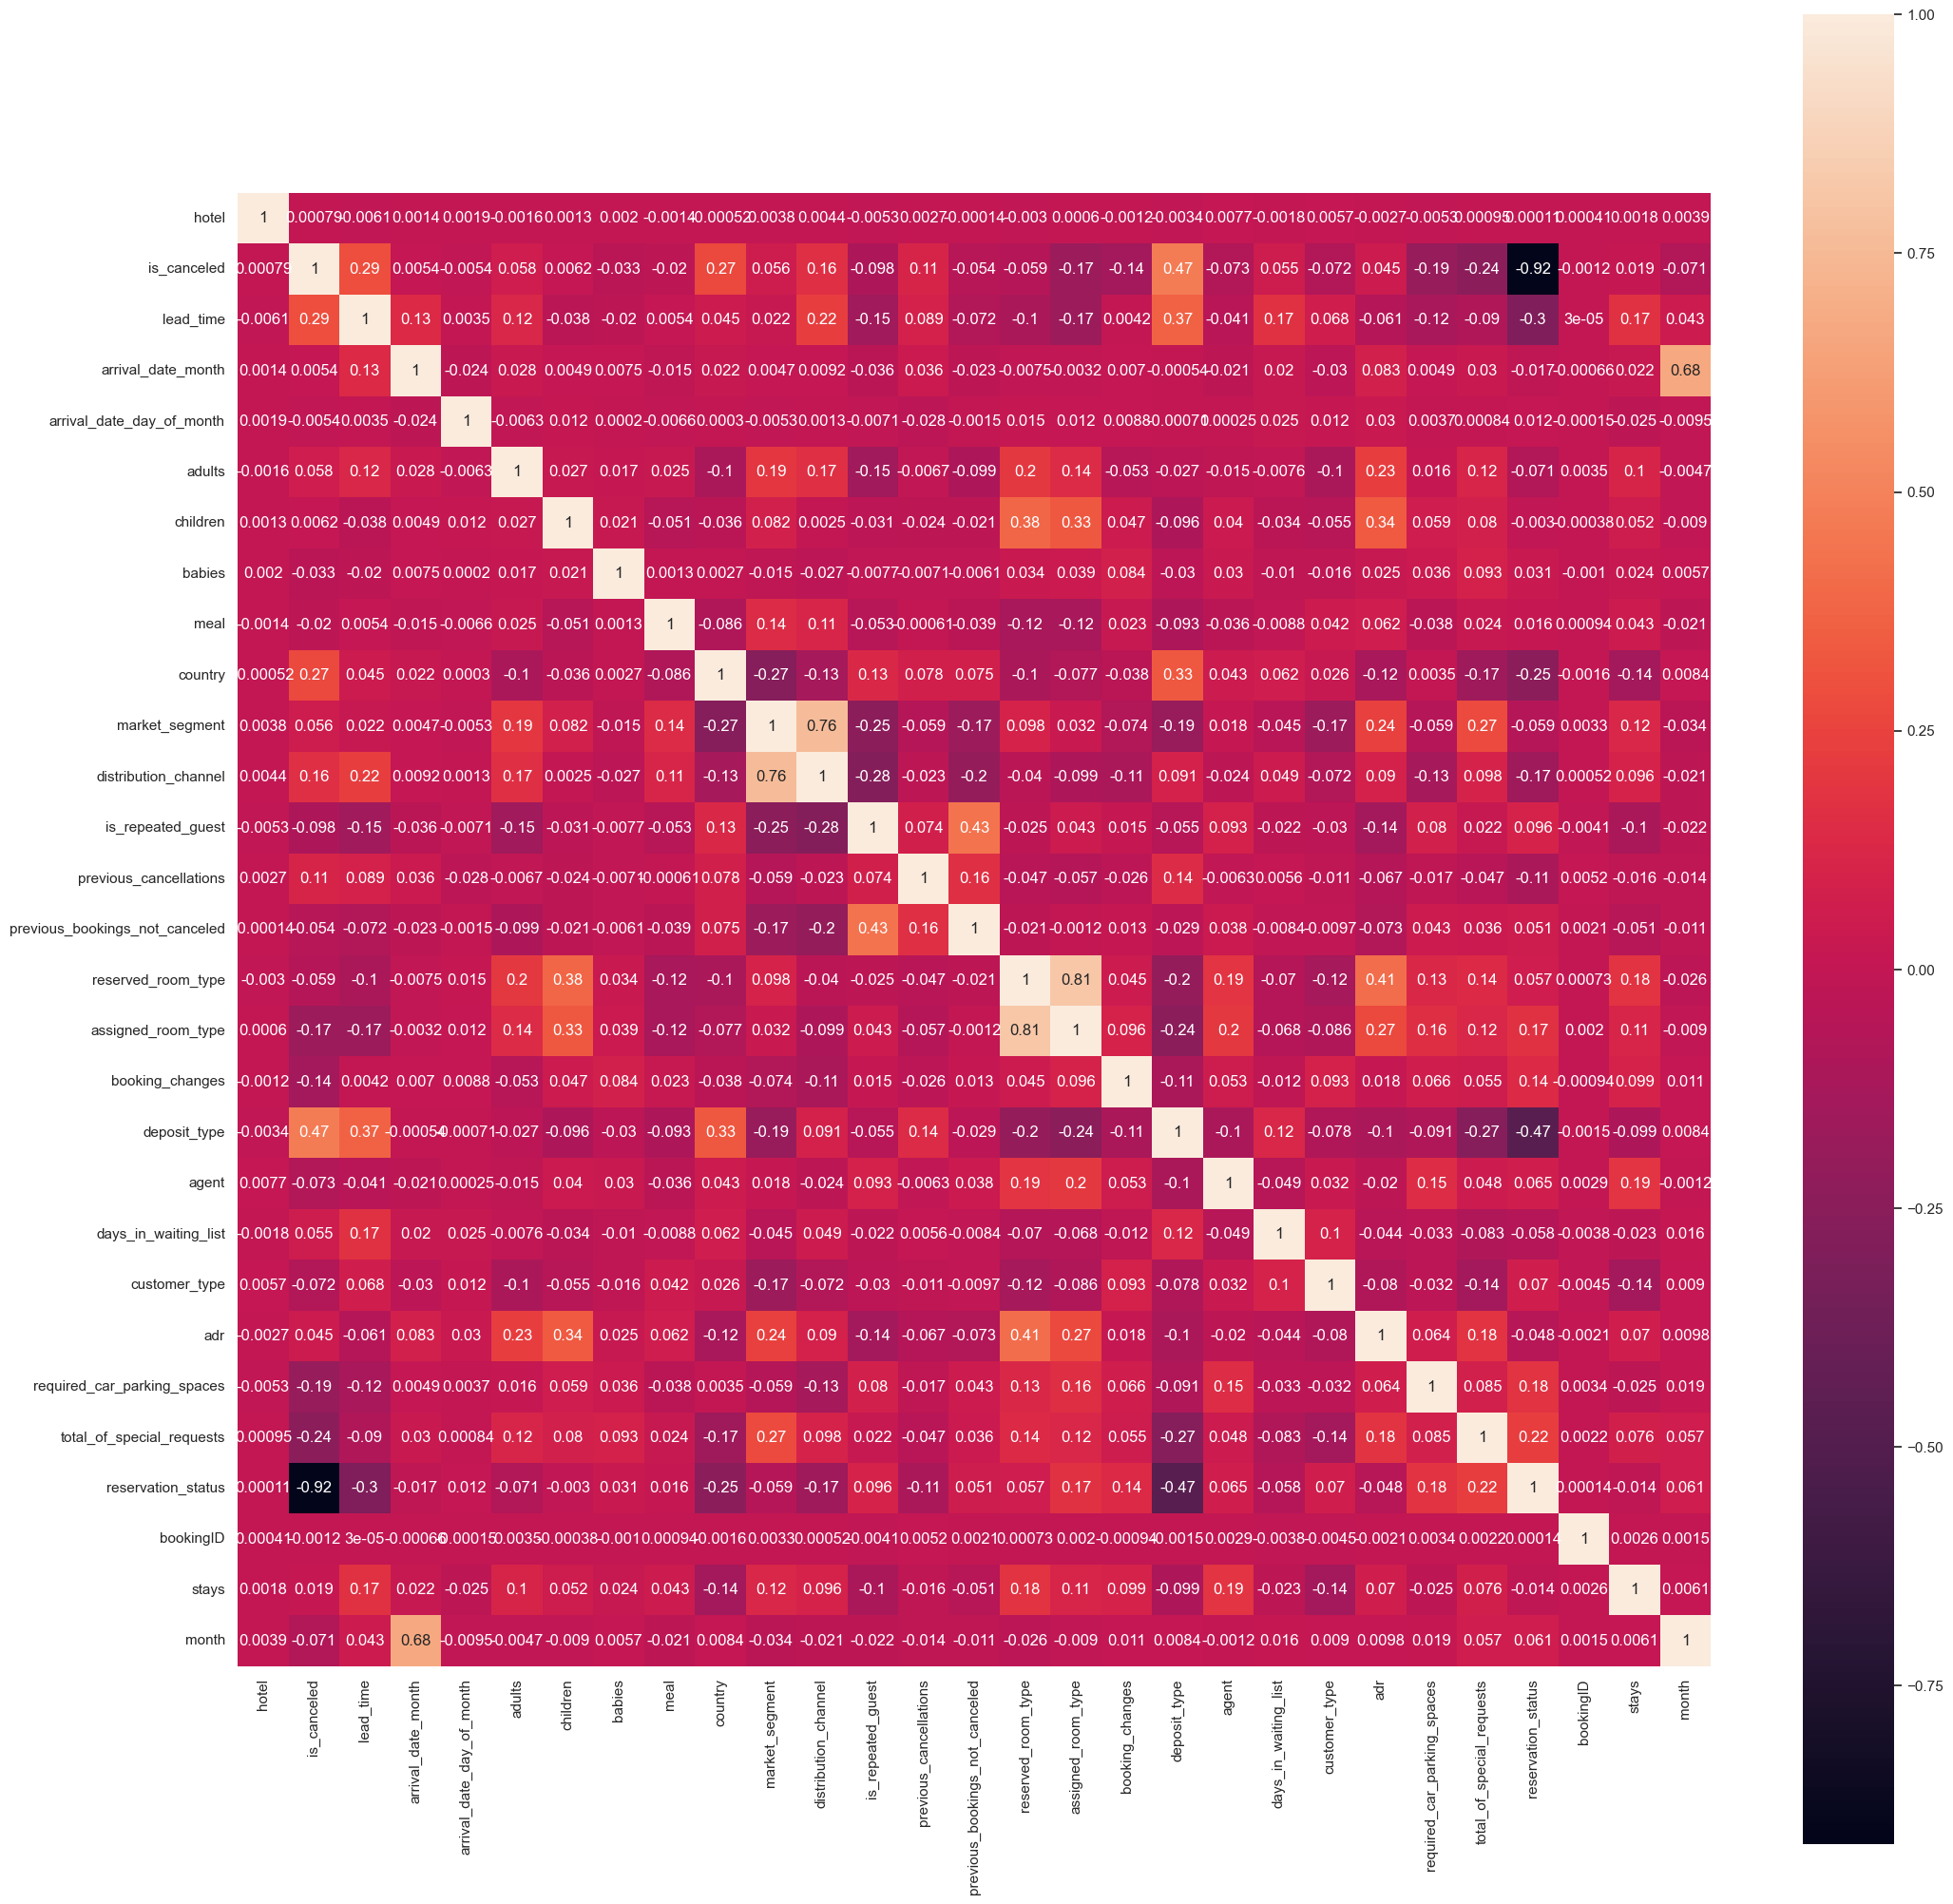

In [137]:
# heatmap of correlation yang baru
sns.set(rc={"figure.figsize":(25, 25)})
sns.heatmap(df.corr(), annot=True, square=True)

Korelasi tinggi:
> reservation_status (drop) dan is_canceled

> market_segment dan distribution_channel (drop)

> assigned_room_type (drop) dan reserved_room_type

In [138]:
df.drop('reservation_status', axis=1, inplace=True)
df.drop('distribution_channel', axis=1, inplace=True)
df.drop('assigned_room_type', axis=1, inplace=True)

C:\Users\Zenbook\AppData\Local\Temp\ipykernel_26936\3815865122.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, square=True)


<AxesSubplot:>

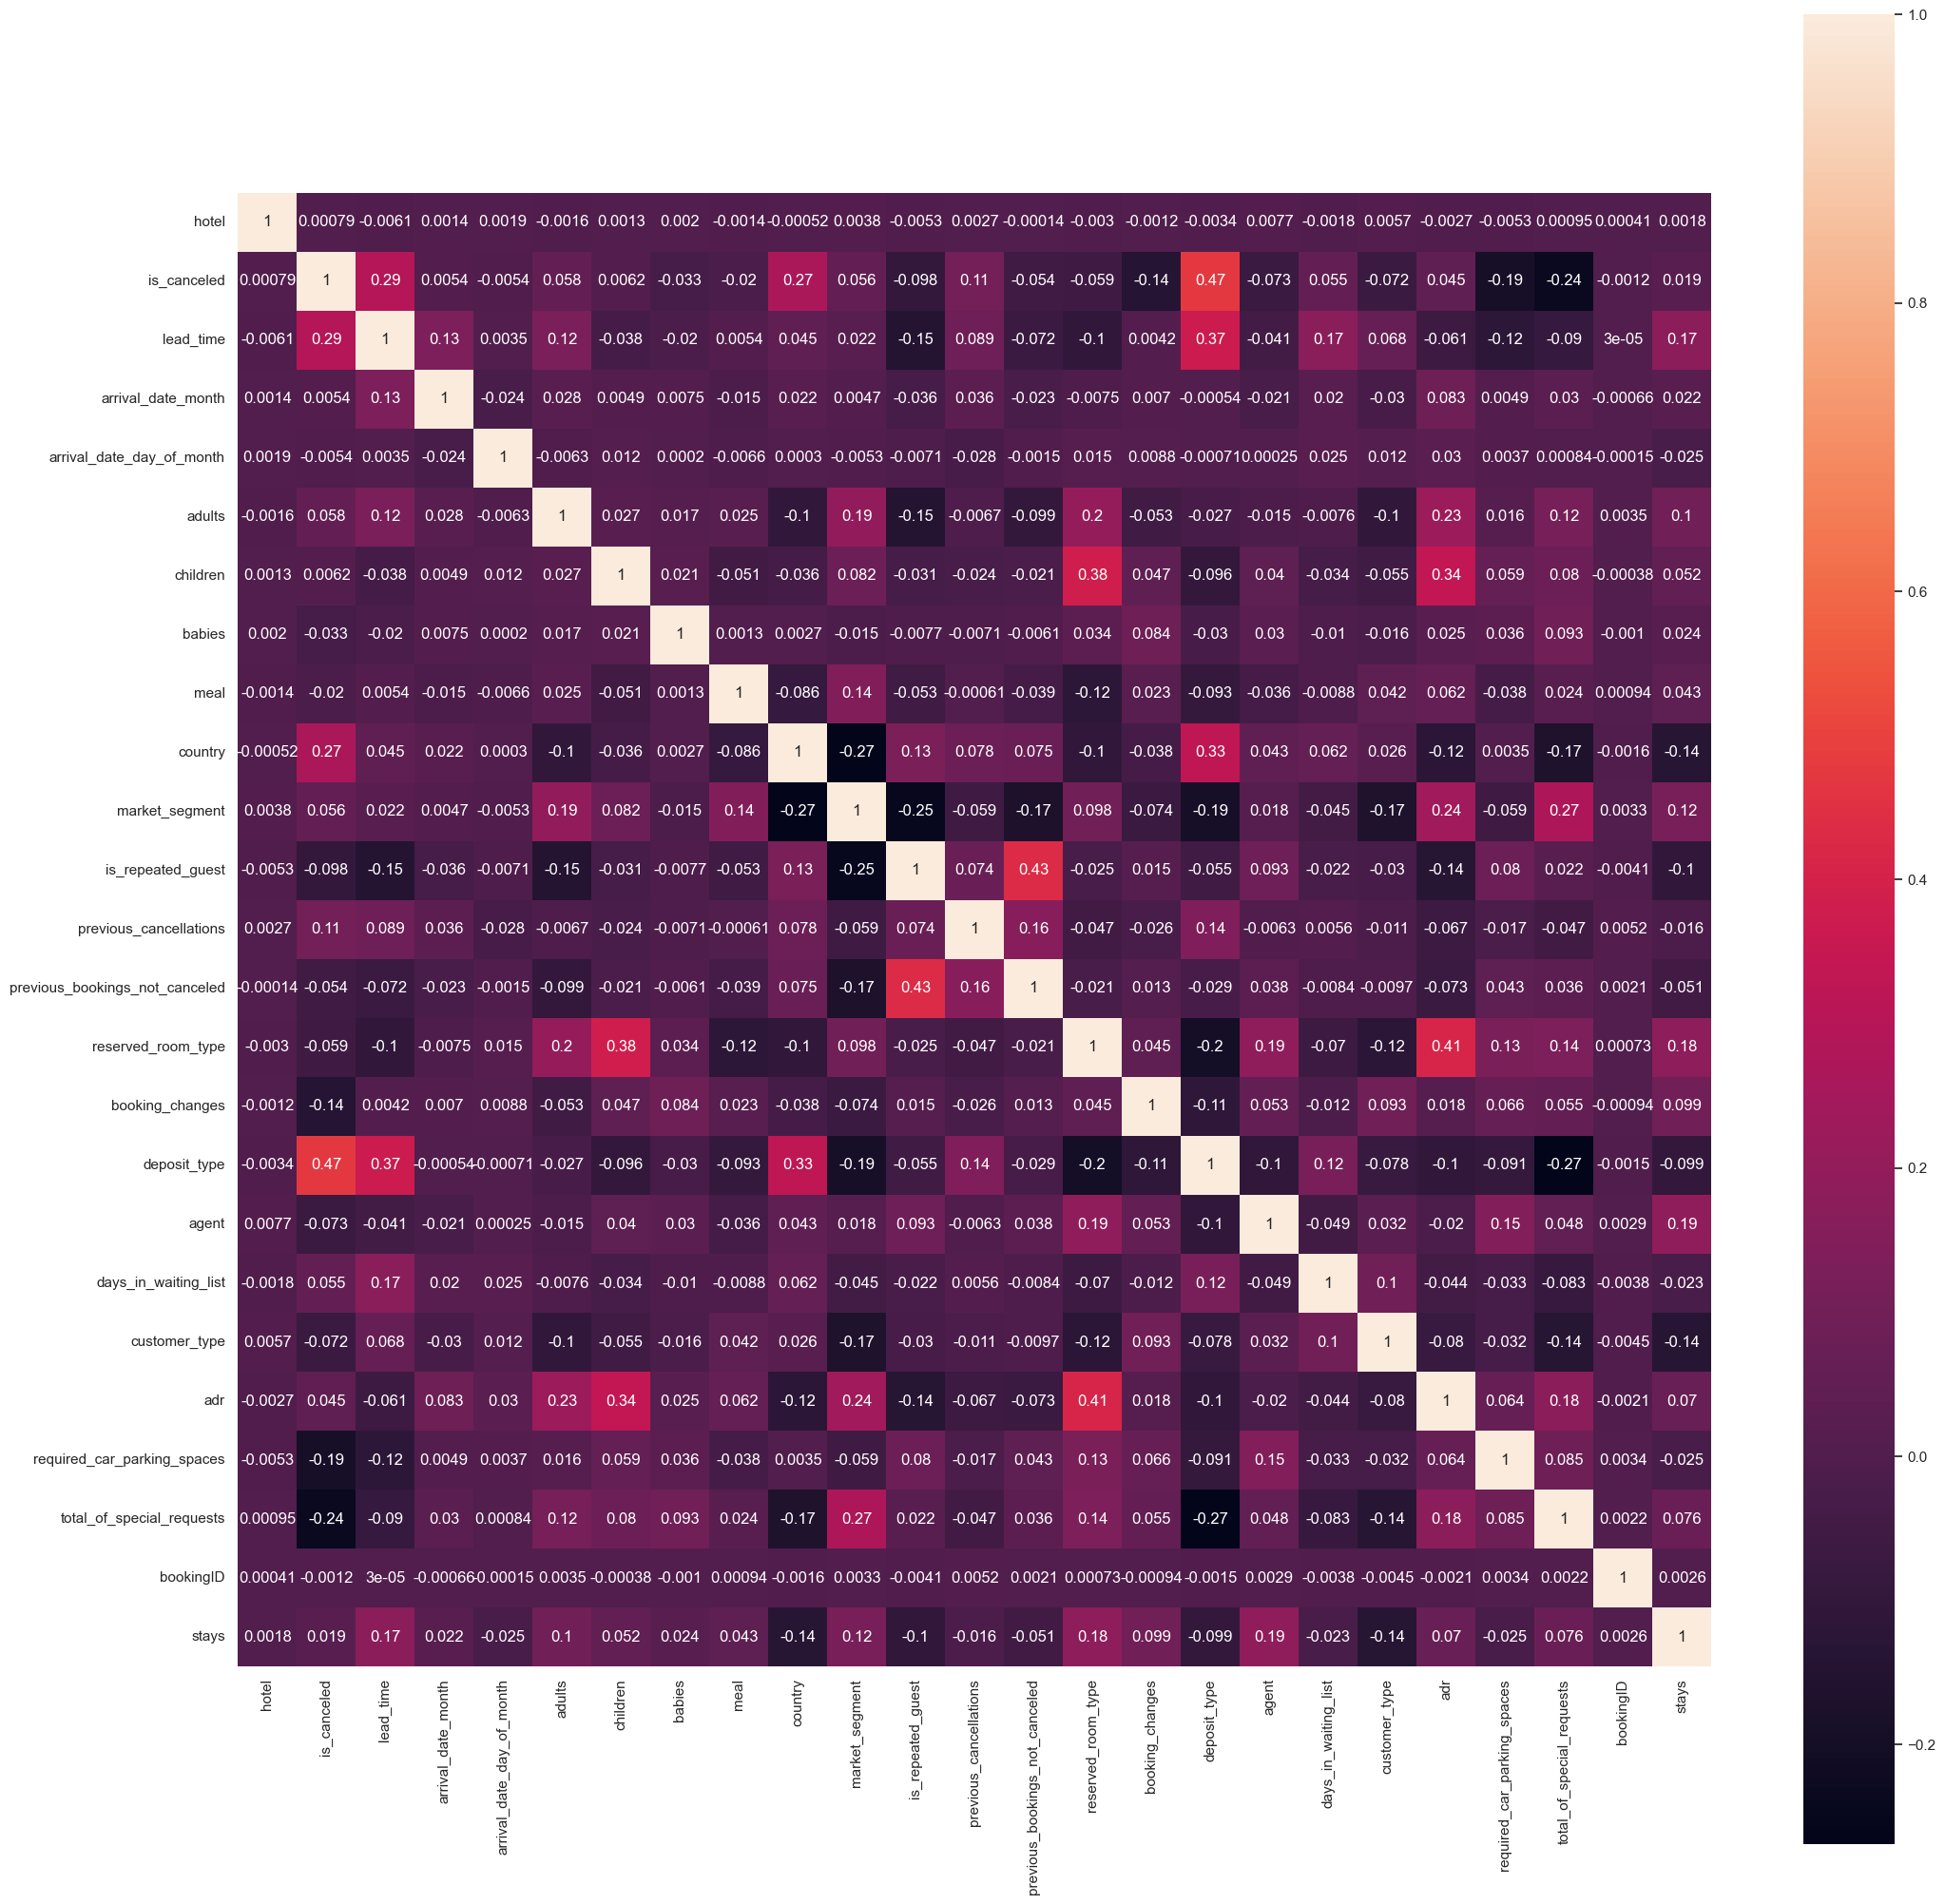

In [141]:
# heatmap of correlation yang baru
sns.set(rc={"figure.figsize":(25, 25)})
sns.heatmap(df.corr(), annot=True, square=True)

In [140]:
df.drop('month', axis=1, inplace=True)

# 2. Splitting Data

In [ ]:
# Tanggal referensi (contoh: tanggal awal data)
reference_date = df['reservation_status_date'].min()

# Menghitung selisih hari antara tanggal dalam kolom dengan tanggal referensi
df['reservation_status_date_integer'] = (df['reservation_status_date'] - reference_date).dt.days

# Kolom 'reservation_status_date_integer' sekarang berisi representasi integer


In [150]:
df.drop('reservation_status_date', axis=1, inplace=True)

In [156]:
df.drop('month_name', axis=1, inplace=True)

In [157]:
df.describe()

# Karena datanya cukup beragam, maka akan di-scaling terlebih dahulu

hotel   is_canceled     lead_time  arrival_date_month  \
count  82915.000000  82915.000000  82915.000000        82915.000000   
mean      31.432407      0.370512    102.215076            6.552674   
std       18.455502      0.482945    100.551173            3.090936   
min        0.000000      0.000000      0.000000            1.000000   
25%       15.000000      0.000000     18.000000            4.000000   
50%       31.000000      0.000000     69.000000            7.000000   
75%       47.000000      1.000000    160.000000            9.000000   
max       63.000000      1.000000    365.000000           12.000000   

       arrival_date_day_of_month        adults      children        babies  \
count               82915.000000  82915.000000  82915.000000  82915.000000   
mean                   15.787288      1.856516      0.103938      0.008044   
std                     8.775413      0.605591      0.399457      0.100751   
min                     1.000000      0.000000      0.000000      0.000000   
25%                     8.000000      2.000000      0.000000      0.000000   
50%                    16.000000      2.000000      0.000000      0.000000   
75%                    23.000000      2.000000      0.000000      0.000000   
max                    31.000000     55.000000     10.000000     10.000000   

               meal       country  ...  deposit_type         agent  \
count  82915.000000  82915.000000  ...  82915.000000  82915.000000   
mean       0.556715     84.816764  ...      0.125599     81.877495   
std        1.069593     41.585833  ...      0.335378    105.173259   
min        0.000000      0.000000  ...      0.000000      1.000000   
25%        0.000000     51.000000  ...      0.000000      9.000000   
50%        0.000000     73.000000  ...      0.000000     21.000000   
75%        0.000000    124.000000  ...      0.000000    156.000000   
max        4.000000    161.000000  ...      2.000000    535.000000   

       days_in_waiting_list  customer_type           adr  \
count          82915.000000   82915.000000  82915.000000   
mean               2.349141       2.139022    101.894426   
std               17.594524       0.575808     48.019023   
min                0.000000       0.000000      0.000000   
25%                0.000000       2.000000     70.000000   
50%                0.000000       2.000000     95.000000   
75%                0.000000       2.000000    126.000000   
max              365.000000       3.000000    508.000000   

       required_car_parking_spaces  total_of_special_requests     bookingID  \
count                 82915.000000               82915.000000  82915.000000   
mean                      0.060966                   0.572188  41643.837303   
std                       0.240727                   0.793458  24042.425838   
min                       0.000000                   0.000000      1.000000   
25%                       0.000000                   0.000000  20822.500000   
50%                       0.000000                   0.000000  41636.000000   
75%                       0.000000                   1.000000  62464.500000   
max                       3.000000                   5.000000  83293.000000   

              stays  reservation_status_date_integer  
count  82915.000000                     82915.000000  
mean       3.437159                       576.018549  
std        2.561861                       227.638991  
min        0.000000                         0.000000  
25%        2.000000                       397.000000  
50%        3.000000                       583.000000  
75%        4.000000                       768.000000  
max       56.000000                       982.000000  

[8 rows x 26 columns]

<AxesSubplot:>

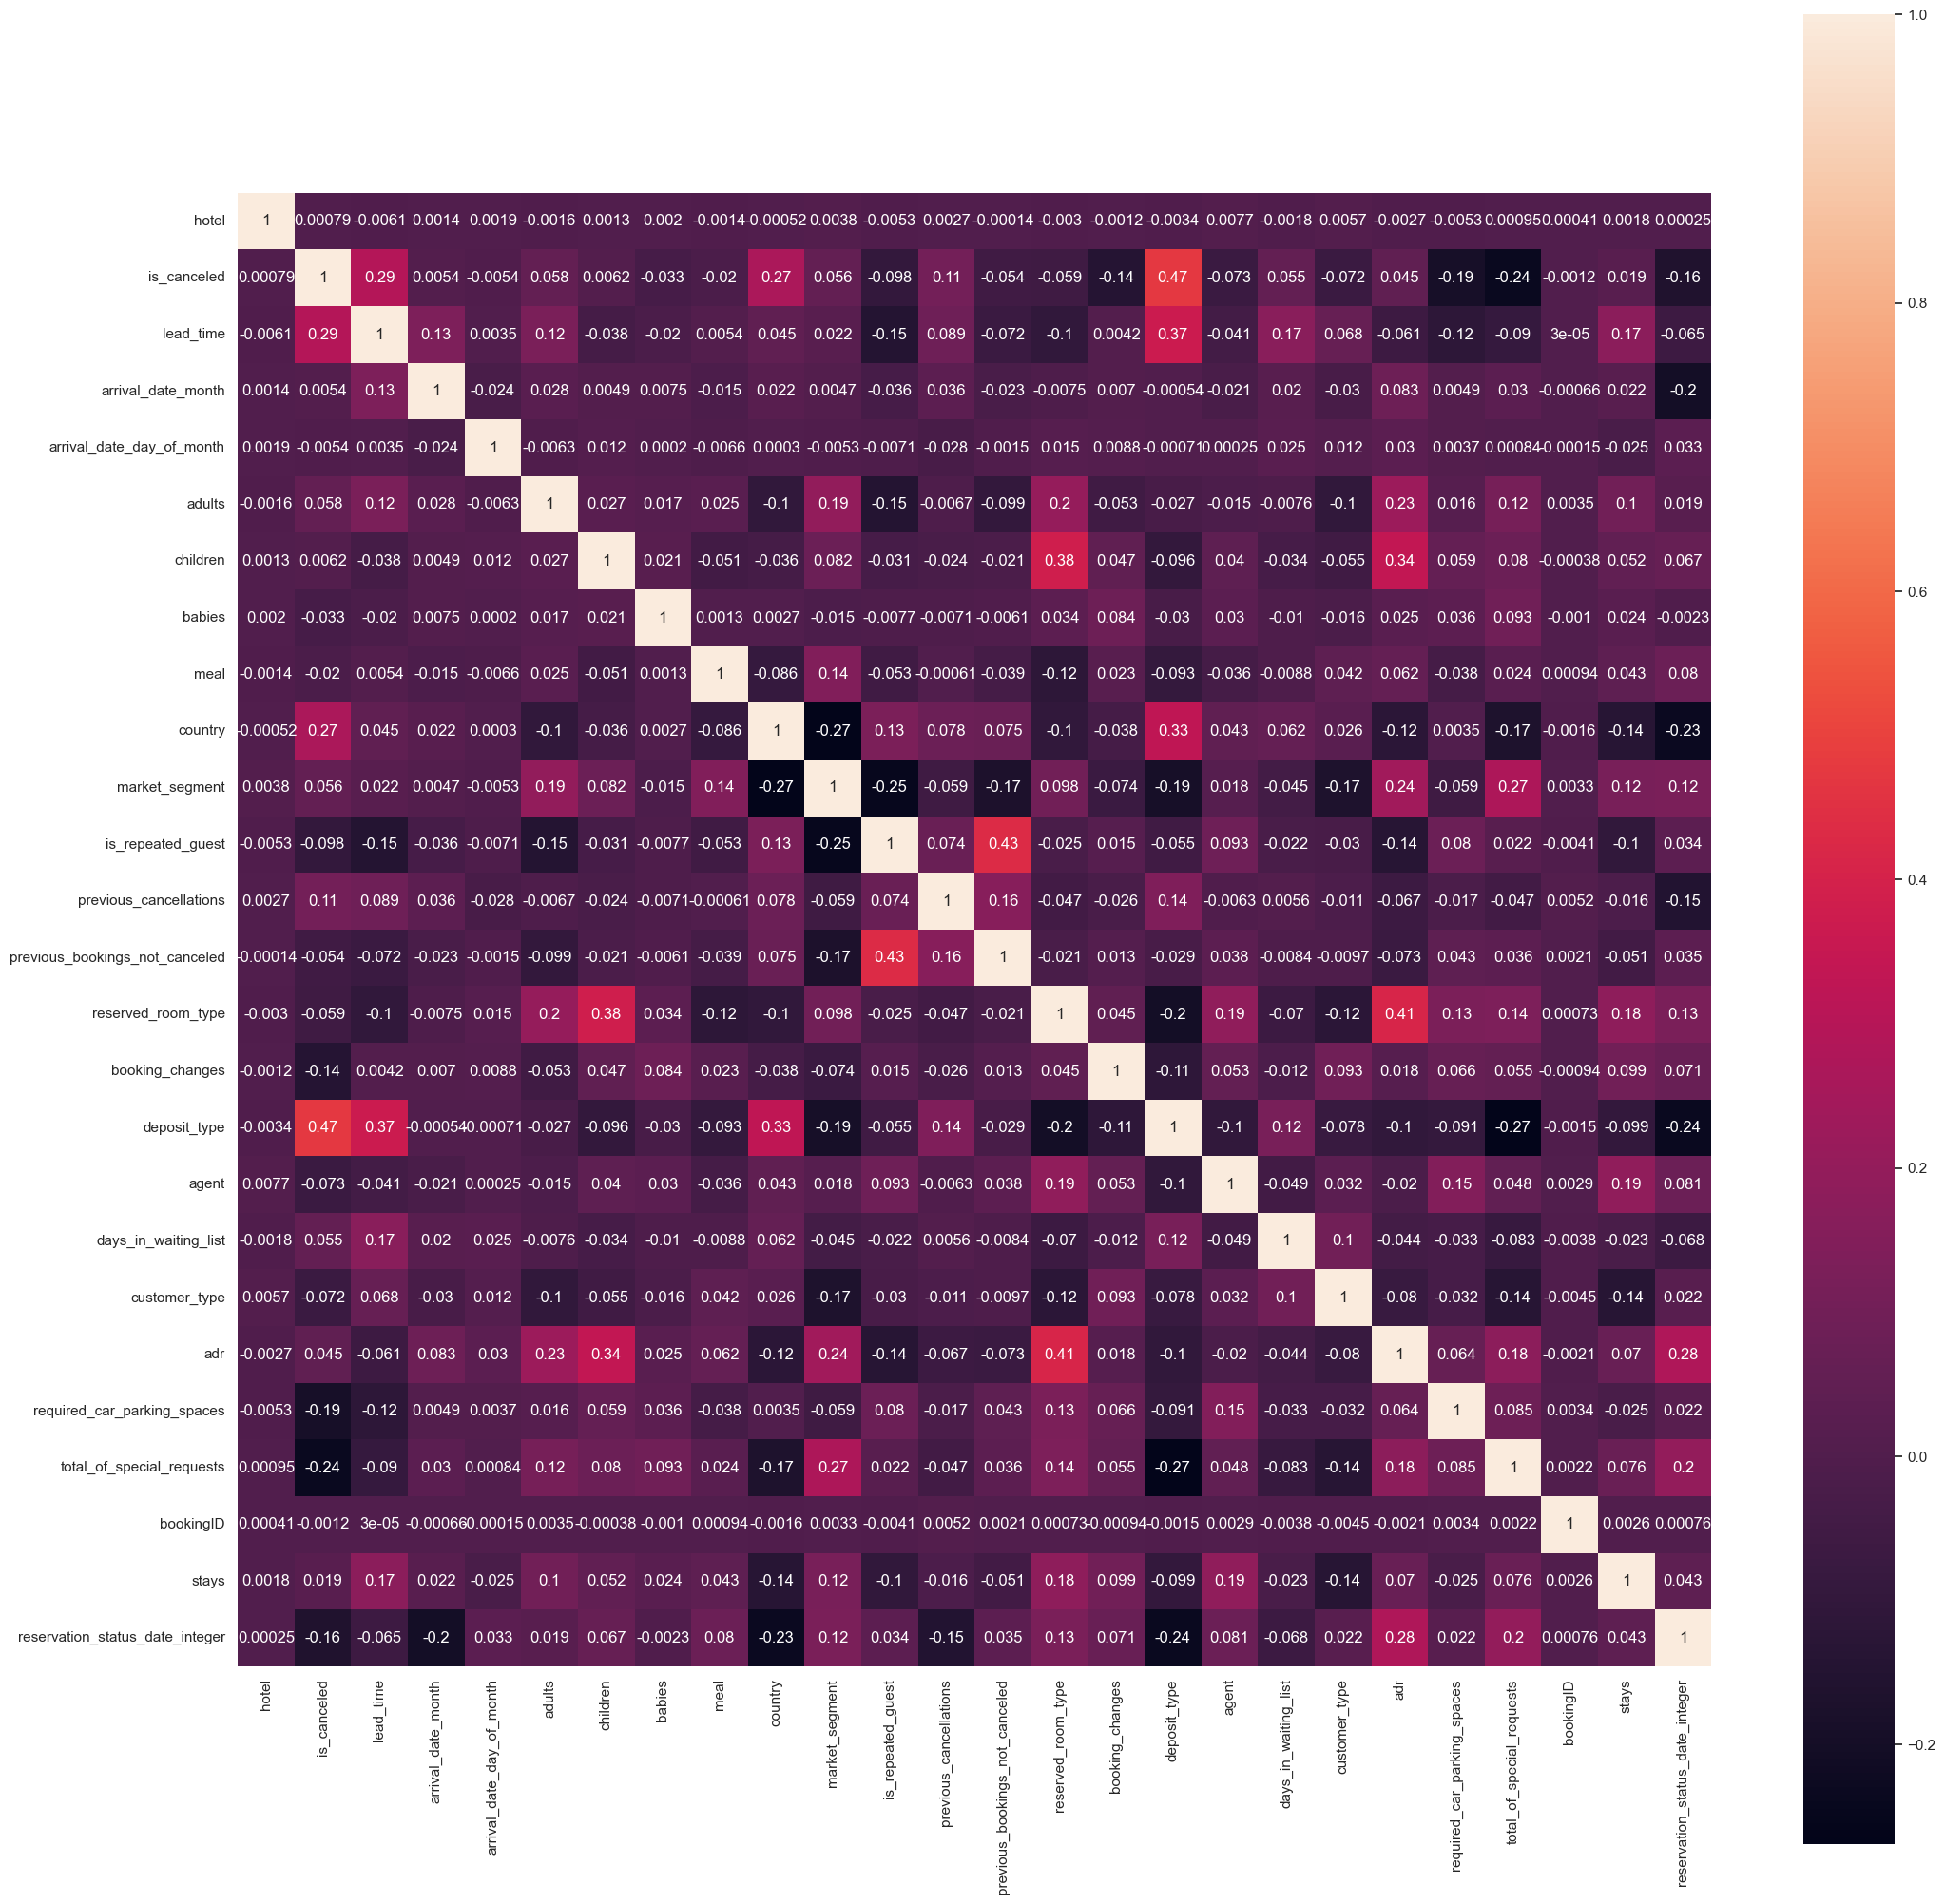

In [162]:
# heatmap of correlation yang baru
sns.set(rc={"figure.figsize":(25, 25)})
sns.heatmap(df.corr(), annot=True, square=True)

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, auc, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import joblib
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings("ignore")

**Feature Importance**

In [159]:
x_feat = df.drop('is_canceled', axis = 1)
y_feat = df['is_canceled']

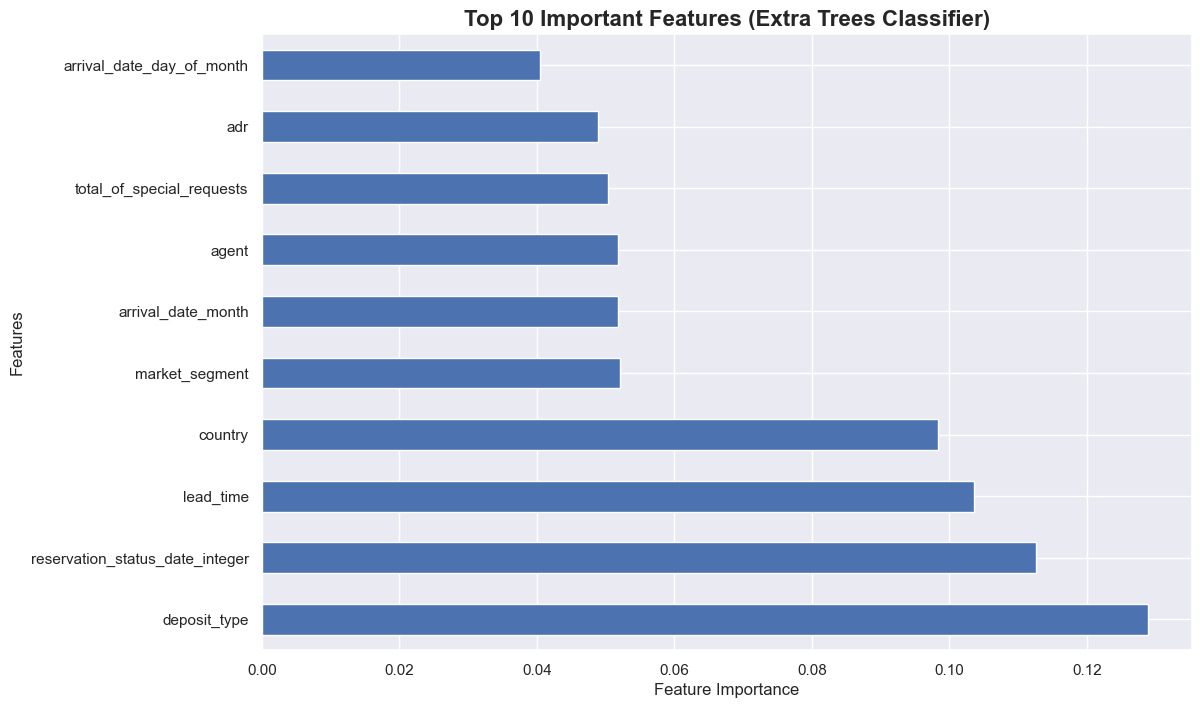

In [160]:
# melakukan feature selection dengan menggunakan Exta Trees
# kompleksitasnya lebih tinggi dari random forest

plt.figure(figsize=(12, 8))  # Menentukan ukuran plot

model = ExtraTreesClassifier()
model.fit(x_feat, y_feat)

feat_importances = pd.Series(model.feature_importances_, index=x_feat.columns)
feat_importances.nlargest(10).plot.barh()

plt.title('Top 10 Important Features (Extra Trees Classifier)', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

Important features:
> deposit_type

> reservation_status_date_integer

> lead_time

> country

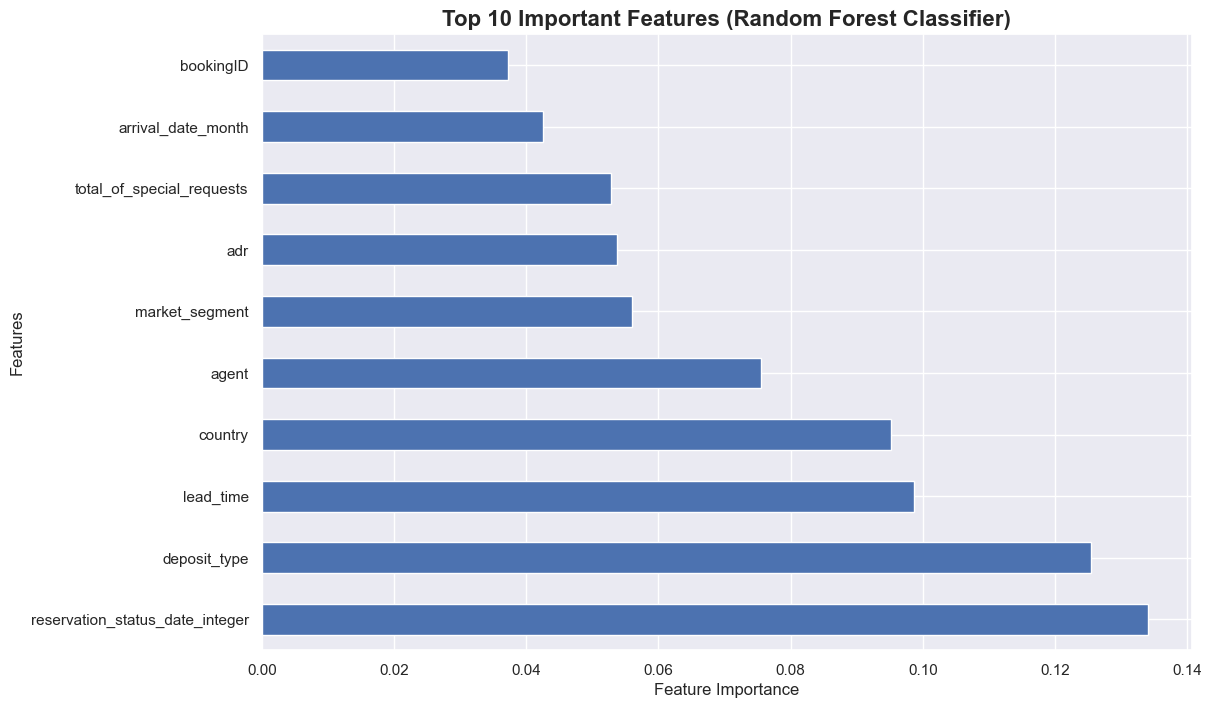

In [166]:
# bandingkan dengan menggunakan random forest

plt.figure(figsize=(12, 8))

model = RandomForestClassifier()
model.fit(x_feat, y_feat)

feat_importances = pd.Series(model.feature_importances_, index=x_feat.columns)
feat_importances.nlargest(10).plot.barh()

plt.title('Top 10 Important Features (Random Forest Classifier)', fontsize=16, fontweight='bold')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

Important features:
> deposit_type

> reservation_status_date_integer

> lead_time

> country

In [164]:
df.to_csv('modeeling.csv', index=False)